In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [8]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [9]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [10]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

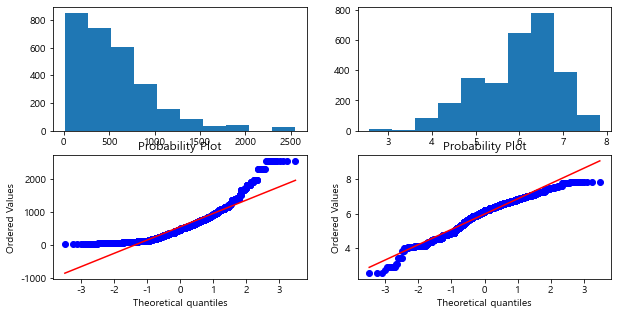

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [12]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [13]:
all_df.shape

(3877, 36)

## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [18]:
all_df.loc[ 3259, "자격유형"] = 'A'
all_df.loc[ 3454, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [27]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [29]:
# all_df['10분내지하철수'] = all_sub_df

In [30]:
# all_df.head()

In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [38]:
all_df.shape

(3877, 36)

# 라벨인코딩

In [39]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [40]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1790,657,상가,경상남도,임대상가,248.56,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
96,C2109,495,아파트,경상남도,영구임대,26.34,288,2.0,3,3138000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
97,C2109,495,아파트,경상남도,영구임대,30.48,192,2.0,3,3631000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
98,C2109,495,상가,경상남도,임대상가,31.84,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [41]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9


In [42]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [43]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [44]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [45]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [46]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [47]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [48]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

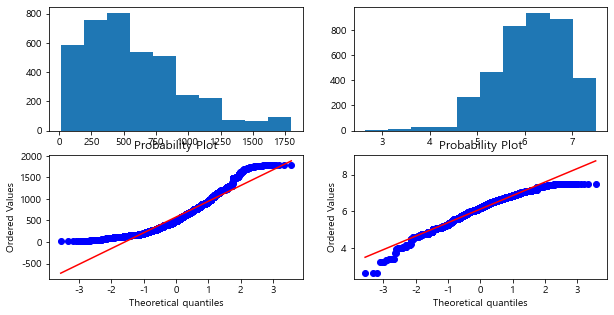

In [49]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

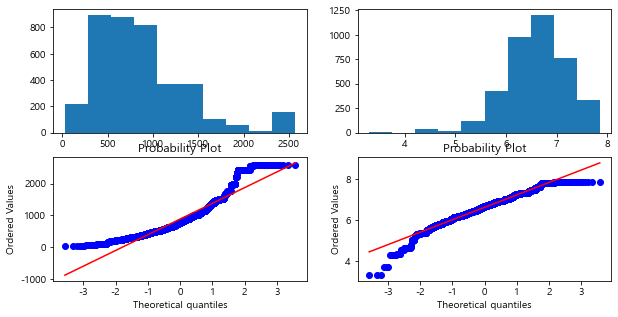

In [50]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

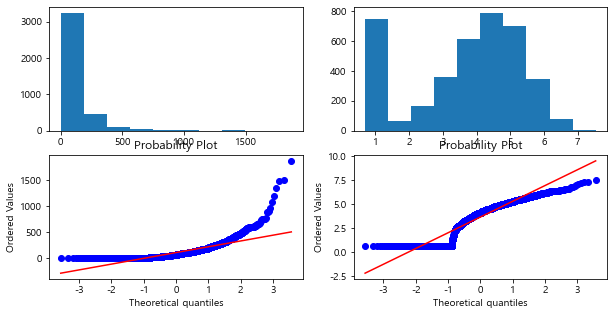

In [51]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

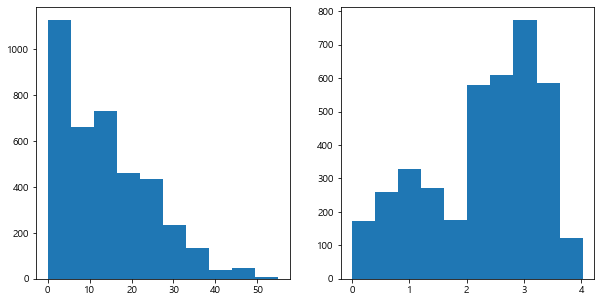

In [52]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [53]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [55]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [56]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

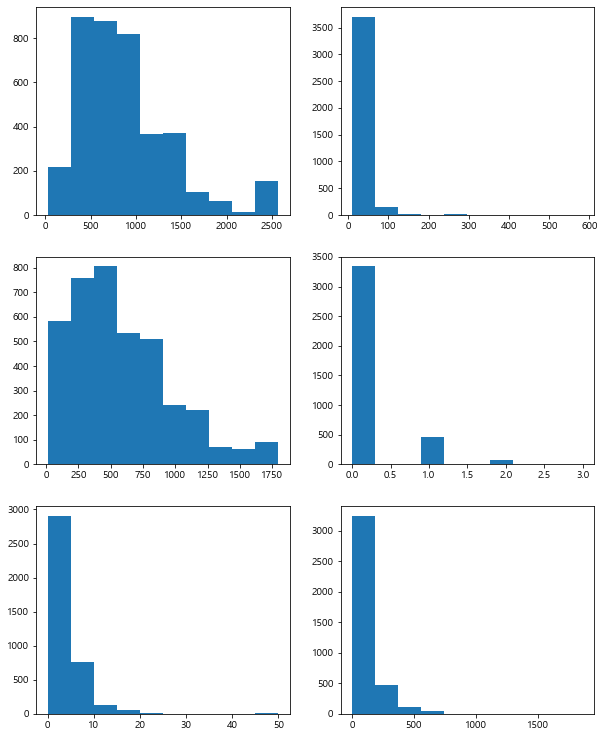

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [58]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [62]:
pd.set_option('display.min_rows',10)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [64]:
train_df.shape

(2869, 48)

In [65]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [66]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

In [67]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
# lable_name = 'log_등록차량수'
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [69]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=20000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=20000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=20000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6797137	total: 173ms	remaining: 57m 40s
1:	learn: 0.6547234	total: 183ms	remaining: 30m 30s
2:	learn: 0.6283369	total: 193ms	remaining: 21m 28s
3:	learn: 0.6039075	total: 204ms	remaining: 16m 57s
4:	learn: 0.5815266	total: 214ms	remaining: 14m 15s
5:	learn: 0.5615544	total: 224ms	remaining: 12m 27s
6:	learn: 0.5421991	total: 235ms	remaining: 11m 11s
7:	learn: 0.5238874	total: 246ms	remaining: 10m 14s
8:	learn: 0.5082983	total: 256ms	remaining: 9m 28s
9:	learn: 0.4912621	total: 266ms	remaining: 8m 51s
10:	learn: 0.4751100	total: 276ms	remaining: 8m 21s
11:	learn: 0.4595566	total: 286ms	remaining: 7m 56s
12:	learn: 0.4441298	total: 296ms	remaining: 7m 34s
13:	learn: 0.4298979	total: 306ms	remaining: 7m 17s
14:	learn: 0.4182318	total: 316ms	remaining: 7m 1s
15:	learn: 0.4056338	total: 326ms	remaining: 6m 47s
16:	learn: 0.3951410	total: 336ms	remaining: 6m 35s
17:	learn: 0.3825331	total: 349ms	remaining: 6m 27s
18:	learn: 0.3718050	total: 359ms	remaining: 6m 17s
19:	learn: 0.36

161:	learn: 0.1258895	total: 1.83s	remaining: 3m 44s
162:	learn: 0.1253443	total: 1.84s	remaining: 3m 44s
163:	learn: 0.1248602	total: 1.85s	remaining: 3m 44s
164:	learn: 0.1242929	total: 1.86s	remaining: 3m 43s
165:	learn: 0.1238976	total: 1.87s	remaining: 3m 43s
166:	learn: 0.1236931	total: 1.88s	remaining: 3m 43s
167:	learn: 0.1234945	total: 1.89s	remaining: 3m 43s
168:	learn: 0.1233721	total: 1.9s	remaining: 3m 43s
169:	learn: 0.1230761	total: 1.91s	remaining: 3m 43s
170:	learn: 0.1225132	total: 1.92s	remaining: 3m 43s
171:	learn: 0.1223238	total: 1.94s	remaining: 3m 43s
172:	learn: 0.1215850	total: 1.95s	remaining: 3m 42s
173:	learn: 0.1213005	total: 1.96s	remaining: 3m 42s
174:	learn: 0.1207346	total: 1.96s	remaining: 3m 42s
175:	learn: 0.1204910	total: 1.97s	remaining: 3m 42s
176:	learn: 0.1201825	total: 1.98s	remaining: 3m 42s
177:	learn: 0.1199158	total: 2s	remaining: 3m 42s
178:	learn: 0.1196077	total: 2s	remaining: 3m 42s
179:	learn: 0.1194615	total: 2.02s	remaining: 3m 41s


324:	learn: 0.0921626	total: 3.48s	remaining: 3m 30s
325:	learn: 0.0921499	total: 3.5s	remaining: 3m 30s
326:	learn: 0.0920955	total: 3.5s	remaining: 3m 30s
327:	learn: 0.0919432	total: 3.52s	remaining: 3m 30s
328:	learn: 0.0919190	total: 3.53s	remaining: 3m 30s
329:	learn: 0.0918690	total: 3.54s	remaining: 3m 30s
330:	learn: 0.0918493	total: 3.55s	remaining: 3m 30s
331:	learn: 0.0915805	total: 3.56s	remaining: 3m 30s
332:	learn: 0.0913542	total: 3.57s	remaining: 3m 30s
333:	learn: 0.0913115	total: 3.58s	remaining: 3m 30s
334:	learn: 0.0912034	total: 3.59s	remaining: 3m 30s
335:	learn: 0.0911655	total: 3.6s	remaining: 3m 30s
336:	learn: 0.0910984	total: 3.61s	remaining: 3m 30s
337:	learn: 0.0910810	total: 3.62s	remaining: 3m 30s
338:	learn: 0.0910612	total: 3.63s	remaining: 3m 30s
339:	learn: 0.0910225	total: 3.64s	remaining: 3m 30s
340:	learn: 0.0909334	total: 3.65s	remaining: 3m 30s
341:	learn: 0.0908773	total: 3.66s	remaining: 3m 30s
342:	learn: 0.0907251	total: 3.67s	remaining: 3m 

487:	learn: 0.0769991	total: 5.14s	remaining: 3m 25s
488:	learn: 0.0768612	total: 5.16s	remaining: 3m 25s
489:	learn: 0.0767987	total: 5.17s	remaining: 3m 25s
490:	learn: 0.0767581	total: 5.17s	remaining: 3m 25s
491:	learn: 0.0767128	total: 5.19s	remaining: 3m 25s
492:	learn: 0.0766812	total: 5.2s	remaining: 3m 25s
493:	learn: 0.0766395	total: 5.21s	remaining: 3m 25s
494:	learn: 0.0765207	total: 5.22s	remaining: 3m 25s
495:	learn: 0.0764712	total: 5.23s	remaining: 3m 25s
496:	learn: 0.0764170	total: 5.24s	remaining: 3m 25s
497:	learn: 0.0762298	total: 5.25s	remaining: 3m 25s
498:	learn: 0.0761509	total: 5.26s	remaining: 3m 25s
499:	learn: 0.0761170	total: 5.27s	remaining: 3m 25s
500:	learn: 0.0760254	total: 5.28s	remaining: 3m 25s
501:	learn: 0.0758602	total: 5.29s	remaining: 3m 25s
502:	learn: 0.0758363	total: 5.3s	remaining: 3m 25s
503:	learn: 0.0758191	total: 5.31s	remaining: 3m 25s
504:	learn: 0.0757936	total: 5.32s	remaining: 3m 25s
505:	learn: 0.0757854	total: 5.33s	remaining: 3m

648:	learn: 0.0684212	total: 6.8s	remaining: 3m 22s
649:	learn: 0.0684135	total: 6.81s	remaining: 3m 22s
650:	learn: 0.0682726	total: 6.82s	remaining: 3m 22s
651:	learn: 0.0681565	total: 6.83s	remaining: 3m 22s
652:	learn: 0.0680253	total: 6.84s	remaining: 3m 22s
653:	learn: 0.0680082	total: 6.85s	remaining: 3m 22s
654:	learn: 0.0679931	total: 6.86s	remaining: 3m 22s
655:	learn: 0.0679407	total: 6.87s	remaining: 3m 22s
656:	learn: 0.0679186	total: 6.88s	remaining: 3m 22s
657:	learn: 0.0678589	total: 6.89s	remaining: 3m 22s
658:	learn: 0.0677547	total: 6.9s	remaining: 3m 22s
659:	learn: 0.0676766	total: 6.91s	remaining: 3m 22s
660:	learn: 0.0676356	total: 6.92s	remaining: 3m 22s
661:	learn: 0.0675898	total: 6.93s	remaining: 3m 22s
662:	learn: 0.0675143	total: 6.94s	remaining: 3m 22s
663:	learn: 0.0674641	total: 6.95s	remaining: 3m 22s
664:	learn: 0.0673935	total: 6.96s	remaining: 3m 22s
665:	learn: 0.0673240	total: 6.97s	remaining: 3m 22s
666:	learn: 0.0672058	total: 6.98s	remaining: 3m

810:	learn: 0.0598825	total: 8.46s	remaining: 3m 20s
811:	learn: 0.0598638	total: 8.47s	remaining: 3m 20s
812:	learn: 0.0598607	total: 8.48s	remaining: 3m 20s
813:	learn: 0.0598461	total: 8.49s	remaining: 3m 20s
814:	learn: 0.0597828	total: 8.5s	remaining: 3m 20s
815:	learn: 0.0597781	total: 8.51s	remaining: 3m 20s
816:	learn: 0.0597535	total: 8.52s	remaining: 3m 20s
817:	learn: 0.0597175	total: 8.53s	remaining: 3m 19s
818:	learn: 0.0597121	total: 8.54s	remaining: 3m 19s
819:	learn: 0.0596953	total: 8.55s	remaining: 3m 19s
820:	learn: 0.0596857	total: 8.56s	remaining: 3m 19s
821:	learn: 0.0596758	total: 8.57s	remaining: 3m 19s
822:	learn: 0.0596682	total: 8.58s	remaining: 3m 19s
823:	learn: 0.0596368	total: 8.59s	remaining: 3m 19s
824:	learn: 0.0595908	total: 8.6s	remaining: 3m 19s
825:	learn: 0.0595748	total: 8.61s	remaining: 3m 19s
826:	learn: 0.0595612	total: 8.62s	remaining: 3m 19s
827:	learn: 0.0595560	total: 8.63s	remaining: 3m 19s
828:	learn: 0.0595489	total: 8.64s	remaining: 3m

973:	learn: 0.0549744	total: 10.1s	remaining: 3m 17s
974:	learn: 0.0549635	total: 10.1s	remaining: 3m 17s
975:	learn: 0.0549605	total: 10.1s	remaining: 3m 17s
976:	learn: 0.0549501	total: 10.1s	remaining: 3m 17s
977:	learn: 0.0549468	total: 10.2s	remaining: 3m 17s
978:	learn: 0.0549075	total: 10.2s	remaining: 3m 17s
979:	learn: 0.0548974	total: 10.2s	remaining: 3m 17s
980:	learn: 0.0548695	total: 10.2s	remaining: 3m 17s
981:	learn: 0.0548332	total: 10.2s	remaining: 3m 17s
982:	learn: 0.0546884	total: 10.2s	remaining: 3m 17s
983:	learn: 0.0546597	total: 10.2s	remaining: 3m 17s
984:	learn: 0.0545976	total: 10.2s	remaining: 3m 17s
985:	learn: 0.0545619	total: 10.2s	remaining: 3m 17s
986:	learn: 0.0545340	total: 10.2s	remaining: 3m 17s
987:	learn: 0.0544801	total: 10.3s	remaining: 3m 17s
988:	learn: 0.0544777	total: 10.3s	remaining: 3m 17s
989:	learn: 0.0544663	total: 10.3s	remaining: 3m 17s
990:	learn: 0.0544641	total: 10.3s	remaining: 3m 17s
991:	learn: 0.0544538	total: 10.3s	remaining: 

1133:	learn: 0.0501702	total: 11.8s	remaining: 3m 15s
1134:	learn: 0.0501667	total: 11.8s	remaining: 3m 15s
1135:	learn: 0.0501078	total: 11.8s	remaining: 3m 15s
1136:	learn: 0.0501065	total: 11.8s	remaining: 3m 15s
1137:	learn: 0.0500941	total: 11.8s	remaining: 3m 15s
1138:	learn: 0.0500898	total: 11.8s	remaining: 3m 15s
1139:	learn: 0.0500128	total: 11.8s	remaining: 3m 15s
1140:	learn: 0.0500036	total: 11.8s	remaining: 3m 15s
1141:	learn: 0.0499791	total: 11.8s	remaining: 3m 15s
1142:	learn: 0.0499222	total: 11.9s	remaining: 3m 15s
1143:	learn: 0.0498968	total: 11.9s	remaining: 3m 15s
1144:	learn: 0.0498619	total: 11.9s	remaining: 3m 15s
1145:	learn: 0.0498525	total: 11.9s	remaining: 3m 15s
1146:	learn: 0.0498436	total: 11.9s	remaining: 3m 15s
1147:	learn: 0.0498281	total: 11.9s	remaining: 3m 15s
1148:	learn: 0.0498104	total: 11.9s	remaining: 3m 15s
1149:	learn: 0.0497983	total: 11.9s	remaining: 3m 15s
1150:	learn: 0.0497828	total: 11.9s	remaining: 3m 15s
1151:	learn: 0.0497767	total

1295:	learn: 0.0463794	total: 13.4s	remaining: 3m 13s
1296:	learn: 0.0463754	total: 13.4s	remaining: 3m 13s
1297:	learn: 0.0462380	total: 13.4s	remaining: 3m 13s
1298:	learn: 0.0461104	total: 13.5s	remaining: 3m 13s
1299:	learn: 0.0459981	total: 13.5s	remaining: 3m 13s
1300:	learn: 0.0459858	total: 13.5s	remaining: 3m 13s
1301:	learn: 0.0459435	total: 13.5s	remaining: 3m 13s
1302:	learn: 0.0459019	total: 13.5s	remaining: 3m 13s
1303:	learn: 0.0458938	total: 13.5s	remaining: 3m 13s
1304:	learn: 0.0458857	total: 13.5s	remaining: 3m 13s
1305:	learn: 0.0458720	total: 13.5s	remaining: 3m 13s
1306:	learn: 0.0458592	total: 13.5s	remaining: 3m 13s
1307:	learn: 0.0458199	total: 13.5s	remaining: 3m 13s
1308:	learn: 0.0458147	total: 13.6s	remaining: 3m 13s
1309:	learn: 0.0457964	total: 13.6s	remaining: 3m 13s
1310:	learn: 0.0457907	total: 13.6s	remaining: 3m 13s
1311:	learn: 0.0457839	total: 13.6s	remaining: 3m 13s
1312:	learn: 0.0457755	total: 13.6s	remaining: 3m 13s
1313:	learn: 0.0457558	total

1457:	learn: 0.0428841	total: 15.1s	remaining: 3m 11s
1458:	learn: 0.0428816	total: 15.1s	remaining: 3m 11s
1459:	learn: 0.0428786	total: 15.1s	remaining: 3m 11s
1460:	learn: 0.0428490	total: 15.1s	remaining: 3m 11s
1461:	learn: 0.0428472	total: 15.1s	remaining: 3m 11s
1462:	learn: 0.0428303	total: 15.1s	remaining: 3m 11s
1463:	learn: 0.0427921	total: 15.1s	remaining: 3m 11s
1464:	learn: 0.0427833	total: 15.2s	remaining: 3m 11s
1465:	learn: 0.0427692	total: 15.2s	remaining: 3m 11s
1466:	learn: 0.0427638	total: 15.2s	remaining: 3m 11s
1467:	learn: 0.0427552	total: 15.2s	remaining: 3m 11s
1468:	learn: 0.0427478	total: 15.2s	remaining: 3m 11s
1469:	learn: 0.0427373	total: 15.2s	remaining: 3m 11s
1470:	learn: 0.0427278	total: 15.2s	remaining: 3m 11s
1471:	learn: 0.0427079	total: 15.2s	remaining: 3m 11s
1472:	learn: 0.0427042	total: 15.2s	remaining: 3m 11s
1473:	learn: 0.0427009	total: 15.2s	remaining: 3m 11s
1474:	learn: 0.0426976	total: 15.3s	remaining: 3m 11s
1475:	learn: 0.0426641	total

1622:	learn: 0.0404525	total: 16.7s	remaining: 3m 9s
1623:	learn: 0.0404483	total: 16.7s	remaining: 3m 9s
1624:	learn: 0.0404462	total: 16.8s	remaining: 3m 9s
1625:	learn: 0.0404410	total: 16.8s	remaining: 3m 9s
1626:	learn: 0.0404399	total: 16.8s	remaining: 3m 9s
1627:	learn: 0.0404359	total: 16.8s	remaining: 3m 9s
1628:	learn: 0.0404279	total: 16.8s	remaining: 3m 9s
1629:	learn: 0.0404269	total: 16.8s	remaining: 3m 9s
1630:	learn: 0.0404214	total: 16.8s	remaining: 3m 9s
1631:	learn: 0.0404208	total: 16.8s	remaining: 3m 9s
1632:	learn: 0.0404198	total: 16.8s	remaining: 3m 9s
1633:	learn: 0.0404148	total: 16.8s	remaining: 3m 9s
1634:	learn: 0.0404121	total: 16.9s	remaining: 3m 9s
1635:	learn: 0.0404059	total: 16.9s	remaining: 3m 9s
1636:	learn: 0.0404036	total: 16.9s	remaining: 3m 9s
1637:	learn: 0.0403959	total: 16.9s	remaining: 3m 9s
1638:	learn: 0.0403751	total: 16.9s	remaining: 3m 9s
1639:	learn: 0.0403695	total: 16.9s	remaining: 3m 9s
1640:	learn: 0.0403654	total: 16.9s	remaining:

1785:	learn: 0.0382754	total: 18.4s	remaining: 3m 7s
1786:	learn: 0.0382716	total: 18.4s	remaining: 3m 7s
1787:	learn: 0.0382531	total: 18.4s	remaining: 3m 7s
1788:	learn: 0.0382513	total: 18.4s	remaining: 3m 7s
1789:	learn: 0.0382363	total: 18.4s	remaining: 3m 7s
1790:	learn: 0.0382160	total: 18.4s	remaining: 3m 7s
1791:	learn: 0.0382099	total: 18.4s	remaining: 3m 7s
1792:	learn: 0.0381675	total: 18.5s	remaining: 3m 7s
1793:	learn: 0.0381583	total: 18.5s	remaining: 3m 7s
1794:	learn: 0.0381464	total: 18.5s	remaining: 3m 7s
1795:	learn: 0.0381418	total: 18.5s	remaining: 3m 7s
1796:	learn: 0.0381124	total: 18.5s	remaining: 3m 7s
1797:	learn: 0.0380618	total: 18.5s	remaining: 3m 7s
1798:	learn: 0.0379878	total: 18.5s	remaining: 3m 7s
1799:	learn: 0.0378698	total: 18.5s	remaining: 3m 7s
1800:	learn: 0.0378543	total: 18.5s	remaining: 3m 7s
1801:	learn: 0.0378321	total: 18.6s	remaining: 3m 7s
1802:	learn: 0.0378261	total: 18.6s	remaining: 3m 7s
1803:	learn: 0.0378125	total: 18.6s	remaining:

1949:	learn: 0.0359000	total: 20.1s	remaining: 3m 5s
1950:	learn: 0.0358996	total: 20.1s	remaining: 3m 5s
1951:	learn: 0.0358975	total: 20.1s	remaining: 3m 5s
1952:	learn: 0.0358952	total: 20.1s	remaining: 3m 5s
1953:	learn: 0.0358525	total: 20.1s	remaining: 3m 5s
1954:	learn: 0.0358477	total: 20.1s	remaining: 3m 5s
1955:	learn: 0.0358458	total: 20.1s	remaining: 3m 5s
1956:	learn: 0.0358402	total: 20.1s	remaining: 3m 5s
1957:	learn: 0.0358305	total: 20.1s	remaining: 3m 5s
1958:	learn: 0.0358299	total: 20.2s	remaining: 3m 5s
1959:	learn: 0.0357347	total: 20.2s	remaining: 3m 5s
1960:	learn: 0.0356262	total: 20.2s	remaining: 3m 5s
1961:	learn: 0.0356258	total: 20.2s	remaining: 3m 5s
1962:	learn: 0.0356033	total: 20.2s	remaining: 3m 5s
1963:	learn: 0.0355343	total: 20.2s	remaining: 3m 5s
1964:	learn: 0.0355230	total: 20.2s	remaining: 3m 5s
1965:	learn: 0.0355025	total: 20.2s	remaining: 3m 5s
1966:	learn: 0.0354883	total: 20.2s	remaining: 3m 5s
1967:	learn: 0.0354751	total: 20.2s	remaining:

2112:	learn: 0.0341571	total: 21.7s	remaining: 3m 3s
2113:	learn: 0.0341553	total: 21.7s	remaining: 3m 3s
2114:	learn: 0.0341534	total: 21.7s	remaining: 3m 3s
2115:	learn: 0.0341363	total: 21.8s	remaining: 3m 3s
2116:	learn: 0.0341296	total: 21.8s	remaining: 3m 3s
2117:	learn: 0.0341283	total: 21.8s	remaining: 3m 3s
2118:	learn: 0.0341242	total: 21.8s	remaining: 3m 3s
2119:	learn: 0.0341216	total: 21.8s	remaining: 3m 3s
2120:	learn: 0.0340968	total: 21.8s	remaining: 3m 3s
2121:	learn: 0.0340868	total: 21.8s	remaining: 3m 3s
2122:	learn: 0.0340804	total: 21.8s	remaining: 3m 3s
2123:	learn: 0.0340652	total: 21.8s	remaining: 3m 3s
2124:	learn: 0.0340169	total: 21.8s	remaining: 3m 3s
2125:	learn: 0.0340113	total: 21.9s	remaining: 3m 3s
2126:	learn: 0.0340064	total: 21.9s	remaining: 3m 3s
2127:	learn: 0.0339978	total: 21.9s	remaining: 3m 3s
2128:	learn: 0.0339960	total: 21.9s	remaining: 3m 3s
2129:	learn: 0.0339943	total: 21.9s	remaining: 3m 3s
2130:	learn: 0.0339928	total: 21.9s	remaining:

2275:	learn: 0.0330300	total: 23.4s	remaining: 3m 2s
2276:	learn: 0.0330253	total: 23.4s	remaining: 3m 2s
2277:	learn: 0.0330237	total: 23.4s	remaining: 3m 2s
2278:	learn: 0.0330152	total: 23.4s	remaining: 3m 2s
2279:	learn: 0.0330124	total: 23.4s	remaining: 3m 1s
2280:	learn: 0.0330121	total: 23.4s	remaining: 3m 1s
2281:	learn: 0.0330082	total: 23.4s	remaining: 3m 1s
2282:	learn: 0.0330055	total: 23.4s	remaining: 3m 1s
2283:	learn: 0.0330051	total: 23.5s	remaining: 3m 1s
2284:	learn: 0.0329807	total: 23.5s	remaining: 3m 1s
2285:	learn: 0.0329638	total: 23.5s	remaining: 3m 1s
2286:	learn: 0.0329629	total: 23.5s	remaining: 3m 1s
2287:	learn: 0.0329459	total: 23.5s	remaining: 3m 1s
2288:	learn: 0.0329429	total: 23.5s	remaining: 3m 1s
2289:	learn: 0.0329346	total: 23.5s	remaining: 3m 1s
2290:	learn: 0.0329209	total: 23.5s	remaining: 3m 1s
2291:	learn: 0.0329189	total: 23.5s	remaining: 3m 1s
2292:	learn: 0.0329162	total: 23.5s	remaining: 3m 1s
2293:	learn: 0.0329117	total: 23.6s	remaining:

2436:	learn: 0.0317298	total: 25s	remaining: 3m
2437:	learn: 0.0317250	total: 25s	remaining: 3m
2438:	learn: 0.0317245	total: 25s	remaining: 3m
2439:	learn: 0.0317079	total: 25.1s	remaining: 3m
2440:	learn: 0.0317030	total: 25.1s	remaining: 3m
2441:	learn: 0.0316988	total: 25.1s	remaining: 3m
2442:	learn: 0.0316858	total: 25.1s	remaining: 3m
2443:	learn: 0.0316601	total: 25.1s	remaining: 3m
2444:	learn: 0.0316591	total: 25.1s	remaining: 3m
2445:	learn: 0.0316572	total: 25.1s	remaining: 3m
2446:	learn: 0.0316401	total: 25.1s	remaining: 3m
2447:	learn: 0.0316277	total: 25.1s	remaining: 3m
2448:	learn: 0.0316179	total: 25.1s	remaining: 3m
2449:	learn: 0.0316168	total: 25.2s	remaining: 3m
2450:	learn: 0.0316138	total: 25.2s	remaining: 3m
2451:	learn: 0.0316130	total: 25.2s	remaining: 3m
2452:	learn: 0.0315421	total: 25.2s	remaining: 3m
2453:	learn: 0.0315385	total: 25.2s	remaining: 3m
2454:	learn: 0.0315270	total: 25.2s	remaining: 3m
2455:	learn: 0.0315181	total: 25.2s	remaining: 3m
2456:	

2599:	learn: 0.0302779	total: 26.7s	remaining: 2m 58s
2600:	learn: 0.0302655	total: 26.7s	remaining: 2m 58s
2601:	learn: 0.0302578	total: 26.7s	remaining: 2m 58s
2602:	learn: 0.0302574	total: 26.7s	remaining: 2m 58s
2603:	learn: 0.0302515	total: 26.7s	remaining: 2m 58s
2604:	learn: 0.0302472	total: 26.7s	remaining: 2m 58s
2605:	learn: 0.0302404	total: 26.7s	remaining: 2m 58s
2606:	learn: 0.0302278	total: 26.8s	remaining: 2m 58s
2607:	learn: 0.0302270	total: 26.8s	remaining: 2m 58s
2608:	learn: 0.0302268	total: 26.8s	remaining: 2m 58s
2609:	learn: 0.0302252	total: 26.8s	remaining: 2m 58s
2610:	learn: 0.0302041	total: 26.8s	remaining: 2m 58s
2611:	learn: 0.0301991	total: 26.8s	remaining: 2m 58s
2612:	learn: 0.0301974	total: 26.8s	remaining: 2m 58s
2613:	learn: 0.0301959	total: 26.8s	remaining: 2m 58s
2614:	learn: 0.0301942	total: 26.8s	remaining: 2m 58s
2615:	learn: 0.0301906	total: 26.8s	remaining: 2m 58s
2616:	learn: 0.0301887	total: 26.9s	remaining: 2m 58s
2617:	learn: 0.0301866	total

2760:	learn: 0.0293026	total: 28.3s	remaining: 2m 56s
2761:	learn: 0.0293009	total: 28.3s	remaining: 2m 56s
2762:	learn: 0.0293002	total: 28.4s	remaining: 2m 56s
2763:	learn: 0.0292330	total: 28.4s	remaining: 2m 56s
2764:	learn: 0.0292323	total: 28.4s	remaining: 2m 56s
2765:	learn: 0.0292309	total: 28.4s	remaining: 2m 56s
2766:	learn: 0.0292307	total: 28.4s	remaining: 2m 56s
2767:	learn: 0.0292305	total: 28.4s	remaining: 2m 56s
2768:	learn: 0.0292291	total: 28.4s	remaining: 2m 56s
2769:	learn: 0.0292284	total: 28.4s	remaining: 2m 56s
2770:	learn: 0.0292275	total: 28.4s	remaining: 2m 56s
2771:	learn: 0.0292273	total: 28.4s	remaining: 2m 56s
2772:	learn: 0.0292269	total: 28.5s	remaining: 2m 56s
2773:	learn: 0.0292266	total: 28.5s	remaining: 2m 56s
2774:	learn: 0.0292258	total: 28.5s	remaining: 2m 56s
2775:	learn: 0.0292218	total: 28.5s	remaining: 2m 56s
2776:	learn: 0.0292209	total: 28.5s	remaining: 2m 56s
2777:	learn: 0.0292191	total: 28.5s	remaining: 2m 56s
2778:	learn: 0.0292178	total

2921:	learn: 0.0284683	total: 30s	remaining: 2m 55s
2922:	learn: 0.0284566	total: 30s	remaining: 2m 55s
2923:	learn: 0.0284339	total: 30s	remaining: 2m 55s
2924:	learn: 0.0284309	total: 30s	remaining: 2m 55s
2925:	learn: 0.0284261	total: 30s	remaining: 2m 55s
2926:	learn: 0.0284220	total: 30s	remaining: 2m 55s
2927:	learn: 0.0284145	total: 30s	remaining: 2m 55s
2928:	learn: 0.0284129	total: 30s	remaining: 2m 55s
2929:	learn: 0.0284029	total: 30.1s	remaining: 2m 55s
2930:	learn: 0.0284011	total: 30.1s	remaining: 2m 55s
2931:	learn: 0.0283999	total: 30.1s	remaining: 2m 55s
2932:	learn: 0.0283990	total: 30.1s	remaining: 2m 55s
2933:	learn: 0.0283875	total: 30.1s	remaining: 2m 55s
2934:	learn: 0.0283856	total: 30.1s	remaining: 2m 55s
2935:	learn: 0.0283846	total: 30.1s	remaining: 2m 55s
2936:	learn: 0.0283825	total: 30.1s	remaining: 2m 55s
2937:	learn: 0.0283794	total: 30.1s	remaining: 2m 55s
2938:	learn: 0.0283736	total: 30.1s	remaining: 2m 55s
2939:	learn: 0.0283734	total: 30.2s	remainin

3086:	learn: 0.0275107	total: 31.6s	remaining: 2m 53s
3087:	learn: 0.0275072	total: 31.7s	remaining: 2m 53s
3088:	learn: 0.0275066	total: 31.7s	remaining: 2m 53s
3089:	learn: 0.0275063	total: 31.7s	remaining: 2m 53s
3090:	learn: 0.0275050	total: 31.7s	remaining: 2m 53s
3091:	learn: 0.0275009	total: 31.7s	remaining: 2m 53s
3092:	learn: 0.0275002	total: 31.7s	remaining: 2m 53s
3093:	learn: 0.0274964	total: 31.7s	remaining: 2m 53s
3094:	learn: 0.0274951	total: 31.7s	remaining: 2m 53s
3095:	learn: 0.0274477	total: 31.7s	remaining: 2m 53s
3096:	learn: 0.0274454	total: 31.7s	remaining: 2m 53s
3097:	learn: 0.0274422	total: 31.8s	remaining: 2m 53s
3098:	learn: 0.0274338	total: 31.8s	remaining: 2m 53s
3099:	learn: 0.0274265	total: 31.8s	remaining: 2m 53s
3100:	learn: 0.0274242	total: 31.8s	remaining: 2m 53s
3101:	learn: 0.0274203	total: 31.8s	remaining: 2m 53s
3102:	learn: 0.0274193	total: 31.8s	remaining: 2m 53s
3103:	learn: 0.0274167	total: 31.8s	remaining: 2m 53s
3104:	learn: 0.0274151	total

3248:	learn: 0.0268503	total: 33.3s	remaining: 2m 51s
3249:	learn: 0.0268476	total: 33.3s	remaining: 2m 51s
3250:	learn: 0.0268474	total: 33.3s	remaining: 2m 51s
3251:	learn: 0.0268382	total: 33.3s	remaining: 2m 51s
3252:	learn: 0.0268379	total: 33.3s	remaining: 2m 51s
3253:	learn: 0.0268324	total: 33.4s	remaining: 2m 51s
3254:	learn: 0.0268323	total: 33.4s	remaining: 2m 51s
3255:	learn: 0.0268317	total: 33.4s	remaining: 2m 51s
3256:	learn: 0.0268307	total: 33.4s	remaining: 2m 51s
3257:	learn: 0.0267983	total: 33.4s	remaining: 2m 51s
3258:	learn: 0.0267755	total: 33.4s	remaining: 2m 51s
3259:	learn: 0.0267720	total: 33.4s	remaining: 2m 51s
3260:	learn: 0.0267601	total: 33.4s	remaining: 2m 51s
3261:	learn: 0.0267535	total: 33.4s	remaining: 2m 51s
3262:	learn: 0.0267521	total: 33.4s	remaining: 2m 51s
3263:	learn: 0.0267484	total: 33.5s	remaining: 2m 51s
3264:	learn: 0.0267465	total: 33.5s	remaining: 2m 51s
3265:	learn: 0.0267428	total: 33.5s	remaining: 2m 51s
3266:	learn: 0.0267383	total

3410:	learn: 0.0263151	total: 35s	remaining: 2m 49s
3411:	learn: 0.0263145	total: 35s	remaining: 2m 49s
3412:	learn: 0.0263142	total: 35s	remaining: 2m 49s
3413:	learn: 0.0263071	total: 35s	remaining: 2m 49s
3414:	learn: 0.0263010	total: 35s	remaining: 2m 49s
3415:	learn: 0.0262997	total: 35s	remaining: 2m 49s
3416:	learn: 0.0262955	total: 35s	remaining: 2m 49s
3417:	learn: 0.0262934	total: 35s	remaining: 2m 49s
3418:	learn: 0.0262788	total: 35s	remaining: 2m 49s
3419:	learn: 0.0262767	total: 35s	remaining: 2m 49s
3420:	learn: 0.0262763	total: 35.1s	remaining: 2m 49s
3421:	learn: 0.0262737	total: 35.1s	remaining: 2m 49s
3422:	learn: 0.0262711	total: 35.1s	remaining: 2m 49s
3423:	learn: 0.0262269	total: 35.1s	remaining: 2m 49s
3424:	learn: 0.0262266	total: 35.1s	remaining: 2m 49s
3425:	learn: 0.0262250	total: 35.1s	remaining: 2m 49s
3426:	learn: 0.0262244	total: 35.1s	remaining: 2m 49s
3427:	learn: 0.0262206	total: 35.1s	remaining: 2m 49s
3428:	learn: 0.0262187	total: 35.1s	remaining: 2

3570:	learn: 0.0254870	total: 36.6s	remaining: 2m 48s
3571:	learn: 0.0254602	total: 36.6s	remaining: 2m 48s
3572:	learn: 0.0254575	total: 36.6s	remaining: 2m 48s
3573:	learn: 0.0254546	total: 36.6s	remaining: 2m 48s
3574:	learn: 0.0254544	total: 36.6s	remaining: 2m 48s
3575:	learn: 0.0254396	total: 36.7s	remaining: 2m 48s
3576:	learn: 0.0254393	total: 36.7s	remaining: 2m 48s
3577:	learn: 0.0253629	total: 36.7s	remaining: 2m 48s
3578:	learn: 0.0253615	total: 36.7s	remaining: 2m 48s
3579:	learn: 0.0253612	total: 36.7s	remaining: 2m 48s
3580:	learn: 0.0253581	total: 36.7s	remaining: 2m 48s
3581:	learn: 0.0253581	total: 36.7s	remaining: 2m 48s
3582:	learn: 0.0253571	total: 36.7s	remaining: 2m 48s
3583:	learn: 0.0253564	total: 36.7s	remaining: 2m 48s
3584:	learn: 0.0253500	total: 36.7s	remaining: 2m 48s
3585:	learn: 0.0253470	total: 36.7s	remaining: 2m 48s
3586:	learn: 0.0253464	total: 36.8s	remaining: 2m 48s
3587:	learn: 0.0253441	total: 36.8s	remaining: 2m 48s
3588:	learn: 0.0253438	total

3732:	learn: 0.0247219	total: 38.3s	remaining: 2m 46s
3733:	learn: 0.0247122	total: 38.3s	remaining: 2m 46s
3734:	learn: 0.0247036	total: 38.3s	remaining: 2m 46s
3735:	learn: 0.0247031	total: 38.3s	remaining: 2m 46s
3736:	learn: 0.0246950	total: 38.3s	remaining: 2m 46s
3737:	learn: 0.0246947	total: 38.3s	remaining: 2m 46s
3738:	learn: 0.0246940	total: 38.3s	remaining: 2m 46s
3739:	learn: 0.0246931	total: 38.3s	remaining: 2m 46s
3740:	learn: 0.0246931	total: 38.3s	remaining: 2m 46s
3741:	learn: 0.0246899	total: 38.4s	remaining: 2m 46s
3742:	learn: 0.0246750	total: 38.4s	remaining: 2m 46s
3743:	learn: 0.0246729	total: 38.4s	remaining: 2m 46s
3744:	learn: 0.0246723	total: 38.4s	remaining: 2m 46s
3745:	learn: 0.0246673	total: 38.4s	remaining: 2m 46s
3746:	learn: 0.0246671	total: 38.4s	remaining: 2m 46s
3747:	learn: 0.0246632	total: 38.4s	remaining: 2m 46s
3748:	learn: 0.0246625	total: 38.4s	remaining: 2m 46s
3749:	learn: 0.0246309	total: 38.4s	remaining: 2m 46s
3750:	learn: 0.0245854	total

3893:	learn: 0.0241993	total: 39.9s	remaining: 2m 45s
3894:	learn: 0.0241983	total: 39.9s	remaining: 2m 45s
3895:	learn: 0.0241966	total: 39.9s	remaining: 2m 45s
3896:	learn: 0.0241945	total: 39.9s	remaining: 2m 45s
3897:	learn: 0.0241827	total: 40s	remaining: 2m 45s
3898:	learn: 0.0241811	total: 40s	remaining: 2m 45s
3899:	learn: 0.0241778	total: 40s	remaining: 2m 45s
3900:	learn: 0.0241772	total: 40s	remaining: 2m 45s
3901:	learn: 0.0241745	total: 40s	remaining: 2m 45s
3902:	learn: 0.0241741	total: 40s	remaining: 2m 45s
3903:	learn: 0.0241733	total: 40s	remaining: 2m 44s
3904:	learn: 0.0241726	total: 40s	remaining: 2m 44s
3905:	learn: 0.0241675	total: 40s	remaining: 2m 44s
3906:	learn: 0.0241671	total: 40s	remaining: 2m 44s
3907:	learn: 0.0241659	total: 40.1s	remaining: 2m 44s
3908:	learn: 0.0241656	total: 40.1s	remaining: 2m 44s
3909:	learn: 0.0241643	total: 40.1s	remaining: 2m 44s
3910:	learn: 0.0241638	total: 40.1s	remaining: 2m 44s
3911:	learn: 0.0241631	total: 40.1s	remaining: 2

4054:	learn: 0.0237886	total: 41.6s	remaining: 2m 43s
4055:	learn: 0.0237804	total: 41.6s	remaining: 2m 43s
4056:	learn: 0.0237766	total: 41.6s	remaining: 2m 43s
4057:	learn: 0.0237755	total: 41.6s	remaining: 2m 43s
4058:	learn: 0.0237751	total: 41.6s	remaining: 2m 43s
4059:	learn: 0.0237745	total: 41.6s	remaining: 2m 43s
4060:	learn: 0.0237677	total: 41.6s	remaining: 2m 43s
4061:	learn: 0.0237676	total: 41.6s	remaining: 2m 43s
4062:	learn: 0.0237672	total: 41.6s	remaining: 2m 43s
4063:	learn: 0.0237670	total: 41.7s	remaining: 2m 43s
4064:	learn: 0.0237655	total: 41.7s	remaining: 2m 43s
4065:	learn: 0.0237628	total: 41.7s	remaining: 2m 43s
4066:	learn: 0.0237613	total: 41.7s	remaining: 2m 43s
4067:	learn: 0.0237605	total: 41.7s	remaining: 2m 43s
4068:	learn: 0.0237602	total: 41.7s	remaining: 2m 43s
4069:	learn: 0.0237568	total: 41.7s	remaining: 2m 43s
4070:	learn: 0.0237561	total: 41.7s	remaining: 2m 43s
4071:	learn: 0.0237545	total: 41.7s	remaining: 2m 43s
4072:	learn: 0.0237534	total

4216:	learn: 0.0234765	total: 43.2s	remaining: 2m 41s
4217:	learn: 0.0234605	total: 43.2s	remaining: 2m 41s
4218:	learn: 0.0234604	total: 43.2s	remaining: 2m 41s
4219:	learn: 0.0234603	total: 43.3s	remaining: 2m 41s
4220:	learn: 0.0234600	total: 43.3s	remaining: 2m 41s
4221:	learn: 0.0234526	total: 43.3s	remaining: 2m 41s
4222:	learn: 0.0234479	total: 43.3s	remaining: 2m 41s
4223:	learn: 0.0234471	total: 43.3s	remaining: 2m 41s
4224:	learn: 0.0234468	total: 43.3s	remaining: 2m 41s
4225:	learn: 0.0234468	total: 43.3s	remaining: 2m 41s
4226:	learn: 0.0234466	total: 43.3s	remaining: 2m 41s
4227:	learn: 0.0234422	total: 43.3s	remaining: 2m 41s
4228:	learn: 0.0234406	total: 43.3s	remaining: 2m 41s
4229:	learn: 0.0234405	total: 43.4s	remaining: 2m 41s
4230:	learn: 0.0234404	total: 43.4s	remaining: 2m 41s
4231:	learn: 0.0234394	total: 43.4s	remaining: 2m 41s
4232:	learn: 0.0234206	total: 43.4s	remaining: 2m 41s
4233:	learn: 0.0234178	total: 43.4s	remaining: 2m 41s
4234:	learn: 0.0234174	total

4377:	learn: 0.0227481	total: 44.9s	remaining: 2m 40s
4378:	learn: 0.0227397	total: 44.9s	remaining: 2m 40s
4379:	learn: 0.0227395	total: 44.9s	remaining: 2m 40s
4380:	learn: 0.0227394	total: 44.9s	remaining: 2m 40s
4381:	learn: 0.0227382	total: 44.9s	remaining: 2m 40s
4382:	learn: 0.0227356	total: 44.9s	remaining: 2m 40s
4383:	learn: 0.0227337	total: 44.9s	remaining: 2m 40s
4384:	learn: 0.0227222	total: 44.9s	remaining: 2m 40s
4385:	learn: 0.0227187	total: 44.9s	remaining: 2m 40s
4386:	learn: 0.0227182	total: 45s	remaining: 2m 40s
4387:	learn: 0.0227175	total: 45s	remaining: 2m 39s
4388:	learn: 0.0227170	total: 45s	remaining: 2m 39s
4389:	learn: 0.0227135	total: 45s	remaining: 2m 39s
4390:	learn: 0.0227134	total: 45s	remaining: 2m 39s
4391:	learn: 0.0226792	total: 45s	remaining: 2m 39s
4392:	learn: 0.0226747	total: 45s	remaining: 2m 39s
4393:	learn: 0.0226725	total: 45s	remaining: 2m 39s
4394:	learn: 0.0226675	total: 45s	remaining: 2m 39s
4395:	learn: 0.0226531	total: 45.1s	remaining:

4535:	learn: 0.0223485	total: 46.5s	remaining: 2m 38s
4536:	learn: 0.0223425	total: 46.6s	remaining: 2m 38s
4537:	learn: 0.0223424	total: 46.6s	remaining: 2m 38s
4538:	learn: 0.0223367	total: 46.6s	remaining: 2m 38s
4539:	learn: 0.0223365	total: 46.6s	remaining: 2m 38s
4540:	learn: 0.0223360	total: 46.6s	remaining: 2m 38s
4541:	learn: 0.0223355	total: 46.6s	remaining: 2m 38s
4542:	learn: 0.0223354	total: 46.6s	remaining: 2m 38s
4543:	learn: 0.0223353	total: 46.6s	remaining: 2m 38s
4544:	learn: 0.0223344	total: 46.7s	remaining: 2m 38s
4545:	learn: 0.0223305	total: 46.7s	remaining: 2m 38s
4546:	learn: 0.0223216	total: 46.7s	remaining: 2m 38s
4547:	learn: 0.0223088	total: 46.7s	remaining: 2m 38s
4548:	learn: 0.0223083	total: 46.7s	remaining: 2m 38s
4549:	learn: 0.0223082	total: 46.7s	remaining: 2m 38s
4550:	learn: 0.0223080	total: 46.7s	remaining: 2m 38s
4551:	learn: 0.0223059	total: 46.7s	remaining: 2m 38s
4552:	learn: 0.0223048	total: 46.8s	remaining: 2m 38s
4553:	learn: 0.0223045	total

4689:	learn: 0.0219849	total: 48.2s	remaining: 2m 37s
4690:	learn: 0.0219847	total: 48.2s	remaining: 2m 37s
4691:	learn: 0.0219846	total: 48.2s	remaining: 2m 37s
4692:	learn: 0.0219844	total: 48.2s	remaining: 2m 37s
4693:	learn: 0.0219842	total: 48.2s	remaining: 2m 37s
4694:	learn: 0.0219842	total: 48.2s	remaining: 2m 37s
4695:	learn: 0.0219828	total: 48.2s	remaining: 2m 37s
4696:	learn: 0.0219827	total: 48.2s	remaining: 2m 37s
4697:	learn: 0.0219748	total: 48.3s	remaining: 2m 37s
4698:	learn: 0.0219659	total: 48.3s	remaining: 2m 37s
4699:	learn: 0.0219658	total: 48.3s	remaining: 2m 37s
4700:	learn: 0.0219647	total: 48.3s	remaining: 2m 37s
4701:	learn: 0.0219645	total: 48.3s	remaining: 2m 37s
4702:	learn: 0.0219615	total: 48.3s	remaining: 2m 37s
4703:	learn: 0.0219614	total: 48.3s	remaining: 2m 37s
4704:	learn: 0.0219588	total: 48.3s	remaining: 2m 37s
4705:	learn: 0.0219559	total: 48.3s	remaining: 2m 37s
4706:	learn: 0.0219553	total: 48.3s	remaining: 2m 37s
4707:	learn: 0.0219525	total

4852:	learn: 0.0214169	total: 49.8s	remaining: 2m 35s
4853:	learn: 0.0214158	total: 49.9s	remaining: 2m 35s
4854:	learn: 0.0214155	total: 49.9s	remaining: 2m 35s
4855:	learn: 0.0214141	total: 49.9s	remaining: 2m 35s
4856:	learn: 0.0214136	total: 49.9s	remaining: 2m 35s
4857:	learn: 0.0214109	total: 49.9s	remaining: 2m 35s
4858:	learn: 0.0214106	total: 49.9s	remaining: 2m 35s
4859:	learn: 0.0214105	total: 49.9s	remaining: 2m 35s
4860:	learn: 0.0214052	total: 49.9s	remaining: 2m 35s
4861:	learn: 0.0214048	total: 49.9s	remaining: 2m 35s
4862:	learn: 0.0214045	total: 49.9s	remaining: 2m 35s
4863:	learn: 0.0214037	total: 50s	remaining: 2m 35s
4864:	learn: 0.0214032	total: 50s	remaining: 2m 35s
4865:	learn: 0.0214000	total: 50s	remaining: 2m 35s
4866:	learn: 0.0213993	total: 50s	remaining: 2m 35s
4867:	learn: 0.0213988	total: 50s	remaining: 2m 35s
4868:	learn: 0.0213957	total: 50s	remaining: 2m 35s
4869:	learn: 0.0213926	total: 50s	remaining: 2m 35s
4870:	learn: 0.0213910	total: 50s	remainin

5015:	learn: 0.0210211	total: 51.5s	remaining: 2m 33s
5016:	learn: 0.0210208	total: 51.5s	remaining: 2m 33s
5017:	learn: 0.0210206	total: 51.5s	remaining: 2m 33s
5018:	learn: 0.0210178	total: 51.5s	remaining: 2m 33s
5019:	learn: 0.0210174	total: 51.5s	remaining: 2m 33s
5020:	learn: 0.0210167	total: 51.5s	remaining: 2m 33s
5021:	learn: 0.0210157	total: 51.6s	remaining: 2m 33s
5022:	learn: 0.0210156	total: 51.6s	remaining: 2m 33s
5023:	learn: 0.0210144	total: 51.6s	remaining: 2m 33s
5024:	learn: 0.0210140	total: 51.6s	remaining: 2m 33s
5025:	learn: 0.0210139	total: 51.6s	remaining: 2m 33s
5026:	learn: 0.0210136	total: 51.6s	remaining: 2m 33s
5027:	learn: 0.0210133	total: 51.6s	remaining: 2m 33s
5028:	learn: 0.0210132	total: 51.6s	remaining: 2m 33s
5029:	learn: 0.0210132	total: 51.6s	remaining: 2m 33s
5030:	learn: 0.0210132	total: 51.7s	remaining: 2m 33s
5031:	learn: 0.0210110	total: 51.7s	remaining: 2m 33s
5032:	learn: 0.0210110	total: 51.7s	remaining: 2m 33s
5033:	learn: 0.0210110	total

5175:	learn: 0.0205723	total: 53.2s	remaining: 2m 32s
5176:	learn: 0.0205722	total: 53.2s	remaining: 2m 32s
5177:	learn: 0.0205716	total: 53.2s	remaining: 2m 32s
5178:	learn: 0.0205687	total: 53.2s	remaining: 2m 32s
5179:	learn: 0.0205664	total: 53.2s	remaining: 2m 32s
5180:	learn: 0.0205651	total: 53.2s	remaining: 2m 32s
5181:	learn: 0.0205649	total: 53.2s	remaining: 2m 32s
5182:	learn: 0.0205640	total: 53.2s	remaining: 2m 32s
5183:	learn: 0.0205640	total: 53.3s	remaining: 2m 32s
5184:	learn: 0.0205619	total: 53.3s	remaining: 2m 32s
5185:	learn: 0.0205577	total: 53.3s	remaining: 2m 32s
5186:	learn: 0.0205575	total: 53.3s	remaining: 2m 32s
5187:	learn: 0.0205570	total: 53.3s	remaining: 2m 32s
5188:	learn: 0.0205557	total: 53.3s	remaining: 2m 32s
5189:	learn: 0.0205366	total: 53.3s	remaining: 2m 32s
5190:	learn: 0.0205239	total: 53.3s	remaining: 2m 32s
5191:	learn: 0.0205228	total: 53.3s	remaining: 2m 32s
5192:	learn: 0.0205214	total: 53.3s	remaining: 2m 32s
5193:	learn: 0.0205208	total

5333:	learn: 0.0201889	total: 54.8s	remaining: 2m 30s
5334:	learn: 0.0201886	total: 54.8s	remaining: 2m 30s
5335:	learn: 0.0201884	total: 54.8s	remaining: 2m 30s
5336:	learn: 0.0201870	total: 54.8s	remaining: 2m 30s
5337:	learn: 0.0201868	total: 54.9s	remaining: 2m 30s
5338:	learn: 0.0201866	total: 54.9s	remaining: 2m 30s
5339:	learn: 0.0201866	total: 54.9s	remaining: 2m 30s
5340:	learn: 0.0201864	total: 54.9s	remaining: 2m 30s
5341:	learn: 0.0201859	total: 54.9s	remaining: 2m 30s
5342:	learn: 0.0201845	total: 54.9s	remaining: 2m 30s
5343:	learn: 0.0201841	total: 54.9s	remaining: 2m 30s
5344:	learn: 0.0201837	total: 54.9s	remaining: 2m 30s
5345:	learn: 0.0201835	total: 54.9s	remaining: 2m 30s
5346:	learn: 0.0201833	total: 54.9s	remaining: 2m 30s
5347:	learn: 0.0201830	total: 55s	remaining: 2m 30s
5348:	learn: 0.0201827	total: 55s	remaining: 2m 30s
5349:	learn: 0.0201826	total: 55s	remaining: 2m 30s
5350:	learn: 0.0201806	total: 55s	remaining: 2m 30s
5351:	learn: 0.0201797	total: 55s	re

5493:	learn: 0.0199321	total: 56.5s	remaining: 2m 29s
5494:	learn: 0.0199312	total: 56.5s	remaining: 2m 29s
5495:	learn: 0.0199308	total: 56.5s	remaining: 2m 29s
5496:	learn: 0.0199298	total: 56.5s	remaining: 2m 29s
5497:	learn: 0.0199294	total: 56.5s	remaining: 2m 29s
5498:	learn: 0.0199270	total: 56.5s	remaining: 2m 29s
5499:	learn: 0.0199111	total: 56.5s	remaining: 2m 29s
5500:	learn: 0.0199098	total: 56.5s	remaining: 2m 29s
5501:	learn: 0.0199078	total: 56.5s	remaining: 2m 28s
5502:	learn: 0.0199067	total: 56.6s	remaining: 2m 28s
5503:	learn: 0.0199058	total: 56.6s	remaining: 2m 28s
5504:	learn: 0.0199057	total: 56.6s	remaining: 2m 28s
5505:	learn: 0.0199054	total: 56.6s	remaining: 2m 28s
5506:	learn: 0.0199044	total: 56.6s	remaining: 2m 28s
5507:	learn: 0.0199038	total: 56.6s	remaining: 2m 28s
5508:	learn: 0.0199005	total: 56.6s	remaining: 2m 28s
5509:	learn: 0.0199003	total: 56.6s	remaining: 2m 28s
5510:	learn: 0.0199001	total: 56.6s	remaining: 2m 28s
5511:	learn: 0.0198993	total

5655:	learn: 0.0196234	total: 58.1s	remaining: 2m 27s
5656:	learn: 0.0196231	total: 58.1s	remaining: 2m 27s
5657:	learn: 0.0196230	total: 58.1s	remaining: 2m 27s
5658:	learn: 0.0196229	total: 58.1s	remaining: 2m 27s
5659:	learn: 0.0196228	total: 58.2s	remaining: 2m 27s
5660:	learn: 0.0196216	total: 58.2s	remaining: 2m 27s
5661:	learn: 0.0196216	total: 58.2s	remaining: 2m 27s
5662:	learn: 0.0196215	total: 58.2s	remaining: 2m 27s
5663:	learn: 0.0196203	total: 58.2s	remaining: 2m 27s
5664:	learn: 0.0196202	total: 58.2s	remaining: 2m 27s
5665:	learn: 0.0196188	total: 58.2s	remaining: 2m 27s
5666:	learn: 0.0196186	total: 58.2s	remaining: 2m 27s
5667:	learn: 0.0196185	total: 58.2s	remaining: 2m 27s
5668:	learn: 0.0196174	total: 58.2s	remaining: 2m 27s
5669:	learn: 0.0196161	total: 58.3s	remaining: 2m 27s
5670:	learn: 0.0196160	total: 58.3s	remaining: 2m 27s
5671:	learn: 0.0195842	total: 58.3s	remaining: 2m 27s
5672:	learn: 0.0195836	total: 58.3s	remaining: 2m 27s
5673:	learn: 0.0195829	total

5818:	learn: 0.0192249	total: 59.8s	remaining: 2m 25s
5819:	learn: 0.0192246	total: 59.8s	remaining: 2m 25s
5820:	learn: 0.0192215	total: 59.8s	remaining: 2m 25s
5821:	learn: 0.0192199	total: 59.8s	remaining: 2m 25s
5822:	learn: 0.0192195	total: 59.8s	remaining: 2m 25s
5823:	learn: 0.0192182	total: 59.8s	remaining: 2m 25s
5824:	learn: 0.0192139	total: 59.8s	remaining: 2m 25s
5825:	learn: 0.0192129	total: 59.8s	remaining: 2m 25s
5826:	learn: 0.0192121	total: 59.8s	remaining: 2m 25s
5827:	learn: 0.0192111	total: 59.9s	remaining: 2m 25s
5828:	learn: 0.0192088	total: 59.9s	remaining: 2m 25s
5829:	learn: 0.0192013	total: 59.9s	remaining: 2m 25s
5830:	learn: 0.0191891	total: 59.9s	remaining: 2m 25s
5831:	learn: 0.0191889	total: 59.9s	remaining: 2m 25s
5832:	learn: 0.0191887	total: 59.9s	remaining: 2m 25s
5833:	learn: 0.0191780	total: 59.9s	remaining: 2m 25s
5834:	learn: 0.0191778	total: 59.9s	remaining: 2m 25s
5835:	learn: 0.0191775	total: 59.9s	remaining: 2m 25s
5836:	learn: 0.0191774	total

5980:	learn: 0.0188411	total: 1m 1s	remaining: 2m 23s
5981:	learn: 0.0188407	total: 1m 1s	remaining: 2m 23s
5982:	learn: 0.0188405	total: 1m 1s	remaining: 2m 23s
5983:	learn: 0.0188405	total: 1m 1s	remaining: 2m 23s
5984:	learn: 0.0188404	total: 1m 1s	remaining: 2m 23s
5985:	learn: 0.0188404	total: 1m 1s	remaining: 2m 23s
5986:	learn: 0.0188402	total: 1m 1s	remaining: 2m 23s
5987:	learn: 0.0188402	total: 1m 1s	remaining: 2m 23s
5988:	learn: 0.0188396	total: 1m 1s	remaining: 2m 23s
5989:	learn: 0.0188393	total: 1m 1s	remaining: 2m 23s
5990:	learn: 0.0188318	total: 1m 1s	remaining: 2m 23s
5991:	learn: 0.0188307	total: 1m 1s	remaining: 2m 23s
5992:	learn: 0.0188294	total: 1m 1s	remaining: 2m 23s
5993:	learn: 0.0188293	total: 1m 1s	remaining: 2m 23s
5994:	learn: 0.0188287	total: 1m 1s	remaining: 2m 23s
5995:	learn: 0.0188287	total: 1m 1s	remaining: 2m 23s
5996:	learn: 0.0188287	total: 1m 1s	remaining: 2m 23s
5997:	learn: 0.0188287	total: 1m 1s	remaining: 2m 23s
5998:	learn: 0.0188287	total

6141:	learn: 0.0185646	total: 1m 3s	remaining: 2m 22s
6142:	learn: 0.0185644	total: 1m 3s	remaining: 2m 22s
6143:	learn: 0.0185642	total: 1m 3s	remaining: 2m 22s
6144:	learn: 0.0185638	total: 1m 3s	remaining: 2m 22s
6145:	learn: 0.0185427	total: 1m 3s	remaining: 2m 22s
6146:	learn: 0.0185425	total: 1m 3s	remaining: 2m 22s
6147:	learn: 0.0185422	total: 1m 3s	remaining: 2m 22s
6148:	learn: 0.0185418	total: 1m 3s	remaining: 2m 22s
6149:	learn: 0.0185408	total: 1m 3s	remaining: 2m 22s
6150:	learn: 0.0185400	total: 1m 3s	remaining: 2m 22s
6151:	learn: 0.0185395	total: 1m 3s	remaining: 2m 22s
6152:	learn: 0.0185392	total: 1m 3s	remaining: 2m 22s
6153:	learn: 0.0185389	total: 1m 3s	remaining: 2m 22s
6154:	learn: 0.0185386	total: 1m 3s	remaining: 2m 22s
6155:	learn: 0.0185382	total: 1m 3s	remaining: 2m 22s
6156:	learn: 0.0185379	total: 1m 3s	remaining: 2m 22s
6157:	learn: 0.0185372	total: 1m 3s	remaining: 2m 22s
6158:	learn: 0.0185365	total: 1m 3s	remaining: 2m 22s
6159:	learn: 0.0185363	total

6302:	learn: 0.0182122	total: 1m 4s	remaining: 2m 20s
6303:	learn: 0.0182122	total: 1m 4s	remaining: 2m 20s
6304:	learn: 0.0182109	total: 1m 4s	remaining: 2m 20s
6305:	learn: 0.0182104	total: 1m 4s	remaining: 2m 20s
6306:	learn: 0.0182103	total: 1m 4s	remaining: 2m 20s
6307:	learn: 0.0182103	total: 1m 4s	remaining: 2m 20s
6308:	learn: 0.0182100	total: 1m 4s	remaining: 2m 20s
6309:	learn: 0.0182082	total: 1m 4s	remaining: 2m 20s
6310:	learn: 0.0182078	total: 1m 4s	remaining: 2m 20s
6311:	learn: 0.0182077	total: 1m 4s	remaining: 2m 20s
6312:	learn: 0.0182074	total: 1m 4s	remaining: 2m 20s
6313:	learn: 0.0182058	total: 1m 4s	remaining: 2m 20s
6314:	learn: 0.0182057	total: 1m 4s	remaining: 2m 20s
6315:	learn: 0.0182056	total: 1m 4s	remaining: 2m 20s
6316:	learn: 0.0182054	total: 1m 4s	remaining: 2m 20s
6317:	learn: 0.0182022	total: 1m 4s	remaining: 2m 20s
6318:	learn: 0.0182015	total: 1m 4s	remaining: 2m 20s
6319:	learn: 0.0182014	total: 1m 4s	remaining: 2m 20s
6320:	learn: 0.0182014	total

6464:	learn: 0.0179617	total: 1m 6s	remaining: 2m 18s
6465:	learn: 0.0179616	total: 1m 6s	remaining: 2m 18s
6466:	learn: 0.0179585	total: 1m 6s	remaining: 2m 18s
6467:	learn: 0.0179577	total: 1m 6s	remaining: 2m 18s
6468:	learn: 0.0179526	total: 1m 6s	remaining: 2m 18s
6469:	learn: 0.0179525	total: 1m 6s	remaining: 2m 18s
6470:	learn: 0.0179522	total: 1m 6s	remaining: 2m 18s
6471:	learn: 0.0179519	total: 1m 6s	remaining: 2m 18s
6472:	learn: 0.0179498	total: 1m 6s	remaining: 2m 18s
6473:	learn: 0.0179497	total: 1m 6s	remaining: 2m 18s
6474:	learn: 0.0179496	total: 1m 6s	remaining: 2m 18s
6475:	learn: 0.0179495	total: 1m 6s	remaining: 2m 18s
6476:	learn: 0.0179489	total: 1m 6s	remaining: 2m 18s
6477:	learn: 0.0179401	total: 1m 6s	remaining: 2m 18s
6478:	learn: 0.0179379	total: 1m 6s	remaining: 2m 18s
6479:	learn: 0.0179378	total: 1m 6s	remaining: 2m 18s
6480:	learn: 0.0179356	total: 1m 6s	remaining: 2m 18s
6481:	learn: 0.0179354	total: 1m 6s	remaining: 2m 18s
6482:	learn: 0.0179353	total

6625:	learn: 0.0177391	total: 1m 8s	remaining: 2m 17s
6626:	learn: 0.0177388	total: 1m 8s	remaining: 2m 17s
6627:	learn: 0.0177387	total: 1m 8s	remaining: 2m 17s
6628:	learn: 0.0177384	total: 1m 8s	remaining: 2m 17s
6629:	learn: 0.0177380	total: 1m 8s	remaining: 2m 17s
6630:	learn: 0.0177363	total: 1m 8s	remaining: 2m 17s
6631:	learn: 0.0177363	total: 1m 8s	remaining: 2m 17s
6632:	learn: 0.0177362	total: 1m 8s	remaining: 2m 17s
6633:	learn: 0.0177328	total: 1m 8s	remaining: 2m 17s
6634:	learn: 0.0177311	total: 1m 8s	remaining: 2m 17s
6635:	learn: 0.0177308	total: 1m 8s	remaining: 2m 17s
6636:	learn: 0.0177294	total: 1m 8s	remaining: 2m 17s
6637:	learn: 0.0177292	total: 1m 8s	remaining: 2m 17s
6638:	learn: 0.0177264	total: 1m 8s	remaining: 2m 17s
6639:	learn: 0.0177259	total: 1m 8s	remaining: 2m 17s
6640:	learn: 0.0177258	total: 1m 8s	remaining: 2m 17s
6641:	learn: 0.0177257	total: 1m 8s	remaining: 2m 17s
6642:	learn: 0.0177217	total: 1m 8s	remaining: 2m 17s
6643:	learn: 0.0177212	total

6787:	learn: 0.0174921	total: 1m 9s	remaining: 2m 15s
6788:	learn: 0.0174920	total: 1m 9s	remaining: 2m 15s
6789:	learn: 0.0174919	total: 1m 9s	remaining: 2m 15s
6790:	learn: 0.0174906	total: 1m 9s	remaining: 2m 15s
6791:	learn: 0.0174898	total: 1m 9s	remaining: 2m 15s
6792:	learn: 0.0174842	total: 1m 9s	remaining: 2m 15s
6793:	learn: 0.0174841	total: 1m 9s	remaining: 2m 15s
6794:	learn: 0.0174816	total: 1m 9s	remaining: 2m 15s
6795:	learn: 0.0174812	total: 1m 9s	remaining: 2m 15s
6796:	learn: 0.0174807	total: 1m 9s	remaining: 2m 15s
6797:	learn: 0.0174798	total: 1m 9s	remaining: 2m 15s
6798:	learn: 0.0174797	total: 1m 9s	remaining: 2m 15s
6799:	learn: 0.0174780	total: 1m 9s	remaining: 2m 15s
6800:	learn: 0.0174779	total: 1m 9s	remaining: 2m 15s
6801:	learn: 0.0174778	total: 1m 9s	remaining: 2m 15s
6802:	learn: 0.0174771	total: 1m 9s	remaining: 2m 15s
6803:	learn: 0.0174633	total: 1m 9s	remaining: 2m 15s
6804:	learn: 0.0174626	total: 1m 9s	remaining: 2m 15s
6805:	learn: 0.0174545	total

6946:	learn: 0.0171712	total: 1m 11s	remaining: 2m 14s
6947:	learn: 0.0171672	total: 1m 11s	remaining: 2m 13s
6948:	learn: 0.0171664	total: 1m 11s	remaining: 2m 13s
6949:	learn: 0.0171651	total: 1m 11s	remaining: 2m 13s
6950:	learn: 0.0171608	total: 1m 11s	remaining: 2m 13s
6951:	learn: 0.0171545	total: 1m 11s	remaining: 2m 13s
6952:	learn: 0.0171544	total: 1m 11s	remaining: 2m 13s
6953:	learn: 0.0171543	total: 1m 11s	remaining: 2m 13s
6954:	learn: 0.0171535	total: 1m 11s	remaining: 2m 13s
6955:	learn: 0.0171535	total: 1m 11s	remaining: 2m 13s
6956:	learn: 0.0171529	total: 1m 11s	remaining: 2m 13s
6957:	learn: 0.0171528	total: 1m 11s	remaining: 2m 13s
6958:	learn: 0.0171521	total: 1m 11s	remaining: 2m 13s
6959:	learn: 0.0171472	total: 1m 11s	remaining: 2m 13s
6960:	learn: 0.0171444	total: 1m 11s	remaining: 2m 13s
6961:	learn: 0.0171438	total: 1m 11s	remaining: 2m 13s
6962:	learn: 0.0171437	total: 1m 11s	remaining: 2m 13s
6963:	learn: 0.0171437	total: 1m 11s	remaining: 2m 13s
6964:	lear

7106:	learn: 0.0169535	total: 1m 12s	remaining: 2m 12s
7107:	learn: 0.0169535	total: 1m 12s	remaining: 2m 12s
7108:	learn: 0.0169518	total: 1m 12s	remaining: 2m 12s
7109:	learn: 0.0169512	total: 1m 13s	remaining: 2m 12s
7110:	learn: 0.0169509	total: 1m 13s	remaining: 2m 12s
7111:	learn: 0.0169493	total: 1m 13s	remaining: 2m 12s
7112:	learn: 0.0169490	total: 1m 13s	remaining: 2m 12s
7113:	learn: 0.0169437	total: 1m 13s	remaining: 2m 12s
7114:	learn: 0.0169434	total: 1m 13s	remaining: 2m 12s
7115:	learn: 0.0169422	total: 1m 13s	remaining: 2m 12s
7116:	learn: 0.0169421	total: 1m 13s	remaining: 2m 12s
7117:	learn: 0.0169417	total: 1m 13s	remaining: 2m 12s
7118:	learn: 0.0169410	total: 1m 13s	remaining: 2m 12s
7119:	learn: 0.0169385	total: 1m 13s	remaining: 2m 12s
7120:	learn: 0.0169384	total: 1m 13s	remaining: 2m 12s
7121:	learn: 0.0169378	total: 1m 13s	remaining: 2m 12s
7122:	learn: 0.0169378	total: 1m 13s	remaining: 2m 12s
7123:	learn: 0.0169377	total: 1m 13s	remaining: 2m 12s
7124:	lear

7267:	learn: 0.0167500	total: 1m 14s	remaining: 2m 10s
7268:	learn: 0.0167496	total: 1m 14s	remaining: 2m 10s
7269:	learn: 0.0167487	total: 1m 14s	remaining: 2m 10s
7270:	learn: 0.0167458	total: 1m 14s	remaining: 2m 10s
7271:	learn: 0.0167457	total: 1m 14s	remaining: 2m 10s
7272:	learn: 0.0167435	total: 1m 14s	remaining: 2m 10s
7273:	learn: 0.0167433	total: 1m 14s	remaining: 2m 10s
7274:	learn: 0.0167433	total: 1m 14s	remaining: 2m 10s
7275:	learn: 0.0167430	total: 1m 14s	remaining: 2m 10s
7276:	learn: 0.0167429	total: 1m 14s	remaining: 2m 10s
7277:	learn: 0.0167428	total: 1m 14s	remaining: 2m 10s
7278:	learn: 0.0167428	total: 1m 14s	remaining: 2m 10s
7279:	learn: 0.0167416	total: 1m 14s	remaining: 2m 10s
7280:	learn: 0.0167414	total: 1m 14s	remaining: 2m 10s
7281:	learn: 0.0167412	total: 1m 14s	remaining: 2m 10s
7282:	learn: 0.0167411	total: 1m 14s	remaining: 2m 10s
7283:	learn: 0.0167392	total: 1m 14s	remaining: 2m 10s
7284:	learn: 0.0167250	total: 1m 14s	remaining: 2m 10s
7285:	lear

7428:	learn: 0.0165672	total: 1m 16s	remaining: 2m 9s
7429:	learn: 0.0165667	total: 1m 16s	remaining: 2m 9s
7430:	learn: 0.0165667	total: 1m 16s	remaining: 2m 9s
7431:	learn: 0.0165665	total: 1m 16s	remaining: 2m 9s
7432:	learn: 0.0165633	total: 1m 16s	remaining: 2m 9s
7433:	learn: 0.0165630	total: 1m 16s	remaining: 2m 9s
7434:	learn: 0.0165628	total: 1m 16s	remaining: 2m 9s
7435:	learn: 0.0165626	total: 1m 16s	remaining: 2m 9s
7436:	learn: 0.0165621	total: 1m 16s	remaining: 2m 9s
7437:	learn: 0.0165619	total: 1m 16s	remaining: 2m 8s
7438:	learn: 0.0165561	total: 1m 16s	remaining: 2m 8s
7439:	learn: 0.0165560	total: 1m 16s	remaining: 2m 8s
7440:	learn: 0.0165556	total: 1m 16s	remaining: 2m 8s
7441:	learn: 0.0165551	total: 1m 16s	remaining: 2m 8s
7442:	learn: 0.0165548	total: 1m 16s	remaining: 2m 8s
7443:	learn: 0.0165547	total: 1m 16s	remaining: 2m 8s
7444:	learn: 0.0165545	total: 1m 16s	remaining: 2m 8s
7445:	learn: 0.0165543	total: 1m 16s	remaining: 2m 8s
7446:	learn: 0.0165542	total

7590:	learn: 0.0163273	total: 1m 17s	remaining: 2m 7s
7591:	learn: 0.0163272	total: 1m 17s	remaining: 2m 7s
7592:	learn: 0.0163272	total: 1m 17s	remaining: 2m 7s
7593:	learn: 0.0163187	total: 1m 17s	remaining: 2m 7s
7594:	learn: 0.0163186	total: 1m 17s	remaining: 2m 7s
7595:	learn: 0.0163185	total: 1m 17s	remaining: 2m 7s
7596:	learn: 0.0163169	total: 1m 17s	remaining: 2m 7s
7597:	learn: 0.0163166	total: 1m 18s	remaining: 2m 7s
7598:	learn: 0.0163164	total: 1m 18s	remaining: 2m 7s
7599:	learn: 0.0163164	total: 1m 18s	remaining: 2m 7s
7600:	learn: 0.0163160	total: 1m 18s	remaining: 2m 7s
7601:	learn: 0.0163157	total: 1m 18s	remaining: 2m 7s
7602:	learn: 0.0162943	total: 1m 18s	remaining: 2m 7s
7603:	learn: 0.0162943	total: 1m 18s	remaining: 2m 7s
7604:	learn: 0.0162938	total: 1m 18s	remaining: 2m 7s
7605:	learn: 0.0162937	total: 1m 18s	remaining: 2m 7s
7606:	learn: 0.0162932	total: 1m 18s	remaining: 2m 7s
7607:	learn: 0.0162929	total: 1m 18s	remaining: 2m 7s
7608:	learn: 0.0162929	total

7751:	learn: 0.0161411	total: 1m 19s	remaining: 2m 5s
7752:	learn: 0.0161410	total: 1m 19s	remaining: 2m 5s
7753:	learn: 0.0161407	total: 1m 19s	remaining: 2m 5s
7754:	learn: 0.0161385	total: 1m 19s	remaining: 2m 5s
7755:	learn: 0.0161377	total: 1m 19s	remaining: 2m 5s
7756:	learn: 0.0161376	total: 1m 19s	remaining: 2m 5s
7757:	learn: 0.0161142	total: 1m 19s	remaining: 2m 5s
7758:	learn: 0.0161138	total: 1m 19s	remaining: 2m 5s
7759:	learn: 0.0161137	total: 1m 19s	remaining: 2m 5s
7760:	learn: 0.0161136	total: 1m 19s	remaining: 2m 5s
7761:	learn: 0.0161125	total: 1m 19s	remaining: 2m 5s
7762:	learn: 0.0161124	total: 1m 19s	remaining: 2m 5s
7763:	learn: 0.0161022	total: 1m 19s	remaining: 2m 5s
7764:	learn: 0.0161022	total: 1m 19s	remaining: 2m 5s
7765:	learn: 0.0161005	total: 1m 19s	remaining: 2m 5s
7766:	learn: 0.0160992	total: 1m 19s	remaining: 2m 5s
7767:	learn: 0.0160986	total: 1m 19s	remaining: 2m 5s
7768:	learn: 0.0160985	total: 1m 19s	remaining: 2m 5s
7769:	learn: 0.0160984	total

7912:	learn: 0.0159660	total: 1m 21s	remaining: 2m 4s
7913:	learn: 0.0159582	total: 1m 21s	remaining: 2m 4s
7914:	learn: 0.0159574	total: 1m 21s	remaining: 2m 4s
7915:	learn: 0.0159488	total: 1m 21s	remaining: 2m 4s
7916:	learn: 0.0159487	total: 1m 21s	remaining: 2m 4s
7917:	learn: 0.0159486	total: 1m 21s	remaining: 2m 4s
7918:	learn: 0.0159385	total: 1m 21s	remaining: 2m 4s
7919:	learn: 0.0159367	total: 1m 21s	remaining: 2m 4s
7920:	learn: 0.0159359	total: 1m 21s	remaining: 2m 4s
7921:	learn: 0.0159356	total: 1m 21s	remaining: 2m 4s
7922:	learn: 0.0159354	total: 1m 21s	remaining: 2m 3s
7923:	learn: 0.0159351	total: 1m 21s	remaining: 2m 3s
7924:	learn: 0.0159332	total: 1m 21s	remaining: 2m 3s
7925:	learn: 0.0159322	total: 1m 21s	remaining: 2m 3s
7926:	learn: 0.0159319	total: 1m 21s	remaining: 2m 3s
7927:	learn: 0.0159317	total: 1m 21s	remaining: 2m 3s
7928:	learn: 0.0159311	total: 1m 21s	remaining: 2m 3s
7929:	learn: 0.0159310	total: 1m 21s	remaining: 2m 3s
7930:	learn: 0.0159307	total

8072:	learn: 0.0157745	total: 1m 22s	remaining: 2m 2s
8073:	learn: 0.0157742	total: 1m 22s	remaining: 2m 2s
8074:	learn: 0.0157728	total: 1m 22s	remaining: 2m 2s
8075:	learn: 0.0157725	total: 1m 22s	remaining: 2m 2s
8076:	learn: 0.0157718	total: 1m 22s	remaining: 2m 2s
8077:	learn: 0.0157713	total: 1m 22s	remaining: 2m 2s
8078:	learn: 0.0157712	total: 1m 22s	remaining: 2m 2s
8079:	learn: 0.0157703	total: 1m 22s	remaining: 2m 2s
8080:	learn: 0.0157680	total: 1m 22s	remaining: 2m 2s
8081:	learn: 0.0157678	total: 1m 22s	remaining: 2m 2s
8082:	learn: 0.0157675	total: 1m 22s	remaining: 2m 2s
8083:	learn: 0.0157673	total: 1m 23s	remaining: 2m 2s
8084:	learn: 0.0157663	total: 1m 23s	remaining: 2m 2s
8085:	learn: 0.0157662	total: 1m 23s	remaining: 2m 2s
8086:	learn: 0.0157662	total: 1m 23s	remaining: 2m 2s
8087:	learn: 0.0157661	total: 1m 23s	remaining: 2m 2s
8088:	learn: 0.0157657	total: 1m 23s	remaining: 2m 2s
8089:	learn: 0.0157596	total: 1m 23s	remaining: 2m 2s
8090:	learn: 0.0157596	total

8233:	learn: 0.0156550	total: 1m 24s	remaining: 2m
8234:	learn: 0.0156494	total: 1m 24s	remaining: 2m
8235:	learn: 0.0156492	total: 1m 24s	remaining: 2m
8236:	learn: 0.0156416	total: 1m 24s	remaining: 2m
8237:	learn: 0.0156415	total: 1m 24s	remaining: 2m
8238:	learn: 0.0156405	total: 1m 24s	remaining: 2m
8239:	learn: 0.0156400	total: 1m 24s	remaining: 2m
8240:	learn: 0.0156400	total: 1m 24s	remaining: 2m
8241:	learn: 0.0156399	total: 1m 24s	remaining: 2m
8242:	learn: 0.0156398	total: 1m 24s	remaining: 2m
8243:	learn: 0.0156398	total: 1m 24s	remaining: 2m
8244:	learn: 0.0156398	total: 1m 24s	remaining: 2m
8245:	learn: 0.0156398	total: 1m 24s	remaining: 2m
8246:	learn: 0.0156397	total: 1m 24s	remaining: 2m
8247:	learn: 0.0156395	total: 1m 24s	remaining: 2m
8248:	learn: 0.0156394	total: 1m 24s	remaining: 2m
8249:	learn: 0.0156394	total: 1m 24s	remaining: 2m
8250:	learn: 0.0156393	total: 1m 24s	remaining: 2m
8251:	learn: 0.0156391	total: 1m 24s	remaining: 2m
8252:	learn: 0.0156391	total: 1

8394:	learn: 0.0154962	total: 1m 26s	remaining: 1m 59s
8395:	learn: 0.0154962	total: 1m 26s	remaining: 1m 59s
8396:	learn: 0.0154959	total: 1m 26s	remaining: 1m 59s
8397:	learn: 0.0154946	total: 1m 26s	remaining: 1m 59s
8398:	learn: 0.0154946	total: 1m 26s	remaining: 1m 59s
8399:	learn: 0.0154945	total: 1m 26s	remaining: 1m 59s
8400:	learn: 0.0154943	total: 1m 26s	remaining: 1m 59s
8401:	learn: 0.0154943	total: 1m 26s	remaining: 1m 59s
8402:	learn: 0.0154935	total: 1m 26s	remaining: 1m 59s
8403:	learn: 0.0154918	total: 1m 26s	remaining: 1m 59s
8404:	learn: 0.0154910	total: 1m 26s	remaining: 1m 59s
8405:	learn: 0.0154908	total: 1m 26s	remaining: 1m 59s
8406:	learn: 0.0154908	total: 1m 26s	remaining: 1m 59s
8407:	learn: 0.0154906	total: 1m 26s	remaining: 1m 59s
8408:	learn: 0.0154902	total: 1m 26s	remaining: 1m 59s
8409:	learn: 0.0154900	total: 1m 26s	remaining: 1m 59s
8410:	learn: 0.0154867	total: 1m 26s	remaining: 1m 58s
8411:	learn: 0.0154863	total: 1m 26s	remaining: 1m 58s
8412:	lear

8555:	learn: 0.0153058	total: 1m 27s	remaining: 1m 57s
8556:	learn: 0.0153057	total: 1m 27s	remaining: 1m 57s
8557:	learn: 0.0153050	total: 1m 27s	remaining: 1m 57s
8558:	learn: 0.0153034	total: 1m 27s	remaining: 1m 57s
8559:	learn: 0.0153025	total: 1m 27s	remaining: 1m 57s
8560:	learn: 0.0153023	total: 1m 27s	remaining: 1m 57s
8561:	learn: 0.0153020	total: 1m 27s	remaining: 1m 57s
8562:	learn: 0.0153000	total: 1m 27s	remaining: 1m 57s
8563:	learn: 0.0152997	total: 1m 27s	remaining: 1m 57s
8564:	learn: 0.0152992	total: 1m 27s	remaining: 1m 57s
8565:	learn: 0.0152989	total: 1m 27s	remaining: 1m 57s
8566:	learn: 0.0152989	total: 1m 27s	remaining: 1m 57s
8567:	learn: 0.0152932	total: 1m 27s	remaining: 1m 57s
8568:	learn: 0.0152924	total: 1m 27s	remaining: 1m 57s
8569:	learn: 0.0152916	total: 1m 27s	remaining: 1m 57s
8570:	learn: 0.0152912	total: 1m 27s	remaining: 1m 57s
8571:	learn: 0.0152911	total: 1m 28s	remaining: 1m 57s
8572:	learn: 0.0152755	total: 1m 28s	remaining: 1m 57s
8573:	lear

8713:	learn: 0.0150888	total: 1m 29s	remaining: 1m 55s
8714:	learn: 0.0150887	total: 1m 29s	remaining: 1m 55s
8715:	learn: 0.0150885	total: 1m 29s	remaining: 1m 55s
8716:	learn: 0.0150885	total: 1m 29s	remaining: 1m 55s
8717:	learn: 0.0150885	total: 1m 29s	remaining: 1m 55s
8718:	learn: 0.0150885	total: 1m 29s	remaining: 1m 55s
8719:	learn: 0.0150820	total: 1m 29s	remaining: 1m 55s
8720:	learn: 0.0150818	total: 1m 29s	remaining: 1m 55s
8721:	learn: 0.0150796	total: 1m 29s	remaining: 1m 55s
8722:	learn: 0.0150796	total: 1m 29s	remaining: 1m 55s
8723:	learn: 0.0150795	total: 1m 29s	remaining: 1m 55s
8724:	learn: 0.0150779	total: 1m 29s	remaining: 1m 55s
8725:	learn: 0.0150764	total: 1m 29s	remaining: 1m 55s
8726:	learn: 0.0150603	total: 1m 29s	remaining: 1m 55s
8727:	learn: 0.0150596	total: 1m 29s	remaining: 1m 55s
8728:	learn: 0.0150595	total: 1m 29s	remaining: 1m 55s
8729:	learn: 0.0150563	total: 1m 29s	remaining: 1m 55s
8730:	learn: 0.0150562	total: 1m 29s	remaining: 1m 55s
8731:	lear

8873:	learn: 0.0149884	total: 1m 31s	remaining: 1m 54s
8874:	learn: 0.0149884	total: 1m 31s	remaining: 1m 54s
8875:	learn: 0.0149877	total: 1m 31s	remaining: 1m 54s
8876:	learn: 0.0149875	total: 1m 31s	remaining: 1m 54s
8877:	learn: 0.0149873	total: 1m 31s	remaining: 1m 54s
8878:	learn: 0.0149871	total: 1m 31s	remaining: 1m 54s
8879:	learn: 0.0149862	total: 1m 31s	remaining: 1m 54s
8880:	learn: 0.0149859	total: 1m 31s	remaining: 1m 54s
8881:	learn: 0.0149846	total: 1m 31s	remaining: 1m 54s
8882:	learn: 0.0149844	total: 1m 31s	remaining: 1m 54s
8883:	learn: 0.0149840	total: 1m 31s	remaining: 1m 54s
8884:	learn: 0.0149840	total: 1m 31s	remaining: 1m 54s
8885:	learn: 0.0149838	total: 1m 31s	remaining: 1m 54s
8886:	learn: 0.0149838	total: 1m 31s	remaining: 1m 54s
8887:	learn: 0.0149838	total: 1m 31s	remaining: 1m 54s
8888:	learn: 0.0149837	total: 1m 31s	remaining: 1m 54s
8889:	learn: 0.0149835	total: 1m 31s	remaining: 1m 54s
8890:	learn: 0.0149835	total: 1m 31s	remaining: 1m 54s
8891:	lear

9035:	learn: 0.0148311	total: 1m 32s	remaining: 1m 52s
9036:	learn: 0.0148299	total: 1m 32s	remaining: 1m 52s
9037:	learn: 0.0148298	total: 1m 32s	remaining: 1m 52s
9038:	learn: 0.0148298	total: 1m 32s	remaining: 1m 52s
9039:	learn: 0.0148264	total: 1m 32s	remaining: 1m 52s
9040:	learn: 0.0148263	total: 1m 32s	remaining: 1m 52s
9041:	learn: 0.0148259	total: 1m 32s	remaining: 1m 52s
9042:	learn: 0.0148252	total: 1m 32s	remaining: 1m 52s
9043:	learn: 0.0148252	total: 1m 32s	remaining: 1m 52s
9044:	learn: 0.0148250	total: 1m 32s	remaining: 1m 52s
9045:	learn: 0.0148183	total: 1m 32s	remaining: 1m 52s
9046:	learn: 0.0148182	total: 1m 32s	remaining: 1m 52s
9047:	learn: 0.0148177	total: 1m 32s	remaining: 1m 52s
9048:	learn: 0.0148169	total: 1m 32s	remaining: 1m 52s
9049:	learn: 0.0148155	total: 1m 32s	remaining: 1m 52s
9050:	learn: 0.0148144	total: 1m 32s	remaining: 1m 52s
9051:	learn: 0.0148116	total: 1m 32s	remaining: 1m 52s
9052:	learn: 0.0148115	total: 1m 32s	remaining: 1m 52s
9053:	lear

9195:	learn: 0.0146657	total: 1m 34s	remaining: 1m 50s
9196:	learn: 0.0146628	total: 1m 34s	remaining: 1m 50s
9197:	learn: 0.0146611	total: 1m 34s	remaining: 1m 50s
9198:	learn: 0.0146601	total: 1m 34s	remaining: 1m 50s
9199:	learn: 0.0146599	total: 1m 34s	remaining: 1m 50s
9200:	learn: 0.0146592	total: 1m 34s	remaining: 1m 50s
9201:	learn: 0.0146590	total: 1m 34s	remaining: 1m 50s
9202:	learn: 0.0146578	total: 1m 34s	remaining: 1m 50s
9203:	learn: 0.0146552	total: 1m 34s	remaining: 1m 50s
9204:	learn: 0.0146547	total: 1m 34s	remaining: 1m 50s
9205:	learn: 0.0146547	total: 1m 34s	remaining: 1m 50s
9206:	learn: 0.0146545	total: 1m 34s	remaining: 1m 50s
9207:	learn: 0.0146544	total: 1m 34s	remaining: 1m 50s
9208:	learn: 0.0146539	total: 1m 34s	remaining: 1m 50s
9209:	learn: 0.0146539	total: 1m 34s	remaining: 1m 50s
9210:	learn: 0.0146536	total: 1m 34s	remaining: 1m 50s
9211:	learn: 0.0146526	total: 1m 34s	remaining: 1m 50s
9212:	learn: 0.0146524	total: 1m 34s	remaining: 1m 50s
9213:	lear

9351:	learn: 0.0144820	total: 1m 36s	remaining: 1m 49s
9352:	learn: 0.0144820	total: 1m 36s	remaining: 1m 49s
9353:	learn: 0.0144817	total: 1m 36s	remaining: 1m 49s
9354:	learn: 0.0144817	total: 1m 36s	remaining: 1m 49s
9355:	learn: 0.0144817	total: 1m 36s	remaining: 1m 49s
9356:	learn: 0.0144816	total: 1m 36s	remaining: 1m 49s
9357:	learn: 0.0144812	total: 1m 36s	remaining: 1m 49s
9358:	learn: 0.0144811	total: 1m 36s	remaining: 1m 49s
9359:	learn: 0.0144809	total: 1m 36s	remaining: 1m 49s
9360:	learn: 0.0144802	total: 1m 36s	remaining: 1m 49s
9361:	learn: 0.0144799	total: 1m 36s	remaining: 1m 49s
9362:	learn: 0.0144797	total: 1m 36s	remaining: 1m 49s
9363:	learn: 0.0144796	total: 1m 36s	remaining: 1m 49s
9364:	learn: 0.0144794	total: 1m 36s	remaining: 1m 49s
9365:	learn: 0.0144794	total: 1m 36s	remaining: 1m 49s
9366:	learn: 0.0144785	total: 1m 36s	remaining: 1m 49s
9367:	learn: 0.0144780	total: 1m 36s	remaining: 1m 49s
9368:	learn: 0.0144778	total: 1m 36s	remaining: 1m 49s
9369:	lear

9509:	learn: 0.0144085	total: 1m 37s	remaining: 1m 47s
9510:	learn: 0.0144083	total: 1m 37s	remaining: 1m 47s
9511:	learn: 0.0144080	total: 1m 37s	remaining: 1m 47s
9512:	learn: 0.0144078	total: 1m 37s	remaining: 1m 47s
9513:	learn: 0.0144078	total: 1m 37s	remaining: 1m 47s
9514:	learn: 0.0144056	total: 1m 37s	remaining: 1m 47s
9515:	learn: 0.0144052	total: 1m 37s	remaining: 1m 47s
9516:	learn: 0.0144051	total: 1m 37s	remaining: 1m 47s
9517:	learn: 0.0144050	total: 1m 37s	remaining: 1m 47s
9518:	learn: 0.0144039	total: 1m 37s	remaining: 1m 47s
9519:	learn: 0.0144032	total: 1m 37s	remaining: 1m 47s
9520:	learn: 0.0144032	total: 1m 37s	remaining: 1m 47s
9521:	learn: 0.0144031	total: 1m 37s	remaining: 1m 47s
9522:	learn: 0.0144028	total: 1m 37s	remaining: 1m 47s
9523:	learn: 0.0144026	total: 1m 37s	remaining: 1m 47s
9524:	learn: 0.0144026	total: 1m 37s	remaining: 1m 47s
9525:	learn: 0.0144023	total: 1m 37s	remaining: 1m 47s
9526:	learn: 0.0144022	total: 1m 37s	remaining: 1m 47s
9527:	lear

9668:	learn: 0.0142825	total: 1m 39s	remaining: 1m 46s
9669:	learn: 0.0142823	total: 1m 39s	remaining: 1m 46s
9670:	learn: 0.0142818	total: 1m 39s	remaining: 1m 46s
9671:	learn: 0.0142817	total: 1m 39s	remaining: 1m 46s
9672:	learn: 0.0142807	total: 1m 39s	remaining: 1m 46s
9673:	learn: 0.0142807	total: 1m 39s	remaining: 1m 46s
9674:	learn: 0.0142804	total: 1m 39s	remaining: 1m 46s
9675:	learn: 0.0142803	total: 1m 39s	remaining: 1m 46s
9676:	learn: 0.0142773	total: 1m 39s	remaining: 1m 46s
9677:	learn: 0.0142771	total: 1m 39s	remaining: 1m 46s
9678:	learn: 0.0142767	total: 1m 39s	remaining: 1m 46s
9679:	learn: 0.0142765	total: 1m 39s	remaining: 1m 46s
9680:	learn: 0.0142762	total: 1m 39s	remaining: 1m 46s
9681:	learn: 0.0142739	total: 1m 39s	remaining: 1m 46s
9682:	learn: 0.0142739	total: 1m 39s	remaining: 1m 46s
9683:	learn: 0.0142739	total: 1m 39s	remaining: 1m 46s
9684:	learn: 0.0142737	total: 1m 39s	remaining: 1m 46s
9685:	learn: 0.0142737	total: 1m 39s	remaining: 1m 46s
9686:	lear

9828:	learn: 0.0141524	total: 1m 41s	remaining: 1m 44s
9829:	learn: 0.0141518	total: 1m 41s	remaining: 1m 44s
9830:	learn: 0.0141511	total: 1m 41s	remaining: 1m 44s
9831:	learn: 0.0141511	total: 1m 41s	remaining: 1m 44s
9832:	learn: 0.0141508	total: 1m 41s	remaining: 1m 44s
9833:	learn: 0.0141507	total: 1m 41s	remaining: 1m 44s
9834:	learn: 0.0141489	total: 1m 41s	remaining: 1m 44s
9835:	learn: 0.0141488	total: 1m 41s	remaining: 1m 44s
9836:	learn: 0.0141488	total: 1m 41s	remaining: 1m 44s
9837:	learn: 0.0141487	total: 1m 41s	remaining: 1m 44s
9838:	learn: 0.0141486	total: 1m 41s	remaining: 1m 44s
9839:	learn: 0.0141486	total: 1m 41s	remaining: 1m 44s
9840:	learn: 0.0141485	total: 1m 41s	remaining: 1m 44s
9841:	learn: 0.0141468	total: 1m 41s	remaining: 1m 44s
9842:	learn: 0.0141448	total: 1m 41s	remaining: 1m 44s
9843:	learn: 0.0141446	total: 1m 41s	remaining: 1m 44s
9844:	learn: 0.0141432	total: 1m 41s	remaining: 1m 44s
9845:	learn: 0.0141432	total: 1m 41s	remaining: 1m 44s
9846:	lear

9989:	learn: 0.0139709	total: 1m 42s	remaining: 1m 42s
9990:	learn: 0.0139706	total: 1m 42s	remaining: 1m 42s
9991:	learn: 0.0139704	total: 1m 42s	remaining: 1m 42s
9992:	learn: 0.0139702	total: 1m 42s	remaining: 1m 42s
9993:	learn: 0.0139700	total: 1m 42s	remaining: 1m 42s
9994:	learn: 0.0139692	total: 1m 42s	remaining: 1m 42s
9995:	learn: 0.0139692	total: 1m 42s	remaining: 1m 42s
9996:	learn: 0.0139668	total: 1m 42s	remaining: 1m 42s
9997:	learn: 0.0139666	total: 1m 42s	remaining: 1m 42s
9998:	learn: 0.0139659	total: 1m 42s	remaining: 1m 42s
9999:	learn: 0.0139659	total: 1m 42s	remaining: 1m 42s
10000:	learn: 0.0139650	total: 1m 42s	remaining: 1m 42s
10001:	learn: 0.0139650	total: 1m 42s	remaining: 1m 42s
10002:	learn: 0.0139648	total: 1m 42s	remaining: 1m 42s
10003:	learn: 0.0139647	total: 1m 42s	remaining: 1m 42s
10004:	learn: 0.0139646	total: 1m 42s	remaining: 1m 42s
10005:	learn: 0.0139637	total: 1m 42s	remaining: 1m 42s
10006:	learn: 0.0139612	total: 1m 42s	remaining: 1m 42s
100

10139:	learn: 0.0139042	total: 1m 44s	remaining: 1m 41s
10140:	learn: 0.0139040	total: 1m 44s	remaining: 1m 41s
10141:	learn: 0.0139040	total: 1m 44s	remaining: 1m 41s
10142:	learn: 0.0139038	total: 1m 44s	remaining: 1m 41s
10143:	learn: 0.0139030	total: 1m 44s	remaining: 1m 41s
10144:	learn: 0.0139027	total: 1m 44s	remaining: 1m 41s
10145:	learn: 0.0139027	total: 1m 44s	remaining: 1m 41s
10146:	learn: 0.0139026	total: 1m 44s	remaining: 1m 41s
10147:	learn: 0.0139024	total: 1m 44s	remaining: 1m 41s
10148:	learn: 0.0139023	total: 1m 44s	remaining: 1m 41s
10149:	learn: 0.0139021	total: 1m 44s	remaining: 1m 41s
10150:	learn: 0.0139021	total: 1m 44s	remaining: 1m 41s
10151:	learn: 0.0139020	total: 1m 44s	remaining: 1m 41s
10152:	learn: 0.0139019	total: 1m 44s	remaining: 1m 41s
10153:	learn: 0.0139015	total: 1m 44s	remaining: 1m 41s
10154:	learn: 0.0139015	total: 1m 44s	remaining: 1m 41s
10155:	learn: 0.0139012	total: 1m 44s	remaining: 1m 41s
10156:	learn: 0.0139010	total: 1m 44s	remaining:

10299:	learn: 0.0138276	total: 1m 45s	remaining: 1m 39s
10300:	learn: 0.0138275	total: 1m 45s	remaining: 1m 39s
10301:	learn: 0.0138275	total: 1m 46s	remaining: 1m 39s
10302:	learn: 0.0138267	total: 1m 46s	remaining: 1m 39s
10303:	learn: 0.0138246	total: 1m 46s	remaining: 1m 39s
10304:	learn: 0.0138240	total: 1m 46s	remaining: 1m 39s
10305:	learn: 0.0138239	total: 1m 46s	remaining: 1m 39s
10306:	learn: 0.0138239	total: 1m 46s	remaining: 1m 39s
10307:	learn: 0.0138239	total: 1m 46s	remaining: 1m 39s
10308:	learn: 0.0138239	total: 1m 46s	remaining: 1m 39s
10309:	learn: 0.0138237	total: 1m 46s	remaining: 1m 39s
10310:	learn: 0.0138236	total: 1m 46s	remaining: 1m 39s
10311:	learn: 0.0138235	total: 1m 46s	remaining: 1m 39s
10312:	learn: 0.0138234	total: 1m 46s	remaining: 1m 39s
10313:	learn: 0.0138231	total: 1m 46s	remaining: 1m 39s
10314:	learn: 0.0138229	total: 1m 46s	remaining: 1m 39s
10315:	learn: 0.0138229	total: 1m 46s	remaining: 1m 39s
10316:	learn: 0.0138229	total: 1m 46s	remaining:

10459:	learn: 0.0137411	total: 1m 47s	remaining: 1m 38s
10460:	learn: 0.0137408	total: 1m 47s	remaining: 1m 38s
10461:	learn: 0.0137407	total: 1m 47s	remaining: 1m 38s
10462:	learn: 0.0137407	total: 1m 47s	remaining: 1m 38s
10463:	learn: 0.0137405	total: 1m 47s	remaining: 1m 38s
10464:	learn: 0.0137396	total: 1m 47s	remaining: 1m 38s
10465:	learn: 0.0137396	total: 1m 47s	remaining: 1m 38s
10466:	learn: 0.0137377	total: 1m 47s	remaining: 1m 38s
10467:	learn: 0.0137360	total: 1m 47s	remaining: 1m 38s
10468:	learn: 0.0137360	total: 1m 47s	remaining: 1m 38s
10469:	learn: 0.0137356	total: 1m 47s	remaining: 1m 38s
10470:	learn: 0.0137354	total: 1m 47s	remaining: 1m 38s
10471:	learn: 0.0137354	total: 1m 47s	remaining: 1m 38s
10472:	learn: 0.0137353	total: 1m 47s	remaining: 1m 38s
10473:	learn: 0.0137350	total: 1m 47s	remaining: 1m 38s
10474:	learn: 0.0137348	total: 1m 47s	remaining: 1m 38s
10475:	learn: 0.0137348	total: 1m 47s	remaining: 1m 38s
10476:	learn: 0.0137345	total: 1m 47s	remaining:

10619:	learn: 0.0136138	total: 1m 49s	remaining: 1m 36s
10620:	learn: 0.0136136	total: 1m 49s	remaining: 1m 36s
10621:	learn: 0.0136133	total: 1m 49s	remaining: 1m 36s
10622:	learn: 0.0136123	total: 1m 49s	remaining: 1m 36s
10623:	learn: 0.0136099	total: 1m 49s	remaining: 1m 36s
10624:	learn: 0.0136099	total: 1m 49s	remaining: 1m 36s
10625:	learn: 0.0136096	total: 1m 49s	remaining: 1m 36s
10626:	learn: 0.0136090	total: 1m 49s	remaining: 1m 36s
10627:	learn: 0.0136090	total: 1m 49s	remaining: 1m 36s
10628:	learn: 0.0136089	total: 1m 49s	remaining: 1m 36s
10629:	learn: 0.0136081	total: 1m 49s	remaining: 1m 36s
10630:	learn: 0.0136080	total: 1m 49s	remaining: 1m 36s
10631:	learn: 0.0136054	total: 1m 49s	remaining: 1m 36s
10632:	learn: 0.0136053	total: 1m 49s	remaining: 1m 36s
10633:	learn: 0.0136051	total: 1m 49s	remaining: 1m 36s
10634:	learn: 0.0136019	total: 1m 49s	remaining: 1m 36s
10635:	learn: 0.0136019	total: 1m 49s	remaining: 1m 36s
10636:	learn: 0.0135974	total: 1m 49s	remaining:

10766:	learn: 0.0135047	total: 1m 50s	remaining: 1m 34s
10767:	learn: 0.0135046	total: 1m 50s	remaining: 1m 34s
10768:	learn: 0.0135046	total: 1m 50s	remaining: 1m 34s
10769:	learn: 0.0134997	total: 1m 50s	remaining: 1m 34s
10770:	learn: 0.0134997	total: 1m 50s	remaining: 1m 34s
10771:	learn: 0.0134996	total: 1m 50s	remaining: 1m 34s
10772:	learn: 0.0134996	total: 1m 50s	remaining: 1m 34s
10773:	learn: 0.0134996	total: 1m 50s	remaining: 1m 34s
10774:	learn: 0.0134996	total: 1m 50s	remaining: 1m 34s
10775:	learn: 0.0134995	total: 1m 50s	remaining: 1m 34s
10776:	learn: 0.0134974	total: 1m 50s	remaining: 1m 34s
10777:	learn: 0.0134973	total: 1m 50s	remaining: 1m 34s
10778:	learn: 0.0134973	total: 1m 50s	remaining: 1m 34s
10779:	learn: 0.0134973	total: 1m 50s	remaining: 1m 34s
10780:	learn: 0.0134973	total: 1m 50s	remaining: 1m 34s
10781:	learn: 0.0134966	total: 1m 50s	remaining: 1m 34s
10782:	learn: 0.0134937	total: 1m 50s	remaining: 1m 34s
10783:	learn: 0.0134935	total: 1m 50s	remaining:

10923:	learn: 0.0133473	total: 1m 52s	remaining: 1m 33s
10924:	learn: 0.0133472	total: 1m 52s	remaining: 1m 33s
10925:	learn: 0.0133471	total: 1m 52s	remaining: 1m 33s
10926:	learn: 0.0133471	total: 1m 52s	remaining: 1m 33s
10927:	learn: 0.0133469	total: 1m 52s	remaining: 1m 33s
10928:	learn: 0.0133465	total: 1m 52s	remaining: 1m 33s
10929:	learn: 0.0133459	total: 1m 52s	remaining: 1m 33s
10930:	learn: 0.0133458	total: 1m 52s	remaining: 1m 33s
10931:	learn: 0.0133457	total: 1m 52s	remaining: 1m 33s
10932:	learn: 0.0133456	total: 1m 52s	remaining: 1m 33s
10933:	learn: 0.0133440	total: 1m 52s	remaining: 1m 33s
10934:	learn: 0.0133440	total: 1m 52s	remaining: 1m 33s
10935:	learn: 0.0133439	total: 1m 52s	remaining: 1m 33s
10936:	learn: 0.0133439	total: 1m 52s	remaining: 1m 33s
10937:	learn: 0.0133438	total: 1m 52s	remaining: 1m 33s
10938:	learn: 0.0133438	total: 1m 52s	remaining: 1m 33s
10939:	learn: 0.0133437	total: 1m 52s	remaining: 1m 33s
10940:	learn: 0.0133415	total: 1m 52s	remaining:

11081:	learn: 0.0132562	total: 1m 54s	remaining: 1m 31s
11082:	learn: 0.0132561	total: 1m 54s	remaining: 1m 31s
11083:	learn: 0.0132558	total: 1m 54s	remaining: 1m 31s
11084:	learn: 0.0132557	total: 1m 54s	remaining: 1m 31s
11085:	learn: 0.0132555	total: 1m 54s	remaining: 1m 31s
11086:	learn: 0.0132555	total: 1m 54s	remaining: 1m 31s
11087:	learn: 0.0132554	total: 1m 54s	remaining: 1m 31s
11088:	learn: 0.0132553	total: 1m 54s	remaining: 1m 31s
11089:	learn: 0.0132551	total: 1m 54s	remaining: 1m 31s
11090:	learn: 0.0132547	total: 1m 54s	remaining: 1m 31s
11091:	learn: 0.0132546	total: 1m 54s	remaining: 1m 31s
11092:	learn: 0.0132546	total: 1m 54s	remaining: 1m 31s
11093:	learn: 0.0132545	total: 1m 54s	remaining: 1m 31s
11094:	learn: 0.0132544	total: 1m 54s	remaining: 1m 31s
11095:	learn: 0.0132539	total: 1m 54s	remaining: 1m 31s
11096:	learn: 0.0132535	total: 1m 54s	remaining: 1m 31s
11097:	learn: 0.0132535	total: 1m 54s	remaining: 1m 31s
11098:	learn: 0.0132534	total: 1m 54s	remaining:

11240:	learn: 0.0131904	total: 1m 55s	remaining: 1m 30s
11241:	learn: 0.0131902	total: 1m 55s	remaining: 1m 30s
11242:	learn: 0.0131902	total: 1m 55s	remaining: 1m 30s
11243:	learn: 0.0131902	total: 1m 55s	remaining: 1m 30s
11244:	learn: 0.0131901	total: 1m 55s	remaining: 1m 30s
11245:	learn: 0.0131882	total: 1m 55s	remaining: 1m 30s
11246:	learn: 0.0131881	total: 1m 55s	remaining: 1m 30s
11247:	learn: 0.0131878	total: 1m 55s	remaining: 1m 30s
11248:	learn: 0.0131874	total: 1m 55s	remaining: 1m 30s
11249:	learn: 0.0131874	total: 1m 55s	remaining: 1m 30s
11250:	learn: 0.0131873	total: 1m 55s	remaining: 1m 30s
11251:	learn: 0.0131872	total: 1m 55s	remaining: 1m 30s
11252:	learn: 0.0131871	total: 1m 55s	remaining: 1m 30s
11253:	learn: 0.0131864	total: 1m 55s	remaining: 1m 29s
11254:	learn: 0.0131864	total: 1m 55s	remaining: 1m 29s
11255:	learn: 0.0131859	total: 1m 55s	remaining: 1m 29s
11256:	learn: 0.0131849	total: 1m 55s	remaining: 1m 29s
11257:	learn: 0.0131848	total: 1m 55s	remaining:

11400:	learn: 0.0131300	total: 1m 57s	remaining: 1m 28s
11401:	learn: 0.0131297	total: 1m 57s	remaining: 1m 28s
11402:	learn: 0.0131294	total: 1m 57s	remaining: 1m 28s
11403:	learn: 0.0131294	total: 1m 57s	remaining: 1m 28s
11404:	learn: 0.0131293	total: 1m 57s	remaining: 1m 28s
11405:	learn: 0.0131289	total: 1m 57s	remaining: 1m 28s
11406:	learn: 0.0131286	total: 1m 57s	remaining: 1m 28s
11407:	learn: 0.0131278	total: 1m 57s	remaining: 1m 28s
11408:	learn: 0.0131276	total: 1m 57s	remaining: 1m 28s
11409:	learn: 0.0131275	total: 1m 57s	remaining: 1m 28s
11410:	learn: 0.0131273	total: 1m 57s	remaining: 1m 28s
11411:	learn: 0.0131270	total: 1m 57s	remaining: 1m 28s
11412:	learn: 0.0131268	total: 1m 57s	remaining: 1m 28s
11413:	learn: 0.0131267	total: 1m 57s	remaining: 1m 28s
11414:	learn: 0.0131263	total: 1m 57s	remaining: 1m 28s
11415:	learn: 0.0131261	total: 1m 57s	remaining: 1m 28s
11416:	learn: 0.0131261	total: 1m 57s	remaining: 1m 28s
11417:	learn: 0.0131260	total: 1m 57s	remaining:

11559:	learn: 0.0130448	total: 1m 58s	remaining: 1m 26s
11560:	learn: 0.0130448	total: 1m 58s	remaining: 1m 26s
11561:	learn: 0.0130447	total: 1m 58s	remaining: 1m 26s
11562:	learn: 0.0130446	total: 1m 59s	remaining: 1m 26s
11563:	learn: 0.0130445	total: 1m 59s	remaining: 1m 26s
11564:	learn: 0.0130444	total: 1m 59s	remaining: 1m 26s
11565:	learn: 0.0130439	total: 1m 59s	remaining: 1m 26s
11566:	learn: 0.0130439	total: 1m 59s	remaining: 1m 26s
11567:	learn: 0.0130439	total: 1m 59s	remaining: 1m 26s
11568:	learn: 0.0130439	total: 1m 59s	remaining: 1m 26s
11569:	learn: 0.0130439	total: 1m 59s	remaining: 1m 26s
11570:	learn: 0.0130438	total: 1m 59s	remaining: 1m 26s
11571:	learn: 0.0130437	total: 1m 59s	remaining: 1m 26s
11572:	learn: 0.0130436	total: 1m 59s	remaining: 1m 26s
11573:	learn: 0.0130436	total: 1m 59s	remaining: 1m 26s
11574:	learn: 0.0130435	total: 1m 59s	remaining: 1m 26s
11575:	learn: 0.0130433	total: 1m 59s	remaining: 1m 26s
11576:	learn: 0.0130432	total: 1m 59s	remaining:

11722:	learn: 0.0129767	total: 2m	remaining: 1m 25s
11723:	learn: 0.0129767	total: 2m	remaining: 1m 25s
11724:	learn: 0.0129761	total: 2m	remaining: 1m 25s
11725:	learn: 0.0129761	total: 2m	remaining: 1m 25s
11726:	learn: 0.0129761	total: 2m	remaining: 1m 25s
11727:	learn: 0.0129760	total: 2m	remaining: 1m 25s
11728:	learn: 0.0129759	total: 2m	remaining: 1m 25s
11729:	learn: 0.0129758	total: 2m	remaining: 1m 25s
11730:	learn: 0.0129757	total: 2m	remaining: 1m 25s
11731:	learn: 0.0129752	total: 2m	remaining: 1m 25s
11732:	learn: 0.0129752	total: 2m	remaining: 1m 25s
11733:	learn: 0.0129748	total: 2m	remaining: 1m 25s
11734:	learn: 0.0129746	total: 2m	remaining: 1m 25s
11735:	learn: 0.0129745	total: 2m	remaining: 1m 25s
11736:	learn: 0.0129745	total: 2m	remaining: 1m 25s
11737:	learn: 0.0129638	total: 2m	remaining: 1m 25s
11738:	learn: 0.0129637	total: 2m	remaining: 1m 24s
11739:	learn: 0.0129637	total: 2m	remaining: 1m 24s
11740:	learn: 0.0129637	total: 2m	remaining: 1m 24s
11741:	learn

11882:	learn: 0.0128810	total: 2m 2s	remaining: 1m 23s
11883:	learn: 0.0128810	total: 2m 2s	remaining: 1m 23s
11884:	learn: 0.0128806	total: 2m 2s	remaining: 1m 23s
11885:	learn: 0.0128806	total: 2m 2s	remaining: 1m 23s
11886:	learn: 0.0128806	total: 2m 2s	remaining: 1m 23s
11887:	learn: 0.0128806	total: 2m 2s	remaining: 1m 23s
11888:	learn: 0.0128791	total: 2m 2s	remaining: 1m 23s
11889:	learn: 0.0128790	total: 2m 2s	remaining: 1m 23s
11890:	learn: 0.0128760	total: 2m 2s	remaining: 1m 23s
11891:	learn: 0.0128760	total: 2m 2s	remaining: 1m 23s
11892:	learn: 0.0128760	total: 2m 2s	remaining: 1m 23s
11893:	learn: 0.0128748	total: 2m 2s	remaining: 1m 23s
11894:	learn: 0.0128747	total: 2m 2s	remaining: 1m 23s
11895:	learn: 0.0128746	total: 2m 2s	remaining: 1m 23s
11896:	learn: 0.0128743	total: 2m 2s	remaining: 1m 23s
11897:	learn: 0.0128729	total: 2m 2s	remaining: 1m 23s
11898:	learn: 0.0128729	total: 2m 2s	remaining: 1m 23s
11899:	learn: 0.0128729	total: 2m 2s	remaining: 1m 23s
11900:	lea

12041:	learn: 0.0128325	total: 2m 4s	remaining: 1m 22s
12042:	learn: 0.0128325	total: 2m 4s	remaining: 1m 22s
12043:	learn: 0.0128325	total: 2m 4s	remaining: 1m 22s
12044:	learn: 0.0128324	total: 2m 4s	remaining: 1m 22s
12045:	learn: 0.0128322	total: 2m 4s	remaining: 1m 22s
12046:	learn: 0.0128311	total: 2m 4s	remaining: 1m 22s
12047:	learn: 0.0128310	total: 2m 4s	remaining: 1m 22s
12048:	learn: 0.0128309	total: 2m 4s	remaining: 1m 22s
12049:	learn: 0.0128308	total: 2m 4s	remaining: 1m 22s
12050:	learn: 0.0128308	total: 2m 4s	remaining: 1m 22s
12051:	learn: 0.0128292	total: 2m 4s	remaining: 1m 22s
12052:	learn: 0.0128287	total: 2m 4s	remaining: 1m 21s
12053:	learn: 0.0128285	total: 2m 4s	remaining: 1m 21s
12054:	learn: 0.0128281	total: 2m 4s	remaining: 1m 21s
12055:	learn: 0.0128281	total: 2m 4s	remaining: 1m 21s
12056:	learn: 0.0128280	total: 2m 4s	remaining: 1m 21s
12057:	learn: 0.0128280	total: 2m 4s	remaining: 1m 21s
12058:	learn: 0.0128280	total: 2m 4s	remaining: 1m 21s
12059:	lea

12190:	learn: 0.0127658	total: 2m 5s	remaining: 1m 20s
12191:	learn: 0.0127658	total: 2m 5s	remaining: 1m 20s
12192:	learn: 0.0127655	total: 2m 5s	remaining: 1m 20s
12193:	learn: 0.0127631	total: 2m 5s	remaining: 1m 20s
12194:	learn: 0.0127622	total: 2m 5s	remaining: 1m 20s
12195:	learn: 0.0127619	total: 2m 5s	remaining: 1m 20s
12196:	learn: 0.0127619	total: 2m 5s	remaining: 1m 20s
12197:	learn: 0.0127618	total: 2m 5s	remaining: 1m 20s
12198:	learn: 0.0127618	total: 2m 5s	remaining: 1m 20s
12199:	learn: 0.0127616	total: 2m 5s	remaining: 1m 20s
12200:	learn: 0.0127616	total: 2m 5s	remaining: 1m 20s
12201:	learn: 0.0127610	total: 2m 5s	remaining: 1m 20s
12202:	learn: 0.0127477	total: 2m 5s	remaining: 1m 20s
12203:	learn: 0.0127475	total: 2m 5s	remaining: 1m 20s
12204:	learn: 0.0127471	total: 2m 5s	remaining: 1m 20s
12205:	learn: 0.0127462	total: 2m 5s	remaining: 1m 20s
12206:	learn: 0.0127461	total: 2m 6s	remaining: 1m 20s
12207:	learn: 0.0127460	total: 2m 6s	remaining: 1m 20s
12208:	lea

12351:	learn: 0.0126415	total: 2m 7s	remaining: 1m 18s
12352:	learn: 0.0126414	total: 2m 7s	remaining: 1m 18s
12353:	learn: 0.0126413	total: 2m 7s	remaining: 1m 18s
12354:	learn: 0.0126412	total: 2m 7s	remaining: 1m 18s
12355:	learn: 0.0126392	total: 2m 7s	remaining: 1m 18s
12356:	learn: 0.0126392	total: 2m 7s	remaining: 1m 18s
12357:	learn: 0.0126386	total: 2m 7s	remaining: 1m 18s
12358:	learn: 0.0126385	total: 2m 7s	remaining: 1m 18s
12359:	learn: 0.0126385	total: 2m 7s	remaining: 1m 18s
12360:	learn: 0.0126380	total: 2m 7s	remaining: 1m 18s
12361:	learn: 0.0126379	total: 2m 7s	remaining: 1m 18s
12362:	learn: 0.0126377	total: 2m 7s	remaining: 1m 18s
12363:	learn: 0.0126356	total: 2m 7s	remaining: 1m 18s
12364:	learn: 0.0126268	total: 2m 7s	remaining: 1m 18s
12365:	learn: 0.0126264	total: 2m 7s	remaining: 1m 18s
12366:	learn: 0.0126236	total: 2m 7s	remaining: 1m 18s
12367:	learn: 0.0126236	total: 2m 7s	remaining: 1m 18s
12368:	learn: 0.0126233	total: 2m 7s	remaining: 1m 18s
12369:	lea

12513:	learn: 0.0125315	total: 2m 9s	remaining: 1m 17s
12514:	learn: 0.0125313	total: 2m 9s	remaining: 1m 17s
12515:	learn: 0.0125311	total: 2m 9s	remaining: 1m 17s
12516:	learn: 0.0125311	total: 2m 9s	remaining: 1m 17s
12517:	learn: 0.0125309	total: 2m 9s	remaining: 1m 17s
12518:	learn: 0.0125307	total: 2m 9s	remaining: 1m 17s
12519:	learn: 0.0125304	total: 2m 9s	remaining: 1m 17s
12520:	learn: 0.0125301	total: 2m 9s	remaining: 1m 17s
12521:	learn: 0.0125242	total: 2m 9s	remaining: 1m 17s
12522:	learn: 0.0125239	total: 2m 9s	remaining: 1m 17s
12523:	learn: 0.0125237	total: 2m 9s	remaining: 1m 17s
12524:	learn: 0.0125236	total: 2m 9s	remaining: 1m 17s
12525:	learn: 0.0125236	total: 2m 9s	remaining: 1m 17s
12526:	learn: 0.0125230	total: 2m 9s	remaining: 1m 17s
12527:	learn: 0.0125204	total: 2m 9s	remaining: 1m 17s
12528:	learn: 0.0125195	total: 2m 9s	remaining: 1m 17s
12529:	learn: 0.0125192	total: 2m 9s	remaining: 1m 17s
12530:	learn: 0.0125191	total: 2m 9s	remaining: 1m 17s
12531:	lea

12676:	learn: 0.0124189	total: 2m 10s	remaining: 1m 15s
12677:	learn: 0.0124188	total: 2m 10s	remaining: 1m 15s
12678:	learn: 0.0124185	total: 2m 10s	remaining: 1m 15s
12679:	learn: 0.0124178	total: 2m 10s	remaining: 1m 15s
12680:	learn: 0.0124167	total: 2m 10s	remaining: 1m 15s
12681:	learn: 0.0124167	total: 2m 10s	remaining: 1m 15s
12682:	learn: 0.0124165	total: 2m 10s	remaining: 1m 15s
12683:	learn: 0.0124043	total: 2m 10s	remaining: 1m 15s
12684:	learn: 0.0124040	total: 2m 10s	remaining: 1m 15s
12685:	learn: 0.0124034	total: 2m 10s	remaining: 1m 15s
12686:	learn: 0.0124032	total: 2m 10s	remaining: 1m 15s
12687:	learn: 0.0124031	total: 2m 10s	remaining: 1m 15s
12688:	learn: 0.0124031	total: 2m 10s	remaining: 1m 15s
12689:	learn: 0.0124027	total: 2m 10s	remaining: 1m 15s
12690:	learn: 0.0124027	total: 2m 10s	remaining: 1m 15s
12691:	learn: 0.0124026	total: 2m 10s	remaining: 1m 15s
12692:	learn: 0.0124026	total: 2m 10s	remaining: 1m 15s
12693:	learn: 0.0124006	total: 2m 10s	remaining:

12824:	learn: 0.0122938	total: 2m 12s	remaining: 1m 14s
12825:	learn: 0.0122873	total: 2m 12s	remaining: 1m 13s
12826:	learn: 0.0122872	total: 2m 12s	remaining: 1m 13s
12827:	learn: 0.0122871	total: 2m 12s	remaining: 1m 13s
12828:	learn: 0.0122871	total: 2m 12s	remaining: 1m 13s
12829:	learn: 0.0122870	total: 2m 12s	remaining: 1m 13s
12830:	learn: 0.0122798	total: 2m 12s	remaining: 1m 13s
12831:	learn: 0.0122792	total: 2m 12s	remaining: 1m 13s
12832:	learn: 0.0122791	total: 2m 12s	remaining: 1m 13s
12833:	learn: 0.0122790	total: 2m 12s	remaining: 1m 13s
12834:	learn: 0.0122789	total: 2m 12s	remaining: 1m 13s
12835:	learn: 0.0122789	total: 2m 12s	remaining: 1m 13s
12836:	learn: 0.0122788	total: 2m 12s	remaining: 1m 13s
12837:	learn: 0.0122788	total: 2m 12s	remaining: 1m 13s
12838:	learn: 0.0122756	total: 2m 12s	remaining: 1m 13s
12839:	learn: 0.0122738	total: 2m 12s	remaining: 1m 13s
12840:	learn: 0.0122738	total: 2m 12s	remaining: 1m 13s
12841:	learn: 0.0122730	total: 2m 12s	remaining:

12971:	learn: 0.0122185	total: 2m 13s	remaining: 1m 12s
12972:	learn: 0.0122184	total: 2m 13s	remaining: 1m 12s
12973:	learn: 0.0122183	total: 2m 13s	remaining: 1m 12s
12974:	learn: 0.0122182	total: 2m 13s	remaining: 1m 12s
12975:	learn: 0.0122181	total: 2m 13s	remaining: 1m 12s
12976:	learn: 0.0122172	total: 2m 13s	remaining: 1m 12s
12977:	learn: 0.0122167	total: 2m 13s	remaining: 1m 12s
12978:	learn: 0.0122166	total: 2m 13s	remaining: 1m 12s
12979:	learn: 0.0122165	total: 2m 13s	remaining: 1m 12s
12980:	learn: 0.0122165	total: 2m 13s	remaining: 1m 12s
12981:	learn: 0.0122154	total: 2m 13s	remaining: 1m 12s
12982:	learn: 0.0122153	total: 2m 13s	remaining: 1m 12s
12983:	learn: 0.0122148	total: 2m 13s	remaining: 1m 12s
12984:	learn: 0.0122144	total: 2m 13s	remaining: 1m 12s
12985:	learn: 0.0122144	total: 2m 13s	remaining: 1m 12s
12986:	learn: 0.0122143	total: 2m 13s	remaining: 1m 12s
12987:	learn: 0.0122138	total: 2m 13s	remaining: 1m 12s
12988:	learn: 0.0122138	total: 2m 13s	remaining:

13119:	learn: 0.0121868	total: 2m 15s	remaining: 1m 10s
13120:	learn: 0.0121868	total: 2m 15s	remaining: 1m 10s
13121:	learn: 0.0121861	total: 2m 15s	remaining: 1m 10s
13122:	learn: 0.0121860	total: 2m 15s	remaining: 1m 10s
13123:	learn: 0.0121859	total: 2m 15s	remaining: 1m 10s
13124:	learn: 0.0121856	total: 2m 15s	remaining: 1m 10s
13125:	learn: 0.0121856	total: 2m 15s	remaining: 1m 10s
13126:	learn: 0.0121846	total: 2m 15s	remaining: 1m 10s
13127:	learn: 0.0121845	total: 2m 15s	remaining: 1m 10s
13128:	learn: 0.0121844	total: 2m 15s	remaining: 1m 10s
13129:	learn: 0.0121844	total: 2m 15s	remaining: 1m 10s
13130:	learn: 0.0121841	total: 2m 15s	remaining: 1m 10s
13131:	learn: 0.0121840	total: 2m 15s	remaining: 1m 10s
13132:	learn: 0.0121819	total: 2m 15s	remaining: 1m 10s
13133:	learn: 0.0121818	total: 2m 15s	remaining: 1m 10s
13134:	learn: 0.0121800	total: 2m 15s	remaining: 1m 10s
13135:	learn: 0.0121799	total: 2m 15s	remaining: 1m 10s
13136:	learn: 0.0121799	total: 2m 15s	remaining:

13282:	learn: 0.0120893	total: 2m 16s	remaining: 1m 9s
13283:	learn: 0.0120890	total: 2m 16s	remaining: 1m 9s
13284:	learn: 0.0120889	total: 2m 16s	remaining: 1m 9s
13285:	learn: 0.0120885	total: 2m 16s	remaining: 1m 9s
13286:	learn: 0.0120880	total: 2m 16s	remaining: 1m 9s
13287:	learn: 0.0120879	total: 2m 16s	remaining: 1m 9s
13288:	learn: 0.0120832	total: 2m 16s	remaining: 1m 9s
13289:	learn: 0.0120788	total: 2m 16s	remaining: 1m 9s
13290:	learn: 0.0120785	total: 2m 17s	remaining: 1m 9s
13291:	learn: 0.0120785	total: 2m 17s	remaining: 1m 9s
13292:	learn: 0.0120785	total: 2m 17s	remaining: 1m 9s
13293:	learn: 0.0120773	total: 2m 17s	remaining: 1m 9s
13294:	learn: 0.0120763	total: 2m 17s	remaining: 1m 9s
13295:	learn: 0.0120762	total: 2m 17s	remaining: 1m 9s
13296:	learn: 0.0120761	total: 2m 17s	remaining: 1m 9s
13297:	learn: 0.0120760	total: 2m 17s	remaining: 1m 9s
13298:	learn: 0.0120745	total: 2m 17s	remaining: 1m 9s
13299:	learn: 0.0120736	total: 2m 17s	remaining: 1m 9s
13300:	lea

13445:	learn: 0.0120045	total: 2m 18s	remaining: 1m 7s
13446:	learn: 0.0120034	total: 2m 18s	remaining: 1m 7s
13447:	learn: 0.0120033	total: 2m 18s	remaining: 1m 7s
13448:	learn: 0.0120032	total: 2m 18s	remaining: 1m 7s
13449:	learn: 0.0120028	total: 2m 18s	remaining: 1m 7s
13450:	learn: 0.0120028	total: 2m 18s	remaining: 1m 7s
13451:	learn: 0.0120028	total: 2m 18s	remaining: 1m 7s
13452:	learn: 0.0120025	total: 2m 18s	remaining: 1m 7s
13453:	learn: 0.0120025	total: 2m 18s	remaining: 1m 7s
13454:	learn: 0.0120022	total: 2m 18s	remaining: 1m 7s
13455:	learn: 0.0119865	total: 2m 18s	remaining: 1m 7s
13456:	learn: 0.0119865	total: 2m 18s	remaining: 1m 7s
13457:	learn: 0.0119863	total: 2m 18s	remaining: 1m 7s
13458:	learn: 0.0119863	total: 2m 18s	remaining: 1m 7s
13459:	learn: 0.0119863	total: 2m 18s	remaining: 1m 7s
13460:	learn: 0.0119863	total: 2m 18s	remaining: 1m 7s
13461:	learn: 0.0119862	total: 2m 18s	remaining: 1m 7s
13462:	learn: 0.0119862	total: 2m 18s	remaining: 1m 7s
13463:	lea

13607:	learn: 0.0118650	total: 2m 20s	remaining: 1m 5s
13608:	learn: 0.0118635	total: 2m 20s	remaining: 1m 5s
13609:	learn: 0.0118635	total: 2m 20s	remaining: 1m 5s
13610:	learn: 0.0118634	total: 2m 20s	remaining: 1m 5s
13611:	learn: 0.0118633	total: 2m 20s	remaining: 1m 5s
13612:	learn: 0.0118470	total: 2m 20s	remaining: 1m 5s
13613:	learn: 0.0118469	total: 2m 20s	remaining: 1m 5s
13614:	learn: 0.0118469	total: 2m 20s	remaining: 1m 5s
13615:	learn: 0.0118468	total: 2m 20s	remaining: 1m 5s
13616:	learn: 0.0118467	total: 2m 20s	remaining: 1m 5s
13617:	learn: 0.0118465	total: 2m 20s	remaining: 1m 5s
13618:	learn: 0.0118462	total: 2m 20s	remaining: 1m 5s
13619:	learn: 0.0118453	total: 2m 20s	remaining: 1m 5s
13620:	learn: 0.0118445	total: 2m 20s	remaining: 1m 5s
13621:	learn: 0.0118445	total: 2m 20s	remaining: 1m 5s
13622:	learn: 0.0118439	total: 2m 20s	remaining: 1m 5s
13623:	learn: 0.0118439	total: 2m 20s	remaining: 1m 5s
13624:	learn: 0.0118436	total: 2m 20s	remaining: 1m 5s
13625:	lea

13772:	learn: 0.0117603	total: 2m 21s	remaining: 1m 4s
13773:	learn: 0.0117600	total: 2m 21s	remaining: 1m 4s
13774:	learn: 0.0117598	total: 2m 21s	remaining: 1m 4s
13775:	learn: 0.0117592	total: 2m 21s	remaining: 1m 4s
13776:	learn: 0.0117591	total: 2m 21s	remaining: 1m 4s
13777:	learn: 0.0117591	total: 2m 21s	remaining: 1m 4s
13778:	learn: 0.0117590	total: 2m 21s	remaining: 1m 4s
13779:	learn: 0.0117589	total: 2m 21s	remaining: 1m 4s
13780:	learn: 0.0117570	total: 2m 21s	remaining: 1m 4s
13781:	learn: 0.0117569	total: 2m 21s	remaining: 1m 4s
13782:	learn: 0.0117564	total: 2m 21s	remaining: 1m 4s
13783:	learn: 0.0117563	total: 2m 22s	remaining: 1m 4s
13784:	learn: 0.0117563	total: 2m 22s	remaining: 1m 4s
13785:	learn: 0.0117563	total: 2m 22s	remaining: 1m 4s
13786:	learn: 0.0117562	total: 2m 22s	remaining: 1m 4s
13787:	learn: 0.0117562	total: 2m 22s	remaining: 1m 3s
13788:	learn: 0.0117562	total: 2m 22s	remaining: 1m 3s
13789:	learn: 0.0117561	total: 2m 22s	remaining: 1m 3s
13790:	lea

13926:	learn: 0.0116661	total: 2m 23s	remaining: 1m 2s
13927:	learn: 0.0116660	total: 2m 23s	remaining: 1m 2s
13928:	learn: 0.0116660	total: 2m 23s	remaining: 1m 2s
13929:	learn: 0.0116660	total: 2m 23s	remaining: 1m 2s
13930:	learn: 0.0116652	total: 2m 23s	remaining: 1m 2s
13931:	learn: 0.0116652	total: 2m 23s	remaining: 1m 2s
13932:	learn: 0.0116649	total: 2m 23s	remaining: 1m 2s
13933:	learn: 0.0116649	total: 2m 23s	remaining: 1m 2s
13934:	learn: 0.0116649	total: 2m 23s	remaining: 1m 2s
13935:	learn: 0.0116626	total: 2m 23s	remaining: 1m 2s
13936:	learn: 0.0116624	total: 2m 23s	remaining: 1m 2s
13937:	learn: 0.0116619	total: 2m 23s	remaining: 1m 2s
13938:	learn: 0.0116618	total: 2m 23s	remaining: 1m 2s
13939:	learn: 0.0116617	total: 2m 23s	remaining: 1m 2s
13940:	learn: 0.0116616	total: 2m 23s	remaining: 1m 2s
13941:	learn: 0.0116615	total: 2m 23s	remaining: 1m 2s
13942:	learn: 0.0116615	total: 2m 23s	remaining: 1m 2s
13943:	learn: 0.0116614	total: 2m 23s	remaining: 1m 2s
13944:	lea

14075:	learn: 0.0115843	total: 2m 25s	remaining: 1m 1s
14076:	learn: 0.0115842	total: 2m 25s	remaining: 1m 1s
14077:	learn: 0.0115839	total: 2m 25s	remaining: 1m 1s
14078:	learn: 0.0115839	total: 2m 25s	remaining: 1m 1s
14079:	learn: 0.0115836	total: 2m 25s	remaining: 1m 1s
14080:	learn: 0.0115836	total: 2m 25s	remaining: 1m 1s
14081:	learn: 0.0115836	total: 2m 25s	remaining: 1m 1s
14082:	learn: 0.0115836	total: 2m 25s	remaining: 1m 1s
14083:	learn: 0.0115828	total: 2m 25s	remaining: 1m 1s
14084:	learn: 0.0115828	total: 2m 25s	remaining: 1m 1s
14085:	learn: 0.0115828	total: 2m 25s	remaining: 1m 1s
14086:	learn: 0.0115828	total: 2m 25s	remaining: 1m
14087:	learn: 0.0115828	total: 2m 25s	remaining: 1m
14088:	learn: 0.0115828	total: 2m 25s	remaining: 1m
14089:	learn: 0.0115827	total: 2m 25s	remaining: 1m
14090:	learn: 0.0115827	total: 2m 25s	remaining: 1m
14091:	learn: 0.0115826	total: 2m 25s	remaining: 1m
14092:	learn: 0.0115826	total: 2m 25s	remaining: 1m
14093:	learn: 0.0115826	total: 

14231:	learn: 0.0115195	total: 2m 27s	remaining: 59.6s
14232:	learn: 0.0115194	total: 2m 27s	remaining: 59.6s
14233:	learn: 0.0115190	total: 2m 27s	remaining: 59.6s
14234:	learn: 0.0115190	total: 2m 27s	remaining: 59.5s
14235:	learn: 0.0115189	total: 2m 27s	remaining: 59.5s
14236:	learn: 0.0115180	total: 2m 27s	remaining: 59.5s
14237:	learn: 0.0115179	total: 2m 27s	remaining: 59.5s
14238:	learn: 0.0115178	total: 2m 27s	remaining: 59.5s
14239:	learn: 0.0115177	total: 2m 27s	remaining: 59.5s
14240:	learn: 0.0115153	total: 2m 27s	remaining: 59.5s
14241:	learn: 0.0115153	total: 2m 27s	remaining: 59.5s
14242:	learn: 0.0115152	total: 2m 27s	remaining: 59.5s
14243:	learn: 0.0115151	total: 2m 27s	remaining: 59.5s
14244:	learn: 0.0115151	total: 2m 27s	remaining: 59.4s
14245:	learn: 0.0115149	total: 2m 27s	remaining: 59.4s
14246:	learn: 0.0115149	total: 2m 27s	remaining: 59.4s
14247:	learn: 0.0115132	total: 2m 27s	remaining: 59.4s
14248:	learn: 0.0115127	total: 2m 27s	remaining: 59.4s
14249:	lea

14383:	learn: 0.0114750	total: 2m 28s	remaining: 58s
14384:	learn: 0.0114748	total: 2m 28s	remaining: 58s
14385:	learn: 0.0114744	total: 2m 28s	remaining: 58s
14386:	learn: 0.0114738	total: 2m 28s	remaining: 58s
14387:	learn: 0.0114730	total: 2m 28s	remaining: 58s
14388:	learn: 0.0114714	total: 2m 28s	remaining: 58s
14389:	learn: 0.0114712	total: 2m 28s	remaining: 58s
14390:	learn: 0.0114712	total: 2m 28s	remaining: 58s
14391:	learn: 0.0114705	total: 2m 28s	remaining: 58s
14392:	learn: 0.0114699	total: 2m 28s	remaining: 58s
14393:	learn: 0.0114699	total: 2m 28s	remaining: 57.9s
14394:	learn: 0.0114698	total: 2m 28s	remaining: 57.9s
14395:	learn: 0.0114698	total: 2m 28s	remaining: 57.9s
14396:	learn: 0.0114697	total: 2m 28s	remaining: 57.9s
14397:	learn: 0.0114695	total: 2m 28s	remaining: 57.9s
14398:	learn: 0.0114693	total: 2m 28s	remaining: 57.9s
14399:	learn: 0.0114685	total: 2m 28s	remaining: 57.9s
14400:	learn: 0.0114677	total: 2m 28s	remaining: 57.9s
14401:	learn: 0.0114677	total:

14538:	learn: 0.0113633	total: 2m 30s	remaining: 56.5s
14539:	learn: 0.0113628	total: 2m 30s	remaining: 56.4s
14540:	learn: 0.0113627	total: 2m 30s	remaining: 56.4s
14541:	learn: 0.0113626	total: 2m 30s	remaining: 56.4s
14542:	learn: 0.0113625	total: 2m 30s	remaining: 56.4s
14543:	learn: 0.0113625	total: 2m 30s	remaining: 56.4s
14544:	learn: 0.0113623	total: 2m 30s	remaining: 56.4s
14545:	learn: 0.0113623	total: 2m 30s	remaining: 56.4s
14546:	learn: 0.0113622	total: 2m 30s	remaining: 56.4s
14547:	learn: 0.0113622	total: 2m 30s	remaining: 56.4s
14548:	learn: 0.0113622	total: 2m 30s	remaining: 56.4s
14549:	learn: 0.0113622	total: 2m 30s	remaining: 56.3s
14550:	learn: 0.0113621	total: 2m 30s	remaining: 56.3s
14551:	learn: 0.0113621	total: 2m 30s	remaining: 56.3s
14552:	learn: 0.0113621	total: 2m 30s	remaining: 56.3s
14553:	learn: 0.0113620	total: 2m 30s	remaining: 56.3s
14554:	learn: 0.0113620	total: 2m 30s	remaining: 56.3s
14555:	learn: 0.0113620	total: 2m 30s	remaining: 56.3s
14556:	lea

14700:	learn: 0.0113117	total: 2m 32s	remaining: 54.8s
14701:	learn: 0.0113115	total: 2m 32s	remaining: 54.8s
14702:	learn: 0.0113115	total: 2m 32s	remaining: 54.8s
14703:	learn: 0.0113114	total: 2m 32s	remaining: 54.8s
14704:	learn: 0.0113113	total: 2m 32s	remaining: 54.8s
14705:	learn: 0.0113112	total: 2m 32s	remaining: 54.8s
14706:	learn: 0.0113111	total: 2m 32s	remaining: 54.8s
14707:	learn: 0.0113109	total: 2m 32s	remaining: 54.8s
14708:	learn: 0.0113107	total: 2m 32s	remaining: 54.8s
14709:	learn: 0.0113106	total: 2m 32s	remaining: 54.8s
14710:	learn: 0.0113106	total: 2m 32s	remaining: 54.7s
14711:	learn: 0.0113100	total: 2m 32s	remaining: 54.7s
14712:	learn: 0.0113096	total: 2m 32s	remaining: 54.7s
14713:	learn: 0.0113096	total: 2m 32s	remaining: 54.7s
14714:	learn: 0.0113085	total: 2m 32s	remaining: 54.7s
14715:	learn: 0.0113081	total: 2m 32s	remaining: 54.7s
14716:	learn: 0.0113078	total: 2m 32s	remaining: 54.7s
14717:	learn: 0.0113074	total: 2m 32s	remaining: 54.7s
14718:	lea

14852:	learn: 0.0112730	total: 2m 33s	remaining: 53.3s
14853:	learn: 0.0112729	total: 2m 33s	remaining: 53.3s
14854:	learn: 0.0112729	total: 2m 33s	remaining: 53.3s
14855:	learn: 0.0112729	total: 2m 33s	remaining: 53.3s
14856:	learn: 0.0112728	total: 2m 33s	remaining: 53.3s
14857:	learn: 0.0112727	total: 2m 33s	remaining: 53.2s
14858:	learn: 0.0112726	total: 2m 33s	remaining: 53.2s
14859:	learn: 0.0112726	total: 2m 33s	remaining: 53.2s
14860:	learn: 0.0112726	total: 2m 33s	remaining: 53.2s
14861:	learn: 0.0112721	total: 2m 33s	remaining: 53.2s
14862:	learn: 0.0112720	total: 2m 33s	remaining: 53.2s
14863:	learn: 0.0112718	total: 2m 33s	remaining: 53.2s
14864:	learn: 0.0112709	total: 2m 33s	remaining: 53.2s
14865:	learn: 0.0112708	total: 2m 33s	remaining: 53.2s
14866:	learn: 0.0112702	total: 2m 33s	remaining: 53.2s
14867:	learn: 0.0112676	total: 2m 33s	remaining: 53.1s
14868:	learn: 0.0112676	total: 2m 33s	remaining: 53.1s
14869:	learn: 0.0112676	total: 2m 33s	remaining: 53.1s
14870:	lea

15007:	learn: 0.0112348	total: 2m 35s	remaining: 51.7s
15008:	learn: 0.0112347	total: 2m 35s	remaining: 51.7s
15009:	learn: 0.0112346	total: 2m 35s	remaining: 51.7s
15010:	learn: 0.0112346	total: 2m 35s	remaining: 51.7s
15011:	learn: 0.0112344	total: 2m 35s	remaining: 51.7s
15012:	learn: 0.0112344	total: 2m 35s	remaining: 51.7s
15013:	learn: 0.0112342	total: 2m 35s	remaining: 51.7s
15014:	learn: 0.0112342	total: 2m 35s	remaining: 51.6s
15015:	learn: 0.0112324	total: 2m 35s	remaining: 51.6s
15016:	learn: 0.0112311	total: 2m 35s	remaining: 51.6s
15017:	learn: 0.0112311	total: 2m 35s	remaining: 51.6s
15018:	learn: 0.0112311	total: 2m 35s	remaining: 51.6s
15019:	learn: 0.0112297	total: 2m 35s	remaining: 51.6s
15020:	learn: 0.0112292	total: 2m 35s	remaining: 51.6s
15021:	learn: 0.0112291	total: 2m 35s	remaining: 51.6s
15022:	learn: 0.0112291	total: 2m 35s	remaining: 51.6s
15023:	learn: 0.0112290	total: 2m 35s	remaining: 51.6s
15024:	learn: 0.0112290	total: 2m 35s	remaining: 51.5s
15025:	lea

15164:	learn: 0.0111700	total: 2m 37s	remaining: 50.1s
15165:	learn: 0.0111699	total: 2m 37s	remaining: 50.1s
15166:	learn: 0.0111699	total: 2m 37s	remaining: 50.1s
15167:	learn: 0.0111698	total: 2m 37s	remaining: 50.1s
15168:	learn: 0.0111697	total: 2m 37s	remaining: 50.1s
15169:	learn: 0.0111697	total: 2m 37s	remaining: 50s
15170:	learn: 0.0111696	total: 2m 37s	remaining: 50s
15171:	learn: 0.0111696	total: 2m 37s	remaining: 50s
15172:	learn: 0.0111691	total: 2m 37s	remaining: 50s
15173:	learn: 0.0111685	total: 2m 37s	remaining: 50s
15174:	learn: 0.0111685	total: 2m 37s	remaining: 50s
15175:	learn: 0.0111684	total: 2m 37s	remaining: 50s
15176:	learn: 0.0111683	total: 2m 37s	remaining: 50s
15177:	learn: 0.0111683	total: 2m 37s	remaining: 50s
15178:	learn: 0.0111680	total: 2m 37s	remaining: 50s
15179:	learn: 0.0111680	total: 2m 37s	remaining: 49.9s
15180:	learn: 0.0111679	total: 2m 37s	remaining: 49.9s
15181:	learn: 0.0111679	total: 2m 37s	remaining: 49.9s
15182:	learn: 0.0111679	total:

15324:	learn: 0.0111009	total: 2m 38s	remaining: 48.4s
15325:	learn: 0.0111009	total: 2m 38s	remaining: 48.4s
15326:	learn: 0.0111008	total: 2m 38s	remaining: 48.4s
15327:	learn: 0.0111008	total: 2m 38s	remaining: 48.4s
15328:	learn: 0.0111007	total: 2m 38s	remaining: 48.4s
15329:	learn: 0.0111006	total: 2m 38s	remaining: 48.4s
15330:	learn: 0.0111006	total: 2m 38s	remaining: 48.4s
15331:	learn: 0.0111006	total: 2m 38s	remaining: 48.4s
15332:	learn: 0.0111005	total: 2m 38s	remaining: 48.3s
15333:	learn: 0.0111005	total: 2m 38s	remaining: 48.3s
15334:	learn: 0.0111002	total: 2m 38s	remaining: 48.3s
15335:	learn: 0.0111002	total: 2m 38s	remaining: 48.3s
15336:	learn: 0.0111002	total: 2m 38s	remaining: 48.3s
15337:	learn: 0.0111001	total: 2m 38s	remaining: 48.3s
15338:	learn: 0.0111001	total: 2m 38s	remaining: 48.3s
15339:	learn: 0.0111001	total: 2m 38s	remaining: 48.3s
15340:	learn: 0.0110999	total: 2m 38s	remaining: 48.3s
15341:	learn: 0.0110999	total: 2m 38s	remaining: 48.3s
15342:	lea

15484:	learn: 0.0110367	total: 2m 40s	remaining: 46.8s
15485:	learn: 0.0110367	total: 2m 40s	remaining: 46.8s
15486:	learn: 0.0110366	total: 2m 40s	remaining: 46.8s
15487:	learn: 0.0110366	total: 2m 40s	remaining: 46.7s
15488:	learn: 0.0110365	total: 2m 40s	remaining: 46.7s
15489:	learn: 0.0110365	total: 2m 40s	remaining: 46.7s
15490:	learn: 0.0110364	total: 2m 40s	remaining: 46.7s
15491:	learn: 0.0110364	total: 2m 40s	remaining: 46.7s
15492:	learn: 0.0110360	total: 2m 40s	remaining: 46.7s
15493:	learn: 0.0110359	total: 2m 40s	remaining: 46.7s
15494:	learn: 0.0110358	total: 2m 40s	remaining: 46.7s
15495:	learn: 0.0110358	total: 2m 40s	remaining: 46.7s
15496:	learn: 0.0110357	total: 2m 40s	remaining: 46.7s
15497:	learn: 0.0110345	total: 2m 40s	remaining: 46.6s
15498:	learn: 0.0110344	total: 2m 40s	remaining: 46.6s
15499:	learn: 0.0110344	total: 2m 40s	remaining: 46.6s
15500:	learn: 0.0110343	total: 2m 40s	remaining: 46.6s
15501:	learn: 0.0110342	total: 2m 40s	remaining: 46.6s
15502:	lea

15646:	learn: 0.0109480	total: 2m 42s	remaining: 45.1s
15647:	learn: 0.0109480	total: 2m 42s	remaining: 45.1s
15648:	learn: 0.0109479	total: 2m 42s	remaining: 45.1s
15649:	learn: 0.0109479	total: 2m 42s	remaining: 45.1s
15650:	learn: 0.0109476	total: 2m 42s	remaining: 45.1s
15651:	learn: 0.0109473	total: 2m 42s	remaining: 45s
15652:	learn: 0.0109473	total: 2m 42s	remaining: 45s
15653:	learn: 0.0109472	total: 2m 42s	remaining: 45s
15654:	learn: 0.0109472	total: 2m 42s	remaining: 45s
15655:	learn: 0.0109471	total: 2m 42s	remaining: 45s
15656:	learn: 0.0109468	total: 2m 42s	remaining: 45s
15657:	learn: 0.0109465	total: 2m 42s	remaining: 45s
15658:	learn: 0.0109465	total: 2m 42s	remaining: 45s
15659:	learn: 0.0109464	total: 2m 42s	remaining: 45s
15660:	learn: 0.0109463	total: 2m 42s	remaining: 45s
15661:	learn: 0.0109462	total: 2m 42s	remaining: 44.9s
15662:	learn: 0.0109461	total: 2m 42s	remaining: 44.9s
15663:	learn: 0.0109459	total: 2m 42s	remaining: 44.9s
15664:	learn: 0.0109398	total:

15802:	learn: 0.0109014	total: 2m 43s	remaining: 43.5s
15803:	learn: 0.0109013	total: 2m 43s	remaining: 43.5s
15804:	learn: 0.0109013	total: 2m 43s	remaining: 43.5s
15805:	learn: 0.0109013	total: 2m 43s	remaining: 43.5s
15806:	learn: 0.0109012	total: 2m 43s	remaining: 43.4s
15807:	learn: 0.0109012	total: 2m 43s	remaining: 43.4s
15808:	learn: 0.0109011	total: 2m 43s	remaining: 43.4s
15809:	learn: 0.0109010	total: 2m 43s	remaining: 43.4s
15810:	learn: 0.0109010	total: 2m 43s	remaining: 43.4s
15811:	learn: 0.0109010	total: 2m 43s	remaining: 43.4s
15812:	learn: 0.0109007	total: 2m 43s	remaining: 43.4s
15813:	learn: 0.0109006	total: 2m 43s	remaining: 43.4s
15814:	learn: 0.0109005	total: 2m 43s	remaining: 43.4s
15815:	learn: 0.0109004	total: 2m 43s	remaining: 43.4s
15816:	learn: 0.0109004	total: 2m 43s	remaining: 43.3s
15817:	learn: 0.0109004	total: 2m 43s	remaining: 43.3s
15818:	learn: 0.0108993	total: 2m 43s	remaining: 43.3s
15819:	learn: 0.0108993	total: 2m 43s	remaining: 43.3s
15820:	lea

15957:	learn: 0.0108394	total: 2m 45s	remaining: 41.9s
15958:	learn: 0.0108393	total: 2m 45s	remaining: 41.9s
15959:	learn: 0.0108392	total: 2m 45s	remaining: 41.9s
15960:	learn: 0.0108381	total: 2m 45s	remaining: 41.9s
15961:	learn: 0.0108380	total: 2m 45s	remaining: 41.8s
15962:	learn: 0.0108379	total: 2m 45s	remaining: 41.8s
15963:	learn: 0.0108379	total: 2m 45s	remaining: 41.8s
15964:	learn: 0.0108375	total: 2m 45s	remaining: 41.8s
15965:	learn: 0.0108374	total: 2m 45s	remaining: 41.8s
15966:	learn: 0.0108374	total: 2m 45s	remaining: 41.8s
15967:	learn: 0.0108374	total: 2m 45s	remaining: 41.8s
15968:	learn: 0.0108374	total: 2m 45s	remaining: 41.8s
15969:	learn: 0.0108373	total: 2m 45s	remaining: 41.8s
15970:	learn: 0.0108368	total: 2m 45s	remaining: 41.8s
15971:	learn: 0.0108356	total: 2m 45s	remaining: 41.7s
15972:	learn: 0.0108356	total: 2m 45s	remaining: 41.7s
15973:	learn: 0.0108356	total: 2m 45s	remaining: 41.7s
15974:	learn: 0.0108355	total: 2m 45s	remaining: 41.7s
15975:	lea

16116:	learn: 0.0107694	total: 2m 47s	remaining: 40.2s
16117:	learn: 0.0107691	total: 2m 47s	remaining: 40.2s
16118:	learn: 0.0107689	total: 2m 47s	remaining: 40.2s
16119:	learn: 0.0107689	total: 2m 47s	remaining: 40.2s
16120:	learn: 0.0107688	total: 2m 47s	remaining: 40.2s
16121:	learn: 0.0107687	total: 2m 47s	remaining: 40.2s
16122:	learn: 0.0107687	total: 2m 47s	remaining: 40.2s
16123:	learn: 0.0107678	total: 2m 47s	remaining: 40.2s
16124:	learn: 0.0107669	total: 2m 47s	remaining: 40.2s
16125:	learn: 0.0107668	total: 2m 47s	remaining: 40.1s
16126:	learn: 0.0107667	total: 2m 47s	remaining: 40.1s
16127:	learn: 0.0107667	total: 2m 47s	remaining: 40.1s
16128:	learn: 0.0107667	total: 2m 47s	remaining: 40.1s
16129:	learn: 0.0107667	total: 2m 47s	remaining: 40.1s
16130:	learn: 0.0107667	total: 2m 47s	remaining: 40.1s
16131:	learn: 0.0107666	total: 2m 47s	remaining: 40.1s
16132:	learn: 0.0107665	total: 2m 47s	remaining: 40.1s
16133:	learn: 0.0107637	total: 2m 47s	remaining: 40.1s
16134:	lea

16272:	learn: 0.0107246	total: 2m 48s	remaining: 38.6s
16273:	learn: 0.0107235	total: 2m 48s	remaining: 38.6s
16274:	learn: 0.0107235	total: 2m 48s	remaining: 38.6s
16275:	learn: 0.0107231	total: 2m 48s	remaining: 38.6s
16276:	learn: 0.0107227	total: 2m 48s	remaining: 38.6s
16277:	learn: 0.0107190	total: 2m 48s	remaining: 38.6s
16278:	learn: 0.0107160	total: 2m 48s	remaining: 38.6s
16279:	learn: 0.0107158	total: 2m 48s	remaining: 38.6s
16280:	learn: 0.0107158	total: 2m 48s	remaining: 38.5s
16281:	learn: 0.0107158	total: 2m 48s	remaining: 38.5s
16282:	learn: 0.0107149	total: 2m 48s	remaining: 38.5s
16283:	learn: 0.0107148	total: 2m 48s	remaining: 38.5s
16284:	learn: 0.0107147	total: 2m 48s	remaining: 38.5s
16285:	learn: 0.0107142	total: 2m 48s	remaining: 38.5s
16286:	learn: 0.0107142	total: 2m 48s	remaining: 38.5s
16287:	learn: 0.0107142	total: 2m 48s	remaining: 38.5s
16288:	learn: 0.0107142	total: 2m 48s	remaining: 38.5s
16289:	learn: 0.0107141	total: 2m 48s	remaining: 38.5s
16290:	lea

16426:	learn: 0.0106726	total: 2m 50s	remaining: 37s
16427:	learn: 0.0106726	total: 2m 50s	remaining: 37s
16428:	learn: 0.0106725	total: 2m 50s	remaining: 37s
16429:	learn: 0.0106723	total: 2m 50s	remaining: 37s
16430:	learn: 0.0106723	total: 2m 50s	remaining: 37s
16431:	learn: 0.0106721	total: 2m 50s	remaining: 37s
16432:	learn: 0.0106720	total: 2m 50s	remaining: 37s
16433:	learn: 0.0106720	total: 2m 50s	remaining: 37s
16434:	learn: 0.0106718	total: 2m 50s	remaining: 37s
16435:	learn: 0.0106716	total: 2m 50s	remaining: 37s
16436:	learn: 0.0106709	total: 2m 50s	remaining: 36.9s
16437:	learn: 0.0106707	total: 2m 50s	remaining: 36.9s
16438:	learn: 0.0106707	total: 2m 50s	remaining: 36.9s
16439:	learn: 0.0106707	total: 2m 50s	remaining: 36.9s
16440:	learn: 0.0106707	total: 2m 50s	remaining: 36.9s
16441:	learn: 0.0106706	total: 2m 50s	remaining: 36.9s
16442:	learn: 0.0106706	total: 2m 50s	remaining: 36.9s
16443:	learn: 0.0106705	total: 2m 50s	remaining: 36.9s
16444:	learn: 0.0106705	total:

16588:	learn: 0.0106318	total: 2m 51s	remaining: 35.4s
16589:	learn: 0.0106317	total: 2m 52s	remaining: 35.4s
16590:	learn: 0.0106317	total: 2m 52s	remaining: 35.3s
16591:	learn: 0.0106317	total: 2m 52s	remaining: 35.3s
16592:	learn: 0.0106317	total: 2m 52s	remaining: 35.3s
16593:	learn: 0.0106317	total: 2m 52s	remaining: 35.3s
16594:	learn: 0.0106316	total: 2m 52s	remaining: 35.3s
16595:	learn: 0.0106279	total: 2m 52s	remaining: 35.3s
16596:	learn: 0.0106278	total: 2m 52s	remaining: 35.3s
16597:	learn: 0.0106278	total: 2m 52s	remaining: 35.3s
16598:	learn: 0.0106278	total: 2m 52s	remaining: 35.3s
16599:	learn: 0.0106277	total: 2m 52s	remaining: 35.3s
16600:	learn: 0.0106277	total: 2m 52s	remaining: 35.2s
16601:	learn: 0.0106263	total: 2m 52s	remaining: 35.2s
16602:	learn: 0.0106262	total: 2m 52s	remaining: 35.2s
16603:	learn: 0.0106261	total: 2m 52s	remaining: 35.2s
16604:	learn: 0.0106259	total: 2m 52s	remaining: 35.2s
16605:	learn: 0.0106259	total: 2m 52s	remaining: 35.2s
16606:	lea

16746:	learn: 0.0105864	total: 2m 53s	remaining: 33.7s
16747:	learn: 0.0105857	total: 2m 53s	remaining: 33.7s
16748:	learn: 0.0105857	total: 2m 53s	remaining: 33.7s
16749:	learn: 0.0105857	total: 2m 53s	remaining: 33.7s
16750:	learn: 0.0105855	total: 2m 53s	remaining: 33.7s
16751:	learn: 0.0105855	total: 2m 53s	remaining: 33.7s
16752:	learn: 0.0105853	total: 2m 53s	remaining: 33.7s
16753:	learn: 0.0105852	total: 2m 53s	remaining: 33.7s
16754:	learn: 0.0105849	total: 2m 53s	remaining: 33.6s
16755:	learn: 0.0105847	total: 2m 53s	remaining: 33.6s
16756:	learn: 0.0105846	total: 2m 53s	remaining: 33.6s
16757:	learn: 0.0105809	total: 2m 53s	remaining: 33.6s
16758:	learn: 0.0105809	total: 2m 53s	remaining: 33.6s
16759:	learn: 0.0105808	total: 2m 53s	remaining: 33.6s
16760:	learn: 0.0105808	total: 2m 53s	remaining: 33.6s
16761:	learn: 0.0105807	total: 2m 53s	remaining: 33.6s
16762:	learn: 0.0105807	total: 2m 53s	remaining: 33.6s
16763:	learn: 0.0105807	total: 2m 53s	remaining: 33.6s
16764:	lea

16902:	learn: 0.0105336	total: 2m 55s	remaining: 32.1s
16903:	learn: 0.0105335	total: 2m 55s	remaining: 32.1s
16904:	learn: 0.0105335	total: 2m 55s	remaining: 32.1s
16905:	learn: 0.0105335	total: 2m 55s	remaining: 32.1s
16906:	learn: 0.0105334	total: 2m 55s	remaining: 32.1s
16907:	learn: 0.0105334	total: 2m 55s	remaining: 32.1s
16908:	learn: 0.0105333	total: 2m 55s	remaining: 32.1s
16909:	learn: 0.0105313	total: 2m 55s	remaining: 32s
16910:	learn: 0.0105311	total: 2m 55s	remaining: 32s
16911:	learn: 0.0105311	total: 2m 55s	remaining: 32s
16912:	learn: 0.0105311	total: 2m 55s	remaining: 32s
16913:	learn: 0.0105297	total: 2m 55s	remaining: 32s
16914:	learn: 0.0105296	total: 2m 55s	remaining: 32s
16915:	learn: 0.0105295	total: 2m 55s	remaining: 32s
16916:	learn: 0.0105287	total: 2m 55s	remaining: 32s
16917:	learn: 0.0105274	total: 2m 55s	remaining: 32s
16918:	learn: 0.0105274	total: 2m 55s	remaining: 32s
16919:	learn: 0.0105273	total: 2m 55s	remaining: 31.9s
16920:	learn: 0.0105272	total:

17057:	learn: 0.0104914	total: 2m 56s	remaining: 30.5s
17058:	learn: 0.0104914	total: 2m 56s	remaining: 30.5s
17059:	learn: 0.0104914	total: 2m 56s	remaining: 30.5s
17060:	learn: 0.0104912	total: 2m 56s	remaining: 30.5s
17061:	learn: 0.0104912	total: 2m 56s	remaining: 30.5s
17062:	learn: 0.0104911	total: 2m 56s	remaining: 30.5s
17063:	learn: 0.0104911	total: 2m 56s	remaining: 30.5s
17064:	learn: 0.0104911	total: 2m 57s	remaining: 30.4s
17065:	learn: 0.0104904	total: 2m 57s	remaining: 30.4s
17066:	learn: 0.0104904	total: 2m 57s	remaining: 30.4s
17067:	learn: 0.0104903	total: 2m 57s	remaining: 30.4s
17068:	learn: 0.0104903	total: 2m 57s	remaining: 30.4s
17069:	learn: 0.0104903	total: 2m 57s	remaining: 30.4s
17070:	learn: 0.0104903	total: 2m 57s	remaining: 30.4s
17071:	learn: 0.0104902	total: 2m 57s	remaining: 30.4s
17072:	learn: 0.0104898	total: 2m 57s	remaining: 30.4s
17073:	learn: 0.0104897	total: 2m 57s	remaining: 30.4s
17074:	learn: 0.0104896	total: 2m 57s	remaining: 30.3s
17075:	lea

17215:	learn: 0.0104656	total: 2m 58s	remaining: 28.9s
17216:	learn: 0.0104656	total: 2m 58s	remaining: 28.9s
17217:	learn: 0.0104656	total: 2m 58s	remaining: 28.9s
17218:	learn: 0.0104655	total: 2m 58s	remaining: 28.8s
17219:	learn: 0.0104655	total: 2m 58s	remaining: 28.8s
17220:	learn: 0.0104655	total: 2m 58s	remaining: 28.8s
17221:	learn: 0.0104654	total: 2m 58s	remaining: 28.8s
17222:	learn: 0.0104654	total: 2m 58s	remaining: 28.8s
17223:	learn: 0.0104654	total: 2m 58s	remaining: 28.8s
17224:	learn: 0.0104653	total: 2m 58s	remaining: 28.8s
17225:	learn: 0.0104653	total: 2m 58s	remaining: 28.8s
17226:	learn: 0.0104653	total: 2m 58s	remaining: 28.8s
17227:	learn: 0.0104652	total: 2m 58s	remaining: 28.8s
17228:	learn: 0.0104652	total: 2m 58s	remaining: 28.7s
17229:	learn: 0.0104652	total: 2m 58s	remaining: 28.7s
17230:	learn: 0.0104652	total: 2m 58s	remaining: 28.7s
17231:	learn: 0.0104652	total: 2m 58s	remaining: 28.7s
17232:	learn: 0.0104651	total: 2m 58s	remaining: 28.7s
17233:	lea

17372:	learn: 0.0104229	total: 3m	remaining: 27.3s
17373:	learn: 0.0104229	total: 3m	remaining: 27.2s
17374:	learn: 0.0103963	total: 3m	remaining: 27.2s
17375:	learn: 0.0103955	total: 3m	remaining: 27.2s
17376:	learn: 0.0103954	total: 3m	remaining: 27.2s
17377:	learn: 0.0103954	total: 3m	remaining: 27.2s
17378:	learn: 0.0103954	total: 3m	remaining: 27.2s
17379:	learn: 0.0103954	total: 3m	remaining: 27.2s
17380:	learn: 0.0103954	total: 3m	remaining: 27.2s
17381:	learn: 0.0103954	total: 3m	remaining: 27.2s
17382:	learn: 0.0103953	total: 3m	remaining: 27.1s
17383:	learn: 0.0103953	total: 3m	remaining: 27.1s
17384:	learn: 0.0103916	total: 3m	remaining: 27.1s
17385:	learn: 0.0103866	total: 3m	remaining: 27.1s
17386:	learn: 0.0103865	total: 3m	remaining: 27.1s
17387:	learn: 0.0103865	total: 3m	remaining: 27.1s
17388:	learn: 0.0103862	total: 3m	remaining: 27.1s
17389:	learn: 0.0103862	total: 3m	remaining: 27.1s
17390:	learn: 0.0103861	total: 3m	remaining: 27.1s
17391:	learn: 0.0103861	total: 

17543:	learn: 0.0103401	total: 3m 2s	remaining: 25.5s
17544:	learn: 0.0103401	total: 3m 2s	remaining: 25.5s
17545:	learn: 0.0103399	total: 3m 2s	remaining: 25.5s
17546:	learn: 0.0103398	total: 3m 2s	remaining: 25.5s
17547:	learn: 0.0103394	total: 3m 2s	remaining: 25.4s
17548:	learn: 0.0103394	total: 3m 2s	remaining: 25.4s
17549:	learn: 0.0103394	total: 3m 2s	remaining: 25.4s
17550:	learn: 0.0103393	total: 3m 2s	remaining: 25.4s
17551:	learn: 0.0103393	total: 3m 2s	remaining: 25.4s
17552:	learn: 0.0103392	total: 3m 2s	remaining: 25.4s
17553:	learn: 0.0103374	total: 3m 2s	remaining: 25.4s
17554:	learn: 0.0103374	total: 3m 2s	remaining: 25.4s
17555:	learn: 0.0103374	total: 3m 2s	remaining: 25.4s
17556:	learn: 0.0103374	total: 3m 2s	remaining: 25.3s
17557:	learn: 0.0103372	total: 3m 2s	remaining: 25.3s
17558:	learn: 0.0103370	total: 3m 2s	remaining: 25.3s
17559:	learn: 0.0103365	total: 3m 2s	remaining: 25.3s
17560:	learn: 0.0103363	total: 3m 2s	remaining: 25.3s
17561:	learn: 0.0103199	tota

17702:	learn: 0.0103022	total: 3m 3s	remaining: 23.8s
17703:	learn: 0.0103022	total: 3m 3s	remaining: 23.8s
17704:	learn: 0.0103017	total: 3m 3s	remaining: 23.8s
17705:	learn: 0.0103016	total: 3m 3s	remaining: 23.8s
17706:	learn: 0.0103014	total: 3m 3s	remaining: 23.8s
17707:	learn: 0.0103009	total: 3m 3s	remaining: 23.8s
17708:	learn: 0.0103009	total: 3m 3s	remaining: 23.8s
17709:	learn: 0.0103004	total: 3m 3s	remaining: 23.8s
17710:	learn: 0.0103002	total: 3m 3s	remaining: 23.7s
17711:	learn: 0.0103001	total: 3m 3s	remaining: 23.7s
17712:	learn: 0.0102995	total: 3m 3s	remaining: 23.7s
17713:	learn: 0.0102995	total: 3m 3s	remaining: 23.7s
17714:	learn: 0.0102995	total: 3m 3s	remaining: 23.7s
17715:	learn: 0.0102995	total: 3m 3s	remaining: 23.7s
17716:	learn: 0.0102994	total: 3m 3s	remaining: 23.7s
17717:	learn: 0.0102994	total: 3m 3s	remaining: 23.7s
17718:	learn: 0.0102988	total: 3m 3s	remaining: 23.7s
17719:	learn: 0.0102985	total: 3m 3s	remaining: 23.7s
17720:	learn: 0.0102985	tota

17856:	learn: 0.0102699	total: 3m 5s	remaining: 22.2s
17857:	learn: 0.0102696	total: 3m 5s	remaining: 22.2s
17858:	learn: 0.0102695	total: 3m 5s	remaining: 22.2s
17859:	learn: 0.0102695	total: 3m 5s	remaining: 22.2s
17860:	learn: 0.0102693	total: 3m 5s	remaining: 22.2s
17861:	learn: 0.0102689	total: 3m 5s	remaining: 22.2s
17862:	learn: 0.0102685	total: 3m 5s	remaining: 22.2s
17863:	learn: 0.0102685	total: 3m 5s	remaining: 22.2s
17864:	learn: 0.0102683	total: 3m 5s	remaining: 22.2s
17865:	learn: 0.0102683	total: 3m 5s	remaining: 22.1s
17866:	learn: 0.0102683	total: 3m 5s	remaining: 22.1s
17867:	learn: 0.0102682	total: 3m 5s	remaining: 22.1s
17868:	learn: 0.0102678	total: 3m 5s	remaining: 22.1s
17869:	learn: 0.0102676	total: 3m 5s	remaining: 22.1s
17870:	learn: 0.0102675	total: 3m 5s	remaining: 22.1s
17871:	learn: 0.0102675	total: 3m 5s	remaining: 22.1s
17872:	learn: 0.0102674	total: 3m 5s	remaining: 22.1s
17873:	learn: 0.0102672	total: 3m 5s	remaining: 22.1s
17874:	learn: 0.0102648	tota

18010:	learn: 0.0102355	total: 3m 6s	remaining: 20.6s
18011:	learn: 0.0102343	total: 3m 6s	remaining: 20.6s
18012:	learn: 0.0102341	total: 3m 6s	remaining: 20.6s
18013:	learn: 0.0102340	total: 3m 7s	remaining: 20.6s
18014:	learn: 0.0102340	total: 3m 7s	remaining: 20.6s
18015:	learn: 0.0102339	total: 3m 7s	remaining: 20.6s
18016:	learn: 0.0102338	total: 3m 7s	remaining: 20.6s
18017:	learn: 0.0102335	total: 3m 7s	remaining: 20.6s
18018:	learn: 0.0102334	total: 3m 7s	remaining: 20.6s
18019:	learn: 0.0102333	total: 3m 7s	remaining: 20.6s
18020:	learn: 0.0102333	total: 3m 7s	remaining: 20.5s
18021:	learn: 0.0102331	total: 3m 7s	remaining: 20.5s
18022:	learn: 0.0102331	total: 3m 7s	remaining: 20.5s
18023:	learn: 0.0102331	total: 3m 7s	remaining: 20.5s
18024:	learn: 0.0102331	total: 3m 7s	remaining: 20.5s
18025:	learn: 0.0102323	total: 3m 7s	remaining: 20.5s
18026:	learn: 0.0102320	total: 3m 7s	remaining: 20.5s
18027:	learn: 0.0102319	total: 3m 7s	remaining: 20.5s
18028:	learn: 0.0102319	tota

18176:	learn: 0.0102000	total: 3m 8s	remaining: 18.9s
18177:	learn: 0.0102000	total: 3m 8s	remaining: 18.9s
18178:	learn: 0.0101999	total: 3m 8s	remaining: 18.9s
18179:	learn: 0.0101998	total: 3m 8s	remaining: 18.9s
18180:	learn: 0.0101998	total: 3m 8s	remaining: 18.9s
18181:	learn: 0.0101998	total: 3m 8s	remaining: 18.9s
18182:	learn: 0.0101994	total: 3m 9s	remaining: 18.9s
18183:	learn: 0.0101994	total: 3m 9s	remaining: 18.9s
18184:	learn: 0.0101994	total: 3m 9s	remaining: 18.9s
18185:	learn: 0.0101994	total: 3m 9s	remaining: 18.9s
18186:	learn: 0.0101993	total: 3m 9s	remaining: 18.8s
18187:	learn: 0.0101992	total: 3m 9s	remaining: 18.8s
18188:	learn: 0.0101992	total: 3m 9s	remaining: 18.8s
18189:	learn: 0.0101952	total: 3m 9s	remaining: 18.8s
18190:	learn: 0.0101949	total: 3m 9s	remaining: 18.8s
18191:	learn: 0.0101948	total: 3m 9s	remaining: 18.8s
18192:	learn: 0.0101948	total: 3m 9s	remaining: 18.8s
18193:	learn: 0.0101946	total: 3m 9s	remaining: 18.8s
18194:	learn: 0.0101946	tota

18332:	learn: 0.0101447	total: 3m 10s	remaining: 17.3s
18333:	learn: 0.0101447	total: 3m 10s	remaining: 17.3s
18334:	learn: 0.0101444	total: 3m 10s	remaining: 17.3s
18335:	learn: 0.0101442	total: 3m 10s	remaining: 17.3s
18336:	learn: 0.0101428	total: 3m 10s	remaining: 17.3s
18337:	learn: 0.0101428	total: 3m 10s	remaining: 17.3s
18338:	learn: 0.0101428	total: 3m 10s	remaining: 17.3s
18339:	learn: 0.0101426	total: 3m 10s	remaining: 17.3s
18340:	learn: 0.0101420	total: 3m 10s	remaining: 17.2s
18341:	learn: 0.0101419	total: 3m 10s	remaining: 17.2s
18342:	learn: 0.0101417	total: 3m 10s	remaining: 17.2s
18343:	learn: 0.0101417	total: 3m 10s	remaining: 17.2s
18344:	learn: 0.0101410	total: 3m 10s	remaining: 17.2s
18345:	learn: 0.0101387	total: 3m 10s	remaining: 17.2s
18346:	learn: 0.0101382	total: 3m 10s	remaining: 17.2s
18347:	learn: 0.0101382	total: 3m 10s	remaining: 17.2s
18348:	learn: 0.0101381	total: 3m 10s	remaining: 17.2s
18349:	learn: 0.0101381	total: 3m 10s	remaining: 17.2s
18350:	lea

18496:	learn: 0.0100995	total: 3m 12s	remaining: 15.6s
18497:	learn: 0.0100994	total: 3m 12s	remaining: 15.6s
18498:	learn: 0.0100993	total: 3m 12s	remaining: 15.6s
18499:	learn: 0.0100990	total: 3m 12s	remaining: 15.6s
18500:	learn: 0.0100989	total: 3m 12s	remaining: 15.6s
18501:	learn: 0.0100987	total: 3m 12s	remaining: 15.6s
18502:	learn: 0.0100975	total: 3m 12s	remaining: 15.6s
18503:	learn: 0.0100975	total: 3m 12s	remaining: 15.6s
18504:	learn: 0.0100972	total: 3m 12s	remaining: 15.6s
18505:	learn: 0.0100972	total: 3m 12s	remaining: 15.5s
18506:	learn: 0.0100966	total: 3m 12s	remaining: 15.5s
18507:	learn: 0.0100954	total: 3m 12s	remaining: 15.5s
18508:	learn: 0.0100951	total: 3m 12s	remaining: 15.5s
18509:	learn: 0.0100950	total: 3m 12s	remaining: 15.5s
18510:	learn: 0.0100950	total: 3m 12s	remaining: 15.5s
18511:	learn: 0.0100941	total: 3m 12s	remaining: 15.5s
18512:	learn: 0.0100939	total: 3m 12s	remaining: 15.5s
18513:	learn: 0.0100938	total: 3m 12s	remaining: 15.5s
18514:	lea

18660:	learn: 0.0100330	total: 3m 14s	remaining: 13.9s
18661:	learn: 0.0100330	total: 3m 14s	remaining: 13.9s
18662:	learn: 0.0100330	total: 3m 14s	remaining: 13.9s
18663:	learn: 0.0100329	total: 3m 14s	remaining: 13.9s
18664:	learn: 0.0100329	total: 3m 14s	remaining: 13.9s
18665:	learn: 0.0100142	total: 3m 14s	remaining: 13.9s
18666:	learn: 0.0100141	total: 3m 14s	remaining: 13.9s
18667:	learn: 0.0100139	total: 3m 14s	remaining: 13.9s
18668:	learn: 0.0100128	total: 3m 14s	remaining: 13.9s
18669:	learn: 0.0100127	total: 3m 14s	remaining: 13.8s
18670:	learn: 0.0100126	total: 3m 14s	remaining: 13.8s
18671:	learn: 0.0100126	total: 3m 14s	remaining: 13.8s
18672:	learn: 0.0100126	total: 3m 14s	remaining: 13.8s
18673:	learn: 0.0100126	total: 3m 14s	remaining: 13.8s
18674:	learn: 0.0100123	total: 3m 14s	remaining: 13.8s
18675:	learn: 0.0100122	total: 3m 14s	remaining: 13.8s
18676:	learn: 0.0100121	total: 3m 14s	remaining: 13.8s
18677:	learn: 0.0100118	total: 3m 14s	remaining: 13.8s
18678:	lea

18824:	learn: 0.0099504	total: 3m 16s	remaining: 12.2s
18825:	learn: 0.0099502	total: 3m 16s	remaining: 12.2s
18826:	learn: 0.0099502	total: 3m 16s	remaining: 12.2s
18827:	learn: 0.0099501	total: 3m 16s	remaining: 12.2s
18828:	learn: 0.0099483	total: 3m 16s	remaining: 12.2s
18829:	learn: 0.0099482	total: 3m 16s	remaining: 12.2s
18830:	learn: 0.0099482	total: 3m 16s	remaining: 12.2s
18831:	learn: 0.0099482	total: 3m 16s	remaining: 12.2s
18832:	learn: 0.0099480	total: 3m 16s	remaining: 12.2s
18833:	learn: 0.0099444	total: 3m 16s	remaining: 12.1s
18834:	learn: 0.0099442	total: 3m 16s	remaining: 12.1s
18835:	learn: 0.0099407	total: 3m 16s	remaining: 12.1s
18836:	learn: 0.0099406	total: 3m 16s	remaining: 12.1s
18837:	learn: 0.0099406	total: 3m 16s	remaining: 12.1s
18838:	learn: 0.0099406	total: 3m 16s	remaining: 12.1s
18839:	learn: 0.0099259	total: 3m 16s	remaining: 12.1s
18840:	learn: 0.0099257	total: 3m 16s	remaining: 12.1s
18841:	learn: 0.0099257	total: 3m 16s	remaining: 12.1s
18842:	lea

18980:	learn: 0.0098718	total: 3m 17s	remaining: 10.6s
18981:	learn: 0.0098718	total: 3m 17s	remaining: 10.6s
18982:	learn: 0.0098698	total: 3m 17s	remaining: 10.6s
18983:	learn: 0.0098693	total: 3m 17s	remaining: 10.6s
18984:	learn: 0.0098692	total: 3m 17s	remaining: 10.6s
18985:	learn: 0.0098660	total: 3m 17s	remaining: 10.6s
18986:	learn: 0.0098655	total: 3m 17s	remaining: 10.6s
18987:	learn: 0.0098655	total: 3m 17s	remaining: 10.5s
18988:	learn: 0.0098630	total: 3m 17s	remaining: 10.5s
18989:	learn: 0.0098629	total: 3m 17s	remaining: 10.5s
18990:	learn: 0.0098627	total: 3m 17s	remaining: 10.5s
18991:	learn: 0.0098626	total: 3m 17s	remaining: 10.5s
18992:	learn: 0.0098625	total: 3m 17s	remaining: 10.5s
18993:	learn: 0.0098625	total: 3m 17s	remaining: 10.5s
18994:	learn: 0.0098624	total: 3m 17s	remaining: 10.5s
18995:	learn: 0.0098623	total: 3m 17s	remaining: 10.5s
18996:	learn: 0.0098623	total: 3m 17s	remaining: 10.4s
18997:	learn: 0.0098623	total: 3m 17s	remaining: 10.4s
18998:	lea

19144:	learn: 0.0098038	total: 3m 19s	remaining: 8.91s
19145:	learn: 0.0098024	total: 3m 19s	remaining: 8.9s
19146:	learn: 0.0098023	total: 3m 19s	remaining: 8.89s
19147:	learn: 0.0098023	total: 3m 19s	remaining: 8.88s
19148:	learn: 0.0098023	total: 3m 19s	remaining: 8.87s
19149:	learn: 0.0098020	total: 3m 19s	remaining: 8.86s
19150:	learn: 0.0098017	total: 3m 19s	remaining: 8.85s
19151:	learn: 0.0098014	total: 3m 19s	remaining: 8.84s
19152:	learn: 0.0098013	total: 3m 19s	remaining: 8.83s
19153:	learn: 0.0098012	total: 3m 19s	remaining: 8.81s
19154:	learn: 0.0098012	total: 3m 19s	remaining: 8.8s
19155:	learn: 0.0098011	total: 3m 19s	remaining: 8.79s
19156:	learn: 0.0098005	total: 3m 19s	remaining: 8.78s
19157:	learn: 0.0098004	total: 3m 19s	remaining: 8.77s
19158:	learn: 0.0097991	total: 3m 19s	remaining: 8.76s
19159:	learn: 0.0097986	total: 3m 19s	remaining: 8.75s
19160:	learn: 0.0097986	total: 3m 19s	remaining: 8.74s
19161:	learn: 0.0097985	total: 3m 19s	remaining: 8.73s
19162:	learn

19302:	learn: 0.0097529	total: 3m 21s	remaining: 7.26s
19303:	learn: 0.0097529	total: 3m 21s	remaining: 7.25s
19304:	learn: 0.0097525	total: 3m 21s	remaining: 7.24s
19305:	learn: 0.0097516	total: 3m 21s	remaining: 7.23s
19306:	learn: 0.0097510	total: 3m 21s	remaining: 7.22s
19307:	learn: 0.0097510	total: 3m 21s	remaining: 7.21s
19308:	learn: 0.0097510	total: 3m 21s	remaining: 7.2s
19309:	learn: 0.0097509	total: 3m 21s	remaining: 7.19s
19310:	learn: 0.0097508	total: 3m 21s	remaining: 7.18s
19311:	learn: 0.0097508	total: 3m 21s	remaining: 7.17s
19312:	learn: 0.0097508	total: 3m 21s	remaining: 7.16s
19313:	learn: 0.0097508	total: 3m 21s	remaining: 7.15s
19314:	learn: 0.0097507	total: 3m 21s	remaining: 7.14s
19315:	learn: 0.0097506	total: 3m 21s	remaining: 7.13s
19316:	learn: 0.0097506	total: 3m 21s	remaining: 7.12s
19317:	learn: 0.0097506	total: 3m 21s	remaining: 7.11s
19318:	learn: 0.0097506	total: 3m 21s	remaining: 7.1s
19319:	learn: 0.0097504	total: 3m 21s	remaining: 7.09s
19320:	learn

19462:	learn: 0.0097204	total: 3m 22s	remaining: 5.59s
19463:	learn: 0.0097198	total: 3m 22s	remaining: 5.58s
19464:	learn: 0.0097197	total: 3m 22s	remaining: 5.57s
19465:	learn: 0.0097197	total: 3m 22s	remaining: 5.56s
19466:	learn: 0.0097180	total: 3m 22s	remaining: 5.55s
19467:	learn: 0.0097180	total: 3m 22s	remaining: 5.54s
19468:	learn: 0.0097179	total: 3m 22s	remaining: 5.53s
19469:	learn: 0.0097179	total: 3m 22s	remaining: 5.52s
19470:	learn: 0.0097170	total: 3m 22s	remaining: 5.51s
19471:	learn: 0.0097168	total: 3m 22s	remaining: 5.5s
19472:	learn: 0.0097166	total: 3m 22s	remaining: 5.49s
19473:	learn: 0.0097165	total: 3m 22s	remaining: 5.48s
19474:	learn: 0.0097165	total: 3m 22s	remaining: 5.47s
19475:	learn: 0.0097165	total: 3m 22s	remaining: 5.46s
19476:	learn: 0.0097164	total: 3m 22s	remaining: 5.45s
19477:	learn: 0.0097164	total: 3m 22s	remaining: 5.44s
19478:	learn: 0.0097163	total: 3m 22s	remaining: 5.43s
19479:	learn: 0.0097163	total: 3m 22s	remaining: 5.42s
19480:	lear

19614:	learn: 0.0096704	total: 3m 24s	remaining: 4.01s
19615:	learn: 0.0096703	total: 3m 24s	remaining: 4s
19616:	learn: 0.0096703	total: 3m 24s	remaining: 3.99s
19617:	learn: 0.0096703	total: 3m 24s	remaining: 3.98s
19618:	learn: 0.0096703	total: 3m 24s	remaining: 3.97s
19619:	learn: 0.0096703	total: 3m 24s	remaining: 3.96s
19620:	learn: 0.0096703	total: 3m 24s	remaining: 3.95s
19621:	learn: 0.0096702	total: 3m 24s	remaining: 3.94s
19622:	learn: 0.0096702	total: 3m 24s	remaining: 3.93s
19623:	learn: 0.0096694	total: 3m 24s	remaining: 3.92s
19624:	learn: 0.0096693	total: 3m 24s	remaining: 3.91s
19625:	learn: 0.0096693	total: 3m 24s	remaining: 3.9s
19626:	learn: 0.0096693	total: 3m 24s	remaining: 3.89s
19627:	learn: 0.0096692	total: 3m 24s	remaining: 3.88s
19628:	learn: 0.0096692	total: 3m 24s	remaining: 3.87s
19629:	learn: 0.0096691	total: 3m 24s	remaining: 3.86s
19630:	learn: 0.0096691	total: 3m 24s	remaining: 3.85s
19631:	learn: 0.0096690	total: 3m 24s	remaining: 3.84s
19632:	learn: 

19777:	learn: 0.0096262	total: 3m 26s	remaining: 2.31s
19778:	learn: 0.0096261	total: 3m 26s	remaining: 2.3s
19779:	learn: 0.0096261	total: 3m 26s	remaining: 2.29s
19780:	learn: 0.0096260	total: 3m 26s	remaining: 2.28s
19781:	learn: 0.0096260	total: 3m 26s	remaining: 2.27s
19782:	learn: 0.0096256	total: 3m 26s	remaining: 2.26s
19783:	learn: 0.0096255	total: 3m 26s	remaining: 2.25s
19784:	learn: 0.0096255	total: 3m 26s	remaining: 2.24s
19785:	learn: 0.0096254	total: 3m 26s	remaining: 2.23s
19786:	learn: 0.0096253	total: 3m 26s	remaining: 2.22s
19787:	learn: 0.0096253	total: 3m 26s	remaining: 2.21s
19788:	learn: 0.0096253	total: 3m 26s	remaining: 2.2s
19789:	learn: 0.0096250	total: 3m 26s	remaining: 2.19s
19790:	learn: 0.0096248	total: 3m 26s	remaining: 2.18s
19791:	learn: 0.0096247	total: 3m 26s	remaining: 2.17s
19792:	learn: 0.0096246	total: 3m 26s	remaining: 2.16s
19793:	learn: 0.0096244	total: 3m 26s	remaining: 2.15s
19794:	learn: 0.0096216	total: 3m 26s	remaining: 2.14s
19795:	learn

19939:	learn: 0.0095795	total: 3m 28s	remaining: 626ms
19940:	learn: 0.0095794	total: 3m 28s	remaining: 616ms
19941:	learn: 0.0095794	total: 3m 28s	remaining: 605ms
19942:	learn: 0.0095780	total: 3m 28s	remaining: 595ms
19943:	learn: 0.0095777	total: 3m 28s	remaining: 584ms
19944:	learn: 0.0095773	total: 3m 28s	remaining: 574ms
19945:	learn: 0.0095772	total: 3m 28s	remaining: 563ms
19946:	learn: 0.0095751	total: 3m 28s	remaining: 553ms
19947:	learn: 0.0095743	total: 3m 28s	remaining: 543ms
19948:	learn: 0.0095742	total: 3m 28s	remaining: 532ms
19949:	learn: 0.0095742	total: 3m 28s	remaining: 522ms
19950:	learn: 0.0095695	total: 3m 28s	remaining: 511ms
19951:	learn: 0.0095694	total: 3m 28s	remaining: 501ms
19952:	learn: 0.0095694	total: 3m 28s	remaining: 490ms
19953:	learn: 0.0095693	total: 3m 28s	remaining: 480ms
19954:	learn: 0.0095690	total: 3m 28s	remaining: 470ms
19955:	learn: 0.0095690	total: 3m 28s	remaining: 459ms
19956:	learn: 0.0095690	total: 3m 28s	remaining: 449ms
19957:	lea

In [79]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as p

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=20000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=20000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=20000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)

pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': np.expm1(pred),
         'XGBM': np.expm1(xgb_pred),
         'LGBM': np.expm1(lgbm_pred),
          'CATM' : np.expm1(catm_pred)}
  
get_mae_pred(preds)

0:	learn: 0.6797137	total: 11.4ms	remaining: 3m 48s
1:	learn: 0.6547234	total: 22.3ms	remaining: 3m 43s
2:	learn: 0.6283369	total: 33.3ms	remaining: 3m 42s
3:	learn: 0.6039075	total: 43.3ms	remaining: 3m 36s
4:	learn: 0.5815266	total: 54ms	remaining: 3m 36s
5:	learn: 0.5615544	total: 64.2ms	remaining: 3m 34s
6:	learn: 0.5421991	total: 74.5ms	remaining: 3m 32s
7:	learn: 0.5238874	total: 84.7ms	remaining: 3m 31s
8:	learn: 0.5082983	total: 95.1ms	remaining: 3m 31s
9:	learn: 0.4912621	total: 105ms	remaining: 3m 30s
10:	learn: 0.4751100	total: 115ms	remaining: 3m 29s
11:	learn: 0.4595566	total: 126ms	remaining: 3m 29s
12:	learn: 0.4441298	total: 135ms	remaining: 3m 28s
13:	learn: 0.4298979	total: 146ms	remaining: 3m 28s
14:	learn: 0.4182318	total: 157ms	remaining: 3m 28s
15:	learn: 0.4056338	total: 166ms	remaining: 3m 27s
16:	learn: 0.3951410	total: 177ms	remaining: 3m 27s
17:	learn: 0.3825331	total: 188ms	remaining: 3m 28s
18:	learn: 0.3718050	total: 198ms	remaining: 3m 28s
19:	learn: 0.36

172:	learn: 0.1215850	total: 1.83s	remaining: 3m 29s
173:	learn: 0.1213005	total: 1.84s	remaining: 3m 29s
174:	learn: 0.1207346	total: 1.85s	remaining: 3m 29s
175:	learn: 0.1204910	total: 1.86s	remaining: 3m 29s
176:	learn: 0.1201825	total: 1.87s	remaining: 3m 29s
177:	learn: 0.1199158	total: 1.88s	remaining: 3m 29s
178:	learn: 0.1196077	total: 1.9s	remaining: 3m 29s
179:	learn: 0.1194615	total: 1.91s	remaining: 3m 29s
180:	learn: 0.1191875	total: 1.92s	remaining: 3m 29s
181:	learn: 0.1187798	total: 1.93s	remaining: 3m 29s
182:	learn: 0.1183233	total: 1.94s	remaining: 3m 29s
183:	learn: 0.1180081	total: 1.95s	remaining: 3m 29s
184:	learn: 0.1177885	total: 1.96s	remaining: 3m 29s
185:	learn: 0.1173554	total: 1.97s	remaining: 3m 29s
186:	learn: 0.1171359	total: 1.98s	remaining: 3m 29s
187:	learn: 0.1168324	total: 1.99s	remaining: 3m 29s
188:	learn: 0.1163994	total: 2s	remaining: 3m 29s
189:	learn: 0.1161620	total: 2.01s	remaining: 3m 29s
190:	learn: 0.1160503	total: 2.02s	remaining: 3m 2

330:	learn: 0.0918493	total: 3.47s	remaining: 3m 26s
331:	learn: 0.0915805	total: 3.48s	remaining: 3m 26s
332:	learn: 0.0913542	total: 3.49s	remaining: 3m 26s
333:	learn: 0.0913115	total: 3.5s	remaining: 3m 26s
334:	learn: 0.0912034	total: 3.51s	remaining: 3m 26s
335:	learn: 0.0911655	total: 3.52s	remaining: 3m 26s
336:	learn: 0.0910984	total: 3.54s	remaining: 3m 26s
337:	learn: 0.0910810	total: 3.55s	remaining: 3m 26s
338:	learn: 0.0910612	total: 3.56s	remaining: 3m 26s
339:	learn: 0.0910225	total: 3.57s	remaining: 3m 26s
340:	learn: 0.0909334	total: 3.58s	remaining: 3m 26s
341:	learn: 0.0908773	total: 3.59s	remaining: 3m 26s
342:	learn: 0.0907251	total: 3.6s	remaining: 3m 26s
343:	learn: 0.0906285	total: 3.61s	remaining: 3m 26s
344:	learn: 0.0905944	total: 3.62s	remaining: 3m 26s
345:	learn: 0.0904844	total: 3.63s	remaining: 3m 26s
346:	learn: 0.0904044	total: 3.64s	remaining: 3m 26s
347:	learn: 0.0903042	total: 3.65s	remaining: 3m 26s
348:	learn: 0.0902744	total: 3.66s	remaining: 3m

495:	learn: 0.0764712	total: 5.28s	remaining: 3m 27s
496:	learn: 0.0764170	total: 5.29s	remaining: 3m 27s
497:	learn: 0.0762298	total: 5.3s	remaining: 3m 27s
498:	learn: 0.0761509	total: 5.31s	remaining: 3m 27s
499:	learn: 0.0761170	total: 5.32s	remaining: 3m 27s
500:	learn: 0.0760254	total: 5.33s	remaining: 3m 27s
501:	learn: 0.0758602	total: 5.34s	remaining: 3m 27s
502:	learn: 0.0758363	total: 5.36s	remaining: 3m 27s
503:	learn: 0.0758191	total: 5.37s	remaining: 3m 27s
504:	learn: 0.0757936	total: 5.38s	remaining: 3m 27s
505:	learn: 0.0757854	total: 5.38s	remaining: 3m 27s
506:	learn: 0.0756853	total: 5.39s	remaining: 3m 27s
507:	learn: 0.0756573	total: 5.41s	remaining: 3m 27s
508:	learn: 0.0756537	total: 5.42s	remaining: 3m 27s
509:	learn: 0.0756105	total: 5.43s	remaining: 3m 27s
510:	learn: 0.0755414	total: 5.44s	remaining: 3m 27s
511:	learn: 0.0754471	total: 5.45s	remaining: 3m 27s
512:	learn: 0.0753635	total: 5.46s	remaining: 3m 27s
513:	learn: 0.0753055	total: 5.47s	remaining: 3

653:	learn: 0.0680082	total: 6.93s	remaining: 3m 25s
654:	learn: 0.0679931	total: 6.94s	remaining: 3m 24s
655:	learn: 0.0679407	total: 6.95s	remaining: 3m 24s
656:	learn: 0.0679186	total: 6.96s	remaining: 3m 24s
657:	learn: 0.0678589	total: 6.97s	remaining: 3m 24s
658:	learn: 0.0677547	total: 6.98s	remaining: 3m 24s
659:	learn: 0.0676766	total: 6.99s	remaining: 3m 24s
660:	learn: 0.0676356	total: 7s	remaining: 3m 24s
661:	learn: 0.0675898	total: 7.01s	remaining: 3m 24s
662:	learn: 0.0675143	total: 7.03s	remaining: 3m 24s
663:	learn: 0.0674641	total: 7.04s	remaining: 3m 24s
664:	learn: 0.0673935	total: 7.05s	remaining: 3m 24s
665:	learn: 0.0673240	total: 7.06s	remaining: 3m 24s
666:	learn: 0.0672058	total: 7.07s	remaining: 3m 24s
667:	learn: 0.0671765	total: 7.08s	remaining: 3m 24s
668:	learn: 0.0671463	total: 7.09s	remaining: 3m 24s
669:	learn: 0.0671235	total: 7.1s	remaining: 3m 24s
670:	learn: 0.0671071	total: 7.11s	remaining: 3m 24s
671:	learn: 0.0670714	total: 7.12s	remaining: 3m 2

812:	learn: 0.0598607	total: 8.59s	remaining: 3m 22s
813:	learn: 0.0598461	total: 8.6s	remaining: 3m 22s
814:	learn: 0.0597828	total: 8.61s	remaining: 3m 22s
815:	learn: 0.0597781	total: 8.62s	remaining: 3m 22s
816:	learn: 0.0597535	total: 8.63s	remaining: 3m 22s
817:	learn: 0.0597175	total: 8.64s	remaining: 3m 22s
818:	learn: 0.0597121	total: 8.65s	remaining: 3m 22s
819:	learn: 0.0596953	total: 8.66s	remaining: 3m 22s
820:	learn: 0.0596857	total: 8.67s	remaining: 3m 22s
821:	learn: 0.0596758	total: 8.68s	remaining: 3m 22s
822:	learn: 0.0596682	total: 8.69s	remaining: 3m 22s
823:	learn: 0.0596368	total: 8.7s	remaining: 3m 22s
824:	learn: 0.0595908	total: 8.71s	remaining: 3m 22s
825:	learn: 0.0595748	total: 8.72s	remaining: 3m 22s
826:	learn: 0.0595612	total: 8.73s	remaining: 3m 22s
827:	learn: 0.0595560	total: 8.74s	remaining: 3m 22s
828:	learn: 0.0595489	total: 8.75s	remaining: 3m 22s
829:	learn: 0.0595272	total: 8.76s	remaining: 3m 22s
830:	learn: 0.0595172	total: 8.77s	remaining: 3m

974:	learn: 0.0549635	total: 10.2s	remaining: 3m 19s
975:	learn: 0.0549605	total: 10.3s	remaining: 3m 19s
976:	learn: 0.0549501	total: 10.3s	remaining: 3m 19s
977:	learn: 0.0549468	total: 10.3s	remaining: 3m 19s
978:	learn: 0.0549075	total: 10.3s	remaining: 3m 19s
979:	learn: 0.0548974	total: 10.3s	remaining: 3m 19s
980:	learn: 0.0548695	total: 10.3s	remaining: 3m 19s
981:	learn: 0.0548332	total: 10.3s	remaining: 3m 19s
982:	learn: 0.0546884	total: 10.3s	remaining: 3m 19s
983:	learn: 0.0546597	total: 10.3s	remaining: 3m 19s
984:	learn: 0.0545976	total: 10.3s	remaining: 3m 19s
985:	learn: 0.0545619	total: 10.4s	remaining: 3m 19s
986:	learn: 0.0545340	total: 10.4s	remaining: 3m 19s
987:	learn: 0.0544801	total: 10.4s	remaining: 3m 19s
988:	learn: 0.0544777	total: 10.4s	remaining: 3m 19s
989:	learn: 0.0544663	total: 10.4s	remaining: 3m 19s
990:	learn: 0.0544641	total: 10.4s	remaining: 3m 19s
991:	learn: 0.0544538	total: 10.4s	remaining: 3m 19s
992:	learn: 0.0544468	total: 10.4s	remaining: 

1134:	learn: 0.0501667	total: 11.9s	remaining: 3m 17s
1135:	learn: 0.0501078	total: 11.9s	remaining: 3m 17s
1136:	learn: 0.0501065	total: 11.9s	remaining: 3m 17s
1137:	learn: 0.0500941	total: 11.9s	remaining: 3m 17s
1138:	learn: 0.0500898	total: 11.9s	remaining: 3m 17s
1139:	learn: 0.0500128	total: 11.9s	remaining: 3m 17s
1140:	learn: 0.0500036	total: 12s	remaining: 3m 17s
1141:	learn: 0.0499791	total: 12s	remaining: 3m 17s
1142:	learn: 0.0499222	total: 12s	remaining: 3m 17s
1143:	learn: 0.0498968	total: 12s	remaining: 3m 17s
1144:	learn: 0.0498619	total: 12s	remaining: 3m 17s
1145:	learn: 0.0498525	total: 12s	remaining: 3m 17s
1146:	learn: 0.0498436	total: 12s	remaining: 3m 17s
1147:	learn: 0.0498281	total: 12s	remaining: 3m 17s
1148:	learn: 0.0498104	total: 12s	remaining: 3m 17s
1149:	learn: 0.0497983	total: 12.1s	remaining: 3m 17s
1150:	learn: 0.0497828	total: 12.1s	remaining: 3m 17s
1151:	learn: 0.0497767	total: 12.1s	remaining: 3m 17s
1152:	learn: 0.0497635	total: 12.1s	remaining:

1297:	learn: 0.0462380	total: 13.7s	remaining: 3m 17s
1298:	learn: 0.0461104	total: 13.7s	remaining: 3m 17s
1299:	learn: 0.0459981	total: 13.7s	remaining: 3m 17s
1300:	learn: 0.0459858	total: 13.7s	remaining: 3m 17s
1301:	learn: 0.0459435	total: 13.7s	remaining: 3m 17s
1302:	learn: 0.0459019	total: 13.8s	remaining: 3m 17s
1303:	learn: 0.0458938	total: 13.8s	remaining: 3m 17s
1304:	learn: 0.0458857	total: 13.8s	remaining: 3m 17s
1305:	learn: 0.0458720	total: 13.8s	remaining: 3m 17s
1306:	learn: 0.0458592	total: 13.8s	remaining: 3m 17s
1307:	learn: 0.0458199	total: 13.8s	remaining: 3m 17s
1308:	learn: 0.0458147	total: 13.8s	remaining: 3m 17s
1309:	learn: 0.0457964	total: 13.8s	remaining: 3m 17s
1310:	learn: 0.0457907	total: 13.8s	remaining: 3m 17s
1311:	learn: 0.0457839	total: 13.9s	remaining: 3m 17s
1312:	learn: 0.0457755	total: 13.9s	remaining: 3m 17s
1313:	learn: 0.0457558	total: 13.9s	remaining: 3m 17s
1314:	learn: 0.0457447	total: 13.9s	remaining: 3m 17s
1315:	learn: 0.0457361	total

1455:	learn: 0.0429724	total: 15.4s	remaining: 3m 15s
1456:	learn: 0.0429018	total: 15.4s	remaining: 3m 15s
1457:	learn: 0.0428841	total: 15.4s	remaining: 3m 15s
1458:	learn: 0.0428816	total: 15.4s	remaining: 3m 15s
1459:	learn: 0.0428786	total: 15.4s	remaining: 3m 15s
1460:	learn: 0.0428490	total: 15.4s	remaining: 3m 15s
1461:	learn: 0.0428472	total: 15.4s	remaining: 3m 15s
1462:	learn: 0.0428303	total: 15.4s	remaining: 3m 15s
1463:	learn: 0.0427921	total: 15.4s	remaining: 3m 15s
1464:	learn: 0.0427833	total: 15.5s	remaining: 3m 15s
1465:	learn: 0.0427692	total: 15.5s	remaining: 3m 15s
1466:	learn: 0.0427638	total: 15.5s	remaining: 3m 15s
1467:	learn: 0.0427552	total: 15.5s	remaining: 3m 15s
1468:	learn: 0.0427478	total: 15.5s	remaining: 3m 15s
1469:	learn: 0.0427373	total: 15.5s	remaining: 3m 15s
1470:	learn: 0.0427278	total: 15.5s	remaining: 3m 15s
1471:	learn: 0.0427079	total: 15.5s	remaining: 3m 15s
1472:	learn: 0.0427042	total: 15.5s	remaining: 3m 15s
1473:	learn: 0.0427009	total

1617:	learn: 0.0404727	total: 17s	remaining: 3m 13s
1618:	learn: 0.0404701	total: 17s	remaining: 3m 13s
1619:	learn: 0.0404682	total: 17s	remaining: 3m 13s
1620:	learn: 0.0404671	total: 17.1s	remaining: 3m 13s
1621:	learn: 0.0404551	total: 17.1s	remaining: 3m 13s
1622:	learn: 0.0404525	total: 17.1s	remaining: 3m 13s
1623:	learn: 0.0404483	total: 17.1s	remaining: 3m 13s
1624:	learn: 0.0404462	total: 17.1s	remaining: 3m 13s
1625:	learn: 0.0404410	total: 17.1s	remaining: 3m 13s
1626:	learn: 0.0404399	total: 17.1s	remaining: 3m 13s
1627:	learn: 0.0404359	total: 17.1s	remaining: 3m 13s
1628:	learn: 0.0404279	total: 17.1s	remaining: 3m 13s
1629:	learn: 0.0404269	total: 17.1s	remaining: 3m 13s
1630:	learn: 0.0404214	total: 17.1s	remaining: 3m 13s
1631:	learn: 0.0404208	total: 17.2s	remaining: 3m 13s
1632:	learn: 0.0404198	total: 17.2s	remaining: 3m 13s
1633:	learn: 0.0404148	total: 17.2s	remaining: 3m 13s
1634:	learn: 0.0404121	total: 17.2s	remaining: 3m 13s
1635:	learn: 0.0404059	total: 17.2

1777:	learn: 0.0383174	total: 18.7s	remaining: 3m 11s
1778:	learn: 0.0383156	total: 18.7s	remaining: 3m 11s
1779:	learn: 0.0382983	total: 18.7s	remaining: 3m 11s
1780:	learn: 0.0382838	total: 18.7s	remaining: 3m 11s
1781:	learn: 0.0382832	total: 18.7s	remaining: 3m 11s
1782:	learn: 0.0382807	total: 18.7s	remaining: 3m 11s
1783:	learn: 0.0382797	total: 18.7s	remaining: 3m 11s
1784:	learn: 0.0382768	total: 18.7s	remaining: 3m 11s
1785:	learn: 0.0382754	total: 18.8s	remaining: 3m 11s
1786:	learn: 0.0382716	total: 18.8s	remaining: 3m 11s
1787:	learn: 0.0382531	total: 18.8s	remaining: 3m 11s
1788:	learn: 0.0382513	total: 18.8s	remaining: 3m 11s
1789:	learn: 0.0382363	total: 18.8s	remaining: 3m 11s
1790:	learn: 0.0382160	total: 18.8s	remaining: 3m 11s
1791:	learn: 0.0382099	total: 18.8s	remaining: 3m 11s
1792:	learn: 0.0381675	total: 18.8s	remaining: 3m 11s
1793:	learn: 0.0381583	total: 18.8s	remaining: 3m 11s
1794:	learn: 0.0381464	total: 18.8s	remaining: 3m 11s
1795:	learn: 0.0381418	total

1938:	learn: 0.0359708	total: 20.3s	remaining: 3m 9s
1939:	learn: 0.0359704	total: 20.3s	remaining: 3m 9s
1940:	learn: 0.0359670	total: 20.4s	remaining: 3m 9s
1941:	learn: 0.0359570	total: 20.4s	remaining: 3m 9s
1942:	learn: 0.0359507	total: 20.4s	remaining: 3m 9s
1943:	learn: 0.0359503	total: 20.4s	remaining: 3m 9s
1944:	learn: 0.0359493	total: 20.4s	remaining: 3m 9s
1945:	learn: 0.0359394	total: 20.4s	remaining: 3m 9s
1946:	learn: 0.0359238	total: 20.4s	remaining: 3m 9s
1947:	learn: 0.0359128	total: 20.4s	remaining: 3m 9s
1948:	learn: 0.0359051	total: 20.4s	remaining: 3m 9s
1949:	learn: 0.0359000	total: 20.4s	remaining: 3m 9s
1950:	learn: 0.0358996	total: 20.5s	remaining: 3m 9s
1951:	learn: 0.0358975	total: 20.5s	remaining: 3m 9s
1952:	learn: 0.0358952	total: 20.5s	remaining: 3m 9s
1953:	learn: 0.0358525	total: 20.5s	remaining: 3m 9s
1954:	learn: 0.0358477	total: 20.5s	remaining: 3m 9s
1955:	learn: 0.0358458	total: 20.5s	remaining: 3m 9s
1956:	learn: 0.0358402	total: 20.5s	remaining:

2108:	learn: 0.0341700	total: 22.1s	remaining: 3m 7s
2109:	learn: 0.0341657	total: 22.2s	remaining: 3m 7s
2110:	learn: 0.0341638	total: 22.2s	remaining: 3m 7s
2111:	learn: 0.0341580	total: 22.2s	remaining: 3m 7s
2112:	learn: 0.0341571	total: 22.2s	remaining: 3m 7s
2113:	learn: 0.0341553	total: 22.2s	remaining: 3m 7s
2114:	learn: 0.0341534	total: 22.2s	remaining: 3m 7s
2115:	learn: 0.0341363	total: 22.2s	remaining: 3m 7s
2116:	learn: 0.0341296	total: 22.2s	remaining: 3m 7s
2117:	learn: 0.0341283	total: 22.2s	remaining: 3m 7s
2118:	learn: 0.0341242	total: 22.3s	remaining: 3m 7s
2119:	learn: 0.0341216	total: 22.3s	remaining: 3m 7s
2120:	learn: 0.0340968	total: 22.3s	remaining: 3m 7s
2121:	learn: 0.0340868	total: 22.3s	remaining: 3m 7s
2122:	learn: 0.0340804	total: 22.3s	remaining: 3m 7s
2123:	learn: 0.0340652	total: 22.3s	remaining: 3m 7s
2124:	learn: 0.0340169	total: 22.3s	remaining: 3m 7s
2125:	learn: 0.0340113	total: 22.3s	remaining: 3m 7s
2126:	learn: 0.0340064	total: 22.3s	remaining:

2268:	learn: 0.0330455	total: 23.8s	remaining: 3m 5s
2269:	learn: 0.0330437	total: 23.8s	remaining: 3m 5s
2270:	learn: 0.0330435	total: 23.8s	remaining: 3m 5s
2271:	learn: 0.0330399	total: 23.8s	remaining: 3m 5s
2272:	learn: 0.0330372	total: 23.8s	remaining: 3m 5s
2273:	learn: 0.0330351	total: 23.8s	remaining: 3m 5s
2274:	learn: 0.0330326	total: 23.9s	remaining: 3m 5s
2275:	learn: 0.0330300	total: 23.9s	remaining: 3m 5s
2276:	learn: 0.0330253	total: 23.9s	remaining: 3m 5s
2277:	learn: 0.0330237	total: 23.9s	remaining: 3m 5s
2278:	learn: 0.0330152	total: 23.9s	remaining: 3m 5s
2279:	learn: 0.0330124	total: 23.9s	remaining: 3m 5s
2280:	learn: 0.0330121	total: 23.9s	remaining: 3m 5s
2281:	learn: 0.0330082	total: 23.9s	remaining: 3m 5s
2282:	learn: 0.0330055	total: 23.9s	remaining: 3m 5s
2283:	learn: 0.0330051	total: 23.9s	remaining: 3m 5s
2284:	learn: 0.0329807	total: 24s	remaining: 3m 5s
2285:	learn: 0.0329638	total: 24s	remaining: 3m 5s
2286:	learn: 0.0329629	total: 24s	remaining: 3m 5s

2426:	learn: 0.0318124	total: 25.4s	remaining: 3m 4s
2427:	learn: 0.0318021	total: 25.4s	remaining: 3m 4s
2428:	learn: 0.0317867	total: 25.4s	remaining: 3m 4s
2429:	learn: 0.0317705	total: 25.5s	remaining: 3m 4s
2430:	learn: 0.0317565	total: 25.5s	remaining: 3m 4s
2431:	learn: 0.0317426	total: 25.5s	remaining: 3m 4s
2432:	learn: 0.0317396	total: 25.5s	remaining: 3m 4s
2433:	learn: 0.0317391	total: 25.5s	remaining: 3m 4s
2434:	learn: 0.0317340	total: 25.5s	remaining: 3m 3s
2435:	learn: 0.0317316	total: 25.5s	remaining: 3m 3s
2436:	learn: 0.0317298	total: 25.5s	remaining: 3m 3s
2437:	learn: 0.0317250	total: 25.5s	remaining: 3m 3s
2438:	learn: 0.0317245	total: 25.5s	remaining: 3m 3s
2439:	learn: 0.0317079	total: 25.6s	remaining: 3m 3s
2440:	learn: 0.0317030	total: 25.6s	remaining: 3m 3s
2441:	learn: 0.0316988	total: 25.6s	remaining: 3m 3s
2442:	learn: 0.0316858	total: 25.6s	remaining: 3m 3s
2443:	learn: 0.0316601	total: 25.6s	remaining: 3m 3s
2444:	learn: 0.0316591	total: 25.6s	remaining:

2585:	learn: 0.0303817	total: 27.1s	remaining: 3m 2s
2586:	learn: 0.0303760	total: 27.1s	remaining: 3m 2s
2587:	learn: 0.0303747	total: 27.1s	remaining: 3m 2s
2588:	learn: 0.0303638	total: 27.1s	remaining: 3m 2s
2589:	learn: 0.0303549	total: 27.1s	remaining: 3m 2s
2590:	learn: 0.0303508	total: 27.1s	remaining: 3m 2s
2591:	learn: 0.0303309	total: 27.1s	remaining: 3m 2s
2592:	learn: 0.0303272	total: 27.1s	remaining: 3m 2s
2593:	learn: 0.0303100	total: 27.2s	remaining: 3m 2s
2594:	learn: 0.0303000	total: 27.2s	remaining: 3m 2s
2595:	learn: 0.0302899	total: 27.2s	remaining: 3m 2s
2596:	learn: 0.0302892	total: 27.2s	remaining: 3m 2s
2597:	learn: 0.0302872	total: 27.2s	remaining: 3m 2s
2598:	learn: 0.0302859	total: 27.2s	remaining: 3m 2s
2599:	learn: 0.0302779	total: 27.2s	remaining: 3m 2s
2600:	learn: 0.0302655	total: 27.2s	remaining: 3m 2s
2601:	learn: 0.0302578	total: 27.2s	remaining: 3m 2s
2602:	learn: 0.0302574	total: 27.2s	remaining: 3m 2s
2603:	learn: 0.0302515	total: 27.3s	remaining:

2743:	learn: 0.0294929	total: 28.7s	remaining: 3m
2744:	learn: 0.0294903	total: 28.7s	remaining: 3m
2745:	learn: 0.0294499	total: 28.7s	remaining: 3m
2746:	learn: 0.0293670	total: 28.7s	remaining: 3m
2747:	learn: 0.0293360	total: 28.8s	remaining: 3m
2748:	learn: 0.0293344	total: 28.8s	remaining: 3m
2749:	learn: 0.0293313	total: 28.8s	remaining: 3m
2750:	learn: 0.0293200	total: 28.8s	remaining: 3m
2751:	learn: 0.0293181	total: 28.8s	remaining: 3m
2752:	learn: 0.0293151	total: 28.8s	remaining: 3m
2753:	learn: 0.0293126	total: 28.8s	remaining: 3m
2754:	learn: 0.0293120	total: 28.8s	remaining: 3m
2755:	learn: 0.0293078	total: 28.8s	remaining: 3m
2756:	learn: 0.0293071	total: 28.9s	remaining: 3m
2757:	learn: 0.0293069	total: 28.9s	remaining: 3m
2758:	learn: 0.0293056	total: 28.9s	remaining: 3m
2759:	learn: 0.0293042	total: 28.9s	remaining: 3m
2760:	learn: 0.0293026	total: 28.9s	remaining: 3m
2761:	learn: 0.0293009	total: 28.9s	remaining: 3m
2762:	learn: 0.0293002	total: 28.9s	remaining: 3m


2901:	learn: 0.0285401	total: 30.4s	remaining: 2m 58s
2902:	learn: 0.0285355	total: 30.4s	remaining: 2m 58s
2903:	learn: 0.0285341	total: 30.4s	remaining: 2m 58s
2904:	learn: 0.0285314	total: 30.4s	remaining: 2m 58s
2905:	learn: 0.0285292	total: 30.4s	remaining: 2m 58s
2906:	learn: 0.0285267	total: 30.4s	remaining: 2m 58s
2907:	learn: 0.0285261	total: 30.4s	remaining: 2m 58s
2908:	learn: 0.0285232	total: 30.4s	remaining: 2m 58s
2909:	learn: 0.0285229	total: 30.4s	remaining: 2m 58s
2910:	learn: 0.0285193	total: 30.5s	remaining: 2m 58s
2911:	learn: 0.0285183	total: 30.5s	remaining: 2m 58s
2912:	learn: 0.0285137	total: 30.5s	remaining: 2m 58s
2913:	learn: 0.0285134	total: 30.5s	remaining: 2m 58s
2914:	learn: 0.0285129	total: 30.5s	remaining: 2m 58s
2915:	learn: 0.0285119	total: 30.5s	remaining: 2m 58s
2916:	learn: 0.0285061	total: 30.5s	remaining: 2m 58s
2917:	learn: 0.0284939	total: 30.5s	remaining: 2m 58s
2918:	learn: 0.0284935	total: 30.5s	remaining: 2m 58s
2919:	learn: 0.0284788	total

3059:	learn: 0.0276384	total: 32s	remaining: 2m 57s
3060:	learn: 0.0276357	total: 32s	remaining: 2m 57s
3061:	learn: 0.0276324	total: 32s	remaining: 2m 57s
3062:	learn: 0.0276215	total: 32s	remaining: 2m 57s
3063:	learn: 0.0276199	total: 32.1s	remaining: 2m 57s
3064:	learn: 0.0276193	total: 32.1s	remaining: 2m 57s
3065:	learn: 0.0276151	total: 32.1s	remaining: 2m 57s
3066:	learn: 0.0276068	total: 32.1s	remaining: 2m 57s
3067:	learn: 0.0275970	total: 32.1s	remaining: 2m 57s
3068:	learn: 0.0275968	total: 32.1s	remaining: 2m 57s
3069:	learn: 0.0275961	total: 32.1s	remaining: 2m 57s
3070:	learn: 0.0275943	total: 32.1s	remaining: 2m 57s
3071:	learn: 0.0275897	total: 32.1s	remaining: 2m 57s
3072:	learn: 0.0275882	total: 32.2s	remaining: 2m 57s
3073:	learn: 0.0275880	total: 32.2s	remaining: 2m 57s
3074:	learn: 0.0275871	total: 32.2s	remaining: 2m 57s
3075:	learn: 0.0275832	total: 32.2s	remaining: 2m 57s
3076:	learn: 0.0275791	total: 32.2s	remaining: 2m 57s
3077:	learn: 0.0275789	total: 32.2s	

3221:	learn: 0.0269461	total: 33.7s	remaining: 2m 55s
3222:	learn: 0.0269441	total: 33.7s	remaining: 2m 55s
3223:	learn: 0.0269412	total: 33.7s	remaining: 2m 55s
3224:	learn: 0.0269245	total: 33.7s	remaining: 2m 55s
3225:	learn: 0.0269155	total: 33.7s	remaining: 2m 55s
3226:	learn: 0.0269082	total: 33.7s	remaining: 2m 55s
3227:	learn: 0.0269035	total: 33.7s	remaining: 2m 55s
3228:	learn: 0.0269017	total: 33.7s	remaining: 2m 55s
3229:	learn: 0.0269001	total: 33.8s	remaining: 2m 55s
3230:	learn: 0.0268986	total: 33.8s	remaining: 2m 55s
3231:	learn: 0.0268858	total: 33.8s	remaining: 2m 55s
3232:	learn: 0.0268847	total: 33.8s	remaining: 2m 55s
3233:	learn: 0.0268827	total: 33.8s	remaining: 2m 55s
3234:	learn: 0.0268715	total: 33.8s	remaining: 2m 55s
3235:	learn: 0.0268708	total: 33.8s	remaining: 2m 55s
3236:	learn: 0.0268699	total: 33.8s	remaining: 2m 55s
3237:	learn: 0.0268668	total: 33.8s	remaining: 2m 55s
3238:	learn: 0.0268660	total: 33.9s	remaining: 2m 55s
3239:	learn: 0.0268651	total

3378:	learn: 0.0263940	total: 35.3s	remaining: 2m 53s
3379:	learn: 0.0263936	total: 35.3s	remaining: 2m 53s
3380:	learn: 0.0263933	total: 35.3s	remaining: 2m 53s
3381:	learn: 0.0263928	total: 35.4s	remaining: 2m 53s
3382:	learn: 0.0263915	total: 35.4s	remaining: 2m 53s
3383:	learn: 0.0263913	total: 35.4s	remaining: 2m 53s
3384:	learn: 0.0263895	total: 35.4s	remaining: 2m 53s
3385:	learn: 0.0263893	total: 35.4s	remaining: 2m 53s
3386:	learn: 0.0263885	total: 35.4s	remaining: 2m 53s
3387:	learn: 0.0263876	total: 35.4s	remaining: 2m 53s
3388:	learn: 0.0263871	total: 35.4s	remaining: 2m 53s
3389:	learn: 0.0263859	total: 35.4s	remaining: 2m 53s
3390:	learn: 0.0263845	total: 35.4s	remaining: 2m 53s
3391:	learn: 0.0263835	total: 35.5s	remaining: 2m 53s
3392:	learn: 0.0263831	total: 35.5s	remaining: 2m 53s
3393:	learn: 0.0263819	total: 35.5s	remaining: 2m 53s
3394:	learn: 0.0263812	total: 35.5s	remaining: 2m 53s
3395:	learn: 0.0263801	total: 35.5s	remaining: 2m 53s
3396:	learn: 0.0263797	total

3533:	learn: 0.0256766	total: 37s	remaining: 2m 52s
3534:	learn: 0.0256706	total: 37s	remaining: 2m 52s
3535:	learn: 0.0256655	total: 37s	remaining: 2m 52s
3536:	learn: 0.0256552	total: 37s	remaining: 2m 52s
3537:	learn: 0.0256530	total: 37s	remaining: 2m 52s
3538:	learn: 0.0256523	total: 37s	remaining: 2m 52s
3539:	learn: 0.0256454	total: 37s	remaining: 2m 52s
3540:	learn: 0.0256414	total: 37s	remaining: 2m 52s
3541:	learn: 0.0255799	total: 37.1s	remaining: 2m 52s
3542:	learn: 0.0255762	total: 37.1s	remaining: 2m 52s
3543:	learn: 0.0255664	total: 37.1s	remaining: 2m 52s
3544:	learn: 0.0255642	total: 37.1s	remaining: 2m 52s
3545:	learn: 0.0255614	total: 37.1s	remaining: 2m 52s
3546:	learn: 0.0255535	total: 37.1s	remaining: 2m 52s
3547:	learn: 0.0255522	total: 37.1s	remaining: 2m 52s
3548:	learn: 0.0255512	total: 37.1s	remaining: 2m 52s
3549:	learn: 0.0255507	total: 37.1s	remaining: 2m 52s
3550:	learn: 0.0255487	total: 37.1s	remaining: 2m 52s
3551:	learn: 0.0255464	total: 37.2s	remainin

3691:	learn: 0.0248999	total: 38.6s	remaining: 2m 50s
3692:	learn: 0.0248996	total: 38.6s	remaining: 2m 50s
3693:	learn: 0.0248973	total: 38.6s	remaining: 2m 50s
3694:	learn: 0.0248952	total: 38.6s	remaining: 2m 50s
3695:	learn: 0.0248948	total: 38.7s	remaining: 2m 50s
3696:	learn: 0.0248945	total: 38.7s	remaining: 2m 50s
3697:	learn: 0.0248942	total: 38.7s	remaining: 2m 50s
3698:	learn: 0.0248926	total: 38.7s	remaining: 2m 50s
3699:	learn: 0.0248920	total: 38.7s	remaining: 2m 50s
3700:	learn: 0.0248918	total: 38.7s	remaining: 2m 50s
3701:	learn: 0.0248901	total: 38.7s	remaining: 2m 50s
3702:	learn: 0.0248893	total: 38.7s	remaining: 2m 50s
3703:	learn: 0.0248887	total: 38.7s	remaining: 2m 50s
3704:	learn: 0.0248779	total: 38.8s	remaining: 2m 50s
3705:	learn: 0.0248767	total: 38.8s	remaining: 2m 50s
3706:	learn: 0.0248739	total: 38.8s	remaining: 2m 50s
3707:	learn: 0.0248695	total: 38.8s	remaining: 2m 50s
3708:	learn: 0.0248692	total: 38.8s	remaining: 2m 50s
3709:	learn: 0.0248677	total

3845:	learn: 0.0243269	total: 40.2s	remaining: 2m 49s
3846:	learn: 0.0243266	total: 40.3s	remaining: 2m 49s
3847:	learn: 0.0243225	total: 40.3s	remaining: 2m 49s
3848:	learn: 0.0243164	total: 40.3s	remaining: 2m 48s
3849:	learn: 0.0243160	total: 40.3s	remaining: 2m 48s
3850:	learn: 0.0243158	total: 40.3s	remaining: 2m 48s
3851:	learn: 0.0243152	total: 40.3s	remaining: 2m 48s
3852:	learn: 0.0243107	total: 40.3s	remaining: 2m 48s
3853:	learn: 0.0243104	total: 40.3s	remaining: 2m 48s
3854:	learn: 0.0243099	total: 40.3s	remaining: 2m 48s
3855:	learn: 0.0243092	total: 40.3s	remaining: 2m 48s
3856:	learn: 0.0243046	total: 40.4s	remaining: 2m 48s
3857:	learn: 0.0243034	total: 40.4s	remaining: 2m 48s
3858:	learn: 0.0242999	total: 40.4s	remaining: 2m 48s
3859:	learn: 0.0242985	total: 40.4s	remaining: 2m 48s
3860:	learn: 0.0242974	total: 40.4s	remaining: 2m 48s
3861:	learn: 0.0242962	total: 40.4s	remaining: 2m 48s
3862:	learn: 0.0242957	total: 40.4s	remaining: 2m 48s
3863:	learn: 0.0242952	total

4005:	learn: 0.0238921	total: 41.9s	remaining: 2m 47s
4006:	learn: 0.0238909	total: 41.9s	remaining: 2m 47s
4007:	learn: 0.0238892	total: 41.9s	remaining: 2m 47s
4008:	learn: 0.0238891	total: 41.9s	remaining: 2m 47s
4009:	learn: 0.0238873	total: 41.9s	remaining: 2m 47s
4010:	learn: 0.0238869	total: 41.9s	remaining: 2m 47s
4011:	learn: 0.0238859	total: 42s	remaining: 2m 47s
4012:	learn: 0.0238845	total: 42s	remaining: 2m 47s
4013:	learn: 0.0238841	total: 42s	remaining: 2m 47s
4014:	learn: 0.0238836	total: 42s	remaining: 2m 47s
4015:	learn: 0.0238821	total: 42s	remaining: 2m 47s
4016:	learn: 0.0238819	total: 42s	remaining: 2m 47s
4017:	learn: 0.0238816	total: 42s	remaining: 2m 47s
4018:	learn: 0.0238773	total: 42s	remaining: 2m 47s
4019:	learn: 0.0238765	total: 42s	remaining: 2m 47s
4020:	learn: 0.0238750	total: 42s	remaining: 2m 47s
4021:	learn: 0.0238749	total: 42.1s	remaining: 2m 47s
4022:	learn: 0.0238726	total: 42.1s	remaining: 2m 47s
4023:	learn: 0.0238681	total: 42.1s	remaining: 2

4161:	learn: 0.0235528	total: 43.5s	remaining: 2m 45s
4162:	learn: 0.0235524	total: 43.5s	remaining: 2m 45s
4163:	learn: 0.0235479	total: 43.5s	remaining: 2m 45s
4164:	learn: 0.0235475	total: 43.5s	remaining: 2m 45s
4165:	learn: 0.0235469	total: 43.5s	remaining: 2m 45s
4166:	learn: 0.0235463	total: 43.6s	remaining: 2m 45s
4167:	learn: 0.0235460	total: 43.6s	remaining: 2m 45s
4168:	learn: 0.0235457	total: 43.6s	remaining: 2m 45s
4169:	learn: 0.0235448	total: 43.6s	remaining: 2m 45s
4170:	learn: 0.0235428	total: 43.6s	remaining: 2m 45s
4171:	learn: 0.0235402	total: 43.6s	remaining: 2m 45s
4172:	learn: 0.0235386	total: 43.6s	remaining: 2m 45s
4173:	learn: 0.0235380	total: 43.6s	remaining: 2m 45s
4174:	learn: 0.0235377	total: 43.6s	remaining: 2m 45s
4175:	learn: 0.0235355	total: 43.6s	remaining: 2m 45s
4176:	learn: 0.0235333	total: 43.7s	remaining: 2m 45s
4177:	learn: 0.0235326	total: 43.7s	remaining: 2m 45s
4178:	learn: 0.0235264	total: 43.7s	remaining: 2m 45s
4179:	learn: 0.0235248	total

4321:	learn: 0.0230084	total: 45.2s	remaining: 2m 43s
4322:	learn: 0.0229960	total: 45.2s	remaining: 2m 43s
4323:	learn: 0.0229952	total: 45.2s	remaining: 2m 43s
4324:	learn: 0.0229899	total: 45.2s	remaining: 2m 43s
4325:	learn: 0.0229838	total: 45.2s	remaining: 2m 43s
4326:	learn: 0.0229832	total: 45.2s	remaining: 2m 43s
4327:	learn: 0.0229828	total: 45.2s	remaining: 2m 43s
4328:	learn: 0.0229783	total: 45.2s	remaining: 2m 43s
4329:	learn: 0.0229771	total: 45.2s	remaining: 2m 43s
4330:	learn: 0.0229750	total: 45.3s	remaining: 2m 43s
4331:	learn: 0.0229717	total: 45.3s	remaining: 2m 43s
4332:	learn: 0.0229696	total: 45.3s	remaining: 2m 43s
4333:	learn: 0.0229678	total: 45.3s	remaining: 2m 43s
4334:	learn: 0.0229677	total: 45.3s	remaining: 2m 43s
4335:	learn: 0.0229662	total: 45.3s	remaining: 2m 43s
4336:	learn: 0.0229642	total: 45.3s	remaining: 2m 43s
4337:	learn: 0.0229640	total: 45.3s	remaining: 2m 43s
4338:	learn: 0.0229619	total: 45.3s	remaining: 2m 43s
4339:	learn: 0.0229589	total

4478:	learn: 0.0224290	total: 47s	remaining: 2m 42s
4479:	learn: 0.0224256	total: 47s	remaining: 2m 42s
4480:	learn: 0.0224247	total: 47s	remaining: 2m 42s
4481:	learn: 0.0224240	total: 47s	remaining: 2m 42s
4482:	learn: 0.0224235	total: 47s	remaining: 2m 42s
4483:	learn: 0.0224226	total: 47s	remaining: 2m 42s
4484:	learn: 0.0224213	total: 47s	remaining: 2m 42s
4485:	learn: 0.0224210	total: 47s	remaining: 2m 42s
4486:	learn: 0.0224208	total: 47.1s	remaining: 2m 42s
4487:	learn: 0.0224198	total: 47.1s	remaining: 2m 42s
4488:	learn: 0.0224187	total: 47.1s	remaining: 2m 42s
4489:	learn: 0.0224154	total: 47.1s	remaining: 2m 42s
4490:	learn: 0.0224150	total: 47.1s	remaining: 2m 42s
4491:	learn: 0.0224140	total: 47.1s	remaining: 2m 42s
4492:	learn: 0.0224129	total: 47.1s	remaining: 2m 42s
4493:	learn: 0.0224062	total: 47.1s	remaining: 2m 42s
4494:	learn: 0.0224061	total: 47.1s	remaining: 2m 42s
4495:	learn: 0.0224053	total: 47.1s	remaining: 2m 42s
4496:	learn: 0.0224033	total: 47.2s	remainin

4639:	learn: 0.0220760	total: 48.6s	remaining: 2m 40s
4640:	learn: 0.0220713	total: 48.6s	remaining: 2m 40s
4641:	learn: 0.0220305	total: 48.6s	remaining: 2m 40s
4642:	learn: 0.0220303	total: 48.7s	remaining: 2m 40s
4643:	learn: 0.0220301	total: 48.7s	remaining: 2m 40s
4644:	learn: 0.0220299	total: 48.7s	remaining: 2m 40s
4645:	learn: 0.0220296	total: 48.7s	remaining: 2m 40s
4646:	learn: 0.0220280	total: 48.7s	remaining: 2m 40s
4647:	learn: 0.0220280	total: 48.7s	remaining: 2m 40s
4648:	learn: 0.0220268	total: 48.7s	remaining: 2m 40s
4649:	learn: 0.0220268	total: 48.7s	remaining: 2m 40s
4650:	learn: 0.0220251	total: 48.7s	remaining: 2m 40s
4651:	learn: 0.0220246	total: 48.7s	remaining: 2m 40s
4652:	learn: 0.0220231	total: 48.8s	remaining: 2m 40s
4653:	learn: 0.0220227	total: 48.8s	remaining: 2m 40s
4654:	learn: 0.0220163	total: 48.8s	remaining: 2m 40s
4655:	learn: 0.0220161	total: 48.8s	remaining: 2m 40s
4656:	learn: 0.0220144	total: 48.8s	remaining: 2m 40s
4657:	learn: 0.0220142	total

4795:	learn: 0.0216091	total: 50.3s	remaining: 2m 39s
4796:	learn: 0.0216077	total: 50.3s	remaining: 2m 39s
4797:	learn: 0.0216034	total: 50.3s	remaining: 2m 39s
4798:	learn: 0.0216016	total: 50.3s	remaining: 2m 39s
4799:	learn: 0.0216002	total: 50.3s	remaining: 2m 39s
4800:	learn: 0.0215974	total: 50.3s	remaining: 2m 39s
4801:	learn: 0.0215834	total: 50.3s	remaining: 2m 39s
4802:	learn: 0.0215829	total: 50.3s	remaining: 2m 39s
4803:	learn: 0.0215681	total: 50.4s	remaining: 2m 39s
4804:	learn: 0.0215527	total: 50.4s	remaining: 2m 39s
4805:	learn: 0.0215526	total: 50.4s	remaining: 2m 39s
4806:	learn: 0.0215503	total: 50.4s	remaining: 2m 39s
4807:	learn: 0.0215240	total: 50.4s	remaining: 2m 39s
4808:	learn: 0.0215238	total: 50.4s	remaining: 2m 39s
4809:	learn: 0.0215229	total: 50.4s	remaining: 2m 39s
4810:	learn: 0.0215217	total: 50.5s	remaining: 2m 39s
4811:	learn: 0.0215215	total: 50.5s	remaining: 2m 39s
4812:	learn: 0.0215214	total: 50.5s	remaining: 2m 39s
4813:	learn: 0.0215213	total

4959:	learn: 0.0211624	total: 52.1s	remaining: 2m 38s
4960:	learn: 0.0211623	total: 52.1s	remaining: 2m 37s
4961:	learn: 0.0211622	total: 52.1s	remaining: 2m 37s
4962:	learn: 0.0211614	total: 52.1s	remaining: 2m 37s
4963:	learn: 0.0211595	total: 52.1s	remaining: 2m 37s
4964:	learn: 0.0211580	total: 52.2s	remaining: 2m 37s
4965:	learn: 0.0211567	total: 52.2s	remaining: 2m 37s
4966:	learn: 0.0211564	total: 52.2s	remaining: 2m 37s
4967:	learn: 0.0211503	total: 52.2s	remaining: 2m 37s
4968:	learn: 0.0211501	total: 52.2s	remaining: 2m 37s
4969:	learn: 0.0211499	total: 52.2s	remaining: 2m 37s
4970:	learn: 0.0211441	total: 52.2s	remaining: 2m 37s
4971:	learn: 0.0211421	total: 52.2s	remaining: 2m 37s
4972:	learn: 0.0211410	total: 52.2s	remaining: 2m 37s
4973:	learn: 0.0211408	total: 52.3s	remaining: 2m 37s
4974:	learn: 0.0211396	total: 52.3s	remaining: 2m 37s
4975:	learn: 0.0211387	total: 52.3s	remaining: 2m 37s
4976:	learn: 0.0211355	total: 52.3s	remaining: 2m 37s
4977:	learn: 0.0211347	total

5112:	learn: 0.0206815	total: 53.7s	remaining: 2m 36s
5113:	learn: 0.0206813	total: 53.8s	remaining: 2m 36s
5114:	learn: 0.0206808	total: 53.8s	remaining: 2m 36s
5115:	learn: 0.0206758	total: 53.8s	remaining: 2m 36s
5116:	learn: 0.0206756	total: 53.8s	remaining: 2m 36s
5117:	learn: 0.0206746	total: 53.8s	remaining: 2m 36s
5118:	learn: 0.0206742	total: 53.8s	remaining: 2m 36s
5119:	learn: 0.0206739	total: 53.8s	remaining: 2m 36s
5120:	learn: 0.0206736	total: 53.8s	remaining: 2m 36s
5121:	learn: 0.0206734	total: 53.8s	remaining: 2m 36s
5122:	learn: 0.0206687	total: 53.9s	remaining: 2m 36s
5123:	learn: 0.0206675	total: 53.9s	remaining: 2m 36s
5124:	learn: 0.0206654	total: 53.9s	remaining: 2m 36s
5125:	learn: 0.0206640	total: 53.9s	remaining: 2m 36s
5126:	learn: 0.0206586	total: 53.9s	remaining: 2m 36s
5127:	learn: 0.0206571	total: 53.9s	remaining: 2m 36s
5128:	learn: 0.0206566	total: 53.9s	remaining: 2m 36s
5129:	learn: 0.0206566	total: 53.9s	remaining: 2m 36s
5130:	learn: 0.0206432	total

5280:	learn: 0.0202528	total: 55.6s	remaining: 2m 34s
5281:	learn: 0.0202525	total: 55.6s	remaining: 2m 34s
5282:	learn: 0.0202459	total: 55.6s	remaining: 2m 34s
5283:	learn: 0.0202459	total: 55.6s	remaining: 2m 34s
5284:	learn: 0.0202377	total: 55.6s	remaining: 2m 34s
5285:	learn: 0.0202374	total: 55.6s	remaining: 2m 34s
5286:	learn: 0.0202353	total: 55.6s	remaining: 2m 34s
5287:	learn: 0.0202352	total: 55.6s	remaining: 2m 34s
5288:	learn: 0.0202351	total: 55.6s	remaining: 2m 34s
5289:	learn: 0.0202351	total: 55.7s	remaining: 2m 34s
5290:	learn: 0.0202350	total: 55.7s	remaining: 2m 34s
5291:	learn: 0.0202348	total: 55.7s	remaining: 2m 34s
5292:	learn: 0.0202347	total: 55.7s	remaining: 2m 34s
5293:	learn: 0.0202339	total: 55.7s	remaining: 2m 34s
5294:	learn: 0.0202339	total: 55.7s	remaining: 2m 34s
5295:	learn: 0.0202336	total: 55.7s	remaining: 2m 34s
5296:	learn: 0.0202335	total: 55.7s	remaining: 2m 34s
5297:	learn: 0.0202332	total: 55.7s	remaining: 2m 34s
5298:	learn: 0.0202330	total

5438:	learn: 0.0200608	total: 57.2s	remaining: 2m 33s
5439:	learn: 0.0200607	total: 57.2s	remaining: 2m 33s
5440:	learn: 0.0200605	total: 57.2s	remaining: 2m 33s
5441:	learn: 0.0200566	total: 57.2s	remaining: 2m 33s
5442:	learn: 0.0200563	total: 57.2s	remaining: 2m 33s
5443:	learn: 0.0200557	total: 57.3s	remaining: 2m 33s
5444:	learn: 0.0200555	total: 57.3s	remaining: 2m 33s
5445:	learn: 0.0200554	total: 57.3s	remaining: 2m 33s
5446:	learn: 0.0200542	total: 57.3s	remaining: 2m 33s
5447:	learn: 0.0200533	total: 57.3s	remaining: 2m 33s
5448:	learn: 0.0200532	total: 57.3s	remaining: 2m 33s
5449:	learn: 0.0200530	total: 57.3s	remaining: 2m 33s
5450:	learn: 0.0200529	total: 57.3s	remaining: 2m 33s
5451:	learn: 0.0200448	total: 57.3s	remaining: 2m 32s
5452:	learn: 0.0200447	total: 57.3s	remaining: 2m 32s
5453:	learn: 0.0200284	total: 57.4s	remaining: 2m 32s
5454:	learn: 0.0200283	total: 57.4s	remaining: 2m 32s
5455:	learn: 0.0200279	total: 57.4s	remaining: 2m 32s
5456:	learn: 0.0200279	total

5600:	learn: 0.0197638	total: 58.8s	remaining: 2m 31s
5601:	learn: 0.0197638	total: 58.9s	remaining: 2m 31s
5602:	learn: 0.0197631	total: 58.9s	remaining: 2m 31s
5603:	learn: 0.0197630	total: 58.9s	remaining: 2m 31s
5604:	learn: 0.0197627	total: 58.9s	remaining: 2m 31s
5605:	learn: 0.0197512	total: 58.9s	remaining: 2m 31s
5606:	learn: 0.0197507	total: 58.9s	remaining: 2m 31s
5607:	learn: 0.0197506	total: 58.9s	remaining: 2m 31s
5608:	learn: 0.0197506	total: 58.9s	remaining: 2m 31s
5609:	learn: 0.0197498	total: 58.9s	remaining: 2m 31s
5610:	learn: 0.0197497	total: 58.9s	remaining: 2m 31s
5611:	learn: 0.0197474	total: 59s	remaining: 2m 31s
5612:	learn: 0.0197226	total: 59s	remaining: 2m 31s
5613:	learn: 0.0197215	total: 59s	remaining: 2m 31s
5614:	learn: 0.0197189	total: 59s	remaining: 2m 31s
5615:	learn: 0.0197080	total: 59s	remaining: 2m 31s
5616:	learn: 0.0197029	total: 59s	remaining: 2m 31s
5617:	learn: 0.0197028	total: 59s	remaining: 2m 31s
5618:	learn: 0.0197021	total: 59s	remainin

5763:	learn: 0.0193389	total: 1m	remaining: 2m 29s
5764:	learn: 0.0193379	total: 1m	remaining: 2m 29s
5765:	learn: 0.0193376	total: 1m	remaining: 2m 29s
5766:	learn: 0.0193329	total: 1m	remaining: 2m 29s
5767:	learn: 0.0193316	total: 1m	remaining: 2m 29s
5768:	learn: 0.0193292	total: 1m	remaining: 2m 29s
5769:	learn: 0.0193229	total: 1m	remaining: 2m 29s
5770:	learn: 0.0193226	total: 1m	remaining: 2m 29s
5771:	learn: 0.0193218	total: 1m	remaining: 2m 29s
5772:	learn: 0.0193207	total: 1m	remaining: 2m 29s
5773:	learn: 0.0193072	total: 1m	remaining: 2m 29s
5774:	learn: 0.0193048	total: 1m	remaining: 2m 29s
5775:	learn: 0.0193030	total: 1m	remaining: 2m 29s
5776:	learn: 0.0193026	total: 1m	remaining: 2m 29s
5777:	learn: 0.0193026	total: 1m	remaining: 2m 29s
5778:	learn: 0.0193023	total: 1m	remaining: 2m 29s
5779:	learn: 0.0193021	total: 1m	remaining: 2m 29s
5780:	learn: 0.0193021	total: 1m	remaining: 2m 29s
5781:	learn: 0.0193009	total: 1m	remaining: 2m 29s
5782:	learn: 0.0192985	total: 1

5923:	learn: 0.0189776	total: 1m 2s	remaining: 2m 27s
5924:	learn: 0.0189774	total: 1m 2s	remaining: 2m 27s
5925:	learn: 0.0189752	total: 1m 2s	remaining: 2m 27s
5926:	learn: 0.0189746	total: 1m 2s	remaining: 2m 27s
5927:	learn: 0.0189736	total: 1m 2s	remaining: 2m 27s
5928:	learn: 0.0189733	total: 1m 2s	remaining: 2m 27s
5929:	learn: 0.0189728	total: 1m 2s	remaining: 2m 27s
5930:	learn: 0.0189725	total: 1m 2s	remaining: 2m 27s
5931:	learn: 0.0189723	total: 1m 2s	remaining: 2m 27s
5932:	learn: 0.0189720	total: 1m 2s	remaining: 2m 27s
5933:	learn: 0.0189695	total: 1m 2s	remaining: 2m 27s
5934:	learn: 0.0189692	total: 1m 2s	remaining: 2m 27s
5935:	learn: 0.0189691	total: 1m 2s	remaining: 2m 27s
5936:	learn: 0.0189684	total: 1m 2s	remaining: 2m 27s
5937:	learn: 0.0189681	total: 1m 2s	remaining: 2m 27s
5938:	learn: 0.0189681	total: 1m 2s	remaining: 2m 27s
5939:	learn: 0.0189659	total: 1m 2s	remaining: 2m 27s
5940:	learn: 0.0189633	total: 1m 2s	remaining: 2m 27s
5941:	learn: 0.0189611	total

6085:	learn: 0.0186431	total: 1m 3s	remaining: 2m 25s
6086:	learn: 0.0186376	total: 1m 3s	remaining: 2m 25s
6087:	learn: 0.0186354	total: 1m 3s	remaining: 2m 25s
6088:	learn: 0.0186352	total: 1m 3s	remaining: 2m 25s
6089:	learn: 0.0186340	total: 1m 3s	remaining: 2m 25s
6090:	learn: 0.0186334	total: 1m 3s	remaining: 2m 25s
6091:	learn: 0.0186313	total: 1m 3s	remaining: 2m 25s
6092:	learn: 0.0186311	total: 1m 3s	remaining: 2m 25s
6093:	learn: 0.0186294	total: 1m 3s	remaining: 2m 25s
6094:	learn: 0.0186165	total: 1m 3s	remaining: 2m 25s
6095:	learn: 0.0186148	total: 1m 3s	remaining: 2m 25s
6096:	learn: 0.0186147	total: 1m 3s	remaining: 2m 25s
6097:	learn: 0.0186084	total: 1m 3s	remaining: 2m 25s
6098:	learn: 0.0186083	total: 1m 3s	remaining: 2m 25s
6099:	learn: 0.0186006	total: 1m 3s	remaining: 2m 25s
6100:	learn: 0.0185988	total: 1m 3s	remaining: 2m 25s
6101:	learn: 0.0185983	total: 1m 3s	remaining: 2m 25s
6102:	learn: 0.0185982	total: 1m 3s	remaining: 2m 25s
6103:	learn: 0.0185981	total

6241:	learn: 0.0183533	total: 1m 5s	remaining: 2m 24s
6242:	learn: 0.0183515	total: 1m 5s	remaining: 2m 24s
6243:	learn: 0.0183514	total: 1m 5s	remaining: 2m 24s
6244:	learn: 0.0183492	total: 1m 5s	remaining: 2m 24s
6245:	learn: 0.0183489	total: 1m 5s	remaining: 2m 24s
6246:	learn: 0.0183480	total: 1m 5s	remaining: 2m 24s
6247:	learn: 0.0183477	total: 1m 5s	remaining: 2m 24s
6248:	learn: 0.0183453	total: 1m 5s	remaining: 2m 24s
6249:	learn: 0.0183304	total: 1m 5s	remaining: 2m 24s
6250:	learn: 0.0183302	total: 1m 5s	remaining: 2m 24s
6251:	learn: 0.0183300	total: 1m 5s	remaining: 2m 24s
6252:	learn: 0.0183291	total: 1m 5s	remaining: 2m 24s
6253:	learn: 0.0183289	total: 1m 5s	remaining: 2m 24s
6254:	learn: 0.0183281	total: 1m 5s	remaining: 2m 24s
6255:	learn: 0.0183203	total: 1m 5s	remaining: 2m 24s
6256:	learn: 0.0183152	total: 1m 5s	remaining: 2m 24s
6257:	learn: 0.0183144	total: 1m 5s	remaining: 2m 24s
6258:	learn: 0.0183139	total: 1m 5s	remaining: 2m 24s
6259:	learn: 0.0183122	total

6400:	learn: 0.0181435	total: 1m 7s	remaining: 2m 22s
6401:	learn: 0.0181432	total: 1m 7s	remaining: 2m 22s
6402:	learn: 0.0181411	total: 1m 7s	remaining: 2m 22s
6403:	learn: 0.0181407	total: 1m 7s	remaining: 2m 22s
6404:	learn: 0.0181385	total: 1m 7s	remaining: 2m 22s
6405:	learn: 0.0181383	total: 1m 7s	remaining: 2m 22s
6406:	learn: 0.0181377	total: 1m 7s	remaining: 2m 22s
6407:	learn: 0.0181335	total: 1m 7s	remaining: 2m 22s
6408:	learn: 0.0181330	total: 1m 7s	remaining: 2m 22s
6409:	learn: 0.0181326	total: 1m 7s	remaining: 2m 22s
6410:	learn: 0.0181323	total: 1m 7s	remaining: 2m 22s
6411:	learn: 0.0181307	total: 1m 7s	remaining: 2m 22s
6412:	learn: 0.0181303	total: 1m 7s	remaining: 2m 22s
6413:	learn: 0.0181280	total: 1m 7s	remaining: 2m 22s
6414:	learn: 0.0181275	total: 1m 7s	remaining: 2m 22s
6415:	learn: 0.0181273	total: 1m 7s	remaining: 2m 22s
6416:	learn: 0.0181258	total: 1m 7s	remaining: 2m 22s
6417:	learn: 0.0181257	total: 1m 7s	remaining: 2m 22s
6418:	learn: 0.0181256	total

6560:	learn: 0.0178342	total: 1m 8s	remaining: 2m 21s
6561:	learn: 0.0178328	total: 1m 8s	remaining: 2m 21s
6562:	learn: 0.0178312	total: 1m 8s	remaining: 2m 21s
6563:	learn: 0.0178302	total: 1m 8s	remaining: 2m 21s
6564:	learn: 0.0178295	total: 1m 8s	remaining: 2m 21s
6565:	learn: 0.0178281	total: 1m 8s	remaining: 2m 21s
6566:	learn: 0.0178275	total: 1m 8s	remaining: 2m 21s
6567:	learn: 0.0178272	total: 1m 8s	remaining: 2m 21s
6568:	learn: 0.0178270	total: 1m 9s	remaining: 2m 21s
6569:	learn: 0.0178264	total: 1m 9s	remaining: 2m 21s
6570:	learn: 0.0178258	total: 1m 9s	remaining: 2m 21s
6571:	learn: 0.0178250	total: 1m 9s	remaining: 2m 21s
6572:	learn: 0.0178204	total: 1m 9s	remaining: 2m 21s
6573:	learn: 0.0178202	total: 1m 9s	remaining: 2m 21s
6574:	learn: 0.0178178	total: 1m 9s	remaining: 2m 21s
6575:	learn: 0.0178178	total: 1m 9s	remaining: 2m 21s
6576:	learn: 0.0178004	total: 1m 9s	remaining: 2m 21s
6577:	learn: 0.0177991	total: 1m 9s	remaining: 2m 21s
6578:	learn: 0.0177957	total

6711:	learn: 0.0175994	total: 1m 10s	remaining: 2m 19s
6712:	learn: 0.0175979	total: 1m 10s	remaining: 2m 19s
6713:	learn: 0.0175977	total: 1m 10s	remaining: 2m 19s
6714:	learn: 0.0175963	total: 1m 10s	remaining: 2m 19s
6715:	learn: 0.0175912	total: 1m 10s	remaining: 2m 19s
6716:	learn: 0.0175912	total: 1m 10s	remaining: 2m 19s
6717:	learn: 0.0175908	total: 1m 10s	remaining: 2m 19s
6718:	learn: 0.0175906	total: 1m 10s	remaining: 2m 19s
6719:	learn: 0.0175904	total: 1m 10s	remaining: 2m 19s
6720:	learn: 0.0175899	total: 1m 10s	remaining: 2m 19s
6721:	learn: 0.0175868	total: 1m 10s	remaining: 2m 19s
6722:	learn: 0.0175866	total: 1m 10s	remaining: 2m 19s
6723:	learn: 0.0175857	total: 1m 10s	remaining: 2m 19s
6724:	learn: 0.0175855	total: 1m 10s	remaining: 2m 19s
6725:	learn: 0.0175855	total: 1m 10s	remaining: 2m 19s
6726:	learn: 0.0175855	total: 1m 10s	remaining: 2m 19s
6727:	learn: 0.0175846	total: 1m 10s	remaining: 2m 19s
6728:	learn: 0.0175845	total: 1m 10s	remaining: 2m 19s
6729:	lear

6867:	learn: 0.0172952	total: 1m 12s	remaining: 2m 18s
6868:	learn: 0.0172943	total: 1m 12s	remaining: 2m 18s
6869:	learn: 0.0172941	total: 1m 12s	remaining: 2m 18s
6870:	learn: 0.0172938	total: 1m 12s	remaining: 2m 18s
6871:	learn: 0.0172937	total: 1m 12s	remaining: 2m 18s
6872:	learn: 0.0172936	total: 1m 12s	remaining: 2m 18s
6873:	learn: 0.0172916	total: 1m 12s	remaining: 2m 18s
6874:	learn: 0.0172915	total: 1m 12s	remaining: 2m 18s
6875:	learn: 0.0172792	total: 1m 12s	remaining: 2m 18s
6876:	learn: 0.0172766	total: 1m 12s	remaining: 2m 18s
6877:	learn: 0.0172761	total: 1m 12s	remaining: 2m 18s
6878:	learn: 0.0172758	total: 1m 12s	remaining: 2m 18s
6879:	learn: 0.0172755	total: 1m 12s	remaining: 2m 18s
6880:	learn: 0.0172650	total: 1m 12s	remaining: 2m 18s
6881:	learn: 0.0172645	total: 1m 12s	remaining: 2m 18s
6882:	learn: 0.0172645	total: 1m 12s	remaining: 2m 18s
6883:	learn: 0.0172639	total: 1m 12s	remaining: 2m 18s
6884:	learn: 0.0172638	total: 1m 12s	remaining: 2m 18s
6885:	lear

7016:	learn: 0.0170734	total: 1m 14s	remaining: 2m 16s
7017:	learn: 0.0170595	total: 1m 14s	remaining: 2m 16s
7018:	learn: 0.0170593	total: 1m 14s	remaining: 2m 16s
7019:	learn: 0.0170590	total: 1m 14s	remaining: 2m 16s
7020:	learn: 0.0170590	total: 1m 14s	remaining: 2m 16s
7021:	learn: 0.0170589	total: 1m 14s	remaining: 2m 16s
7022:	learn: 0.0170589	total: 1m 14s	remaining: 2m 16s
7023:	learn: 0.0170559	total: 1m 14s	remaining: 2m 16s
7024:	learn: 0.0170557	total: 1m 14s	remaining: 2m 16s
7025:	learn: 0.0170541	total: 1m 14s	remaining: 2m 16s
7026:	learn: 0.0170504	total: 1m 14s	remaining: 2m 16s
7027:	learn: 0.0170503	total: 1m 14s	remaining: 2m 16s
7028:	learn: 0.0170502	total: 1m 14s	remaining: 2m 16s
7029:	learn: 0.0170501	total: 1m 14s	remaining: 2m 16s
7030:	learn: 0.0170500	total: 1m 14s	remaining: 2m 16s
7031:	learn: 0.0170495	total: 1m 14s	remaining: 2m 16s
7032:	learn: 0.0170460	total: 1m 14s	remaining: 2m 16s
7033:	learn: 0.0170460	total: 1m 14s	remaining: 2m 16s
7034:	lear

7174:	learn: 0.0168713	total: 1m 15s	remaining: 2m 15s
7175:	learn: 0.0168699	total: 1m 15s	remaining: 2m 15s
7176:	learn: 0.0168683	total: 1m 15s	remaining: 2m 15s
7177:	learn: 0.0168525	total: 1m 15s	remaining: 2m 15s
7178:	learn: 0.0168524	total: 1m 15s	remaining: 2m 15s
7179:	learn: 0.0168498	total: 1m 15s	remaining: 2m 15s
7180:	learn: 0.0168498	total: 1m 15s	remaining: 2m 15s
7181:	learn: 0.0168496	total: 1m 15s	remaining: 2m 15s
7182:	learn: 0.0168492	total: 1m 15s	remaining: 2m 15s
7183:	learn: 0.0168490	total: 1m 15s	remaining: 2m 15s
7184:	learn: 0.0168486	total: 1m 15s	remaining: 2m 15s
7185:	learn: 0.0168482	total: 1m 15s	remaining: 2m 15s
7186:	learn: 0.0168270	total: 1m 15s	remaining: 2m 15s
7187:	learn: 0.0168270	total: 1m 15s	remaining: 2m 15s
7188:	learn: 0.0168257	total: 1m 15s	remaining: 2m 15s
7189:	learn: 0.0168253	total: 1m 15s	remaining: 2m 15s
7190:	learn: 0.0168240	total: 1m 16s	remaining: 2m 15s
7191:	learn: 0.0168234	total: 1m 16s	remaining: 2m 15s
7192:	lear

7324:	learn: 0.0166596	total: 1m 17s	remaining: 2m 14s
7325:	learn: 0.0166595	total: 1m 17s	remaining: 2m 13s
7326:	learn: 0.0166595	total: 1m 17s	remaining: 2m 13s
7327:	learn: 0.0166594	total: 1m 17s	remaining: 2m 13s
7328:	learn: 0.0166592	total: 1m 17s	remaining: 2m 13s
7329:	learn: 0.0166590	total: 1m 17s	remaining: 2m 13s
7330:	learn: 0.0166468	total: 1m 17s	remaining: 2m 13s
7331:	learn: 0.0166462	total: 1m 17s	remaining: 2m 13s
7332:	learn: 0.0166461	total: 1m 17s	remaining: 2m 13s
7333:	learn: 0.0166460	total: 1m 17s	remaining: 2m 13s
7334:	learn: 0.0166459	total: 1m 17s	remaining: 2m 13s
7335:	learn: 0.0166458	total: 1m 17s	remaining: 2m 13s
7336:	learn: 0.0166455	total: 1m 17s	remaining: 2m 13s
7337:	learn: 0.0166452	total: 1m 17s	remaining: 2m 13s
7338:	learn: 0.0166449	total: 1m 17s	remaining: 2m 13s
7339:	learn: 0.0166448	total: 1m 17s	remaining: 2m 13s
7340:	learn: 0.0166448	total: 1m 17s	remaining: 2m 13s
7341:	learn: 0.0166447	total: 1m 17s	remaining: 2m 13s
7342:	lear

7479:	learn: 0.0165266	total: 1m 19s	remaining: 2m 12s
7480:	learn: 0.0165265	total: 1m 19s	remaining: 2m 12s
7481:	learn: 0.0165262	total: 1m 19s	remaining: 2m 12s
7482:	learn: 0.0165108	total: 1m 19s	remaining: 2m 12s
7483:	learn: 0.0165108	total: 1m 19s	remaining: 2m 12s
7484:	learn: 0.0165106	total: 1m 19s	remaining: 2m 12s
7485:	learn: 0.0164997	total: 1m 19s	remaining: 2m 12s
7486:	learn: 0.0164996	total: 1m 19s	remaining: 2m 12s
7487:	learn: 0.0164905	total: 1m 19s	remaining: 2m 12s
7488:	learn: 0.0164892	total: 1m 19s	remaining: 2m 12s
7489:	learn: 0.0164891	total: 1m 19s	remaining: 2m 12s
7490:	learn: 0.0164889	total: 1m 19s	remaining: 2m 12s
7491:	learn: 0.0164887	total: 1m 19s	remaining: 2m 12s
7492:	learn: 0.0164870	total: 1m 19s	remaining: 2m 12s
7493:	learn: 0.0164856	total: 1m 19s	remaining: 2m 12s
7494:	learn: 0.0164820	total: 1m 19s	remaining: 2m 12s
7495:	learn: 0.0164818	total: 1m 19s	remaining: 2m 12s
7496:	learn: 0.0164817	total: 1m 19s	remaining: 2m 12s
7497:	lear

7628:	learn: 0.0162718	total: 1m 20s	remaining: 2m 10s
7629:	learn: 0.0162718	total: 1m 20s	remaining: 2m 10s
7630:	learn: 0.0162717	total: 1m 20s	remaining: 2m 10s
7631:	learn: 0.0162713	total: 1m 20s	remaining: 2m 10s
7632:	learn: 0.0162699	total: 1m 20s	remaining: 2m 10s
7633:	learn: 0.0162696	total: 1m 20s	remaining: 2m 10s
7634:	learn: 0.0162682	total: 1m 20s	remaining: 2m 10s
7635:	learn: 0.0162678	total: 1m 20s	remaining: 2m 10s
7636:	learn: 0.0162598	total: 1m 20s	remaining: 2m 10s
7637:	learn: 0.0162572	total: 1m 20s	remaining: 2m 10s
7638:	learn: 0.0162568	total: 1m 20s	remaining: 2m 10s
7639:	learn: 0.0162565	total: 1m 20s	remaining: 2m 10s
7640:	learn: 0.0162565	total: 1m 20s	remaining: 2m 10s
7641:	learn: 0.0162562	total: 1m 20s	remaining: 2m 10s
7642:	learn: 0.0162554	total: 1m 20s	remaining: 2m 10s
7643:	learn: 0.0162506	total: 1m 20s	remaining: 2m 10s
7644:	learn: 0.0162505	total: 1m 20s	remaining: 2m 10s
7645:	learn: 0.0162504	total: 1m 20s	remaining: 2m 10s
7646:	lear

7780:	learn: 0.0160894	total: 1m 22s	remaining: 2m 9s
7781:	learn: 0.0160891	total: 1m 22s	remaining: 2m 9s
7782:	learn: 0.0160884	total: 1m 22s	remaining: 2m 9s
7783:	learn: 0.0160884	total: 1m 22s	remaining: 2m 9s
7784:	learn: 0.0160880	total: 1m 22s	remaining: 2m 9s
7785:	learn: 0.0160878	total: 1m 22s	remaining: 2m 9s
7786:	learn: 0.0160876	total: 1m 22s	remaining: 2m 9s
7787:	learn: 0.0160875	total: 1m 22s	remaining: 2m 9s
7788:	learn: 0.0160872	total: 1m 22s	remaining: 2m 9s
7789:	learn: 0.0160858	total: 1m 22s	remaining: 2m 9s
7790:	learn: 0.0160837	total: 1m 22s	remaining: 2m 9s
7791:	learn: 0.0160833	total: 1m 22s	remaining: 2m 9s
7792:	learn: 0.0160775	total: 1m 22s	remaining: 2m 9s
7793:	learn: 0.0160733	total: 1m 22s	remaining: 2m 9s
7794:	learn: 0.0160733	total: 1m 22s	remaining: 2m 9s
7795:	learn: 0.0160729	total: 1m 22s	remaining: 2m 9s
7796:	learn: 0.0160728	total: 1m 22s	remaining: 2m 9s
7797:	learn: 0.0160726	total: 1m 22s	remaining: 2m 9s
7798:	learn: 0.0160726	total

7941:	learn: 0.0159280	total: 1m 24s	remaining: 2m 7s
7942:	learn: 0.0159278	total: 1m 24s	remaining: 2m 7s
7943:	learn: 0.0159272	total: 1m 24s	remaining: 2m 7s
7944:	learn: 0.0159266	total: 1m 24s	remaining: 2m 7s
7945:	learn: 0.0159262	total: 1m 24s	remaining: 2m 7s
7946:	learn: 0.0159256	total: 1m 24s	remaining: 2m 7s
7947:	learn: 0.0159248	total: 1m 24s	remaining: 2m 7s
7948:	learn: 0.0159247	total: 1m 24s	remaining: 2m 7s
7949:	learn: 0.0159239	total: 1m 24s	remaining: 2m 7s
7950:	learn: 0.0159239	total: 1m 24s	remaining: 2m 7s
7951:	learn: 0.0159232	total: 1m 24s	remaining: 2m 7s
7952:	learn: 0.0159230	total: 1m 24s	remaining: 2m 7s
7953:	learn: 0.0159227	total: 1m 24s	remaining: 2m 7s
7954:	learn: 0.0159227	total: 1m 24s	remaining: 2m 7s
7955:	learn: 0.0159226	total: 1m 24s	remaining: 2m 7s
7956:	learn: 0.0159222	total: 1m 24s	remaining: 2m 7s
7957:	learn: 0.0159220	total: 1m 24s	remaining: 2m 7s
7958:	learn: 0.0159218	total: 1m 24s	remaining: 2m 7s
7959:	learn: 0.0159217	total

8101:	learn: 0.0157576	total: 1m 25s	remaining: 2m 6s
8102:	learn: 0.0157573	total: 1m 25s	remaining: 2m 6s
8103:	learn: 0.0157566	total: 1m 25s	remaining: 2m 6s
8104:	learn: 0.0157564	total: 1m 25s	remaining: 2m 6s
8105:	learn: 0.0157564	total: 1m 25s	remaining: 2m 6s
8106:	learn: 0.0157556	total: 1m 25s	remaining: 2m 6s
8107:	learn: 0.0157547	total: 1m 26s	remaining: 2m 6s
8108:	learn: 0.0157543	total: 1m 26s	remaining: 2m 6s
8109:	learn: 0.0157433	total: 1m 26s	remaining: 2m 6s
8110:	learn: 0.0157431	total: 1m 26s	remaining: 2m 6s
8111:	learn: 0.0157431	total: 1m 26s	remaining: 2m 6s
8112:	learn: 0.0157429	total: 1m 26s	remaining: 2m 6s
8113:	learn: 0.0157420	total: 1m 26s	remaining: 2m 6s
8114:	learn: 0.0157415	total: 1m 26s	remaining: 2m 6s
8115:	learn: 0.0157406	total: 1m 26s	remaining: 2m 6s
8116:	learn: 0.0157406	total: 1m 26s	remaining: 2m 6s
8117:	learn: 0.0157406	total: 1m 26s	remaining: 2m 6s
8118:	learn: 0.0157403	total: 1m 26s	remaining: 2m 6s
8119:	learn: 0.0157247	total

8267:	learn: 0.0156359	total: 1m 27s	remaining: 2m 4s
8268:	learn: 0.0156357	total: 1m 27s	remaining: 2m 4s
8269:	learn: 0.0156356	total: 1m 27s	remaining: 2m 4s
8270:	learn: 0.0156355	total: 1m 27s	remaining: 2m 4s
8271:	learn: 0.0156353	total: 1m 27s	remaining: 2m 4s
8272:	learn: 0.0156351	total: 1m 27s	remaining: 2m 4s
8273:	learn: 0.0156350	total: 1m 27s	remaining: 2m 4s
8274:	learn: 0.0156350	total: 1m 27s	remaining: 2m 4s
8275:	learn: 0.0156349	total: 1m 27s	remaining: 2m 4s
8276:	learn: 0.0156346	total: 1m 27s	remaining: 2m 4s
8277:	learn: 0.0156342	total: 1m 27s	remaining: 2m 4s
8278:	learn: 0.0156342	total: 1m 27s	remaining: 2m 4s
8279:	learn: 0.0156341	total: 1m 27s	remaining: 2m 4s
8280:	learn: 0.0156337	total: 1m 27s	remaining: 2m 4s
8281:	learn: 0.0156336	total: 1m 27s	remaining: 2m 4s
8282:	learn: 0.0156335	total: 1m 27s	remaining: 2m 4s
8283:	learn: 0.0156335	total: 1m 27s	remaining: 2m 4s
8284:	learn: 0.0156334	total: 1m 27s	remaining: 2m 4s
8285:	learn: 0.0156334	total

8424:	learn: 0.0154827	total: 1m 29s	remaining: 2m 2s
8425:	learn: 0.0154826	total: 1m 29s	remaining: 2m 2s
8426:	learn: 0.0154824	total: 1m 29s	remaining: 2m 2s
8427:	learn: 0.0154822	total: 1m 29s	remaining: 2m 2s
8428:	learn: 0.0154820	total: 1m 29s	remaining: 2m 2s
8429:	learn: 0.0154819	total: 1m 29s	remaining: 2m 2s
8430:	learn: 0.0154819	total: 1m 29s	remaining: 2m 2s
8431:	learn: 0.0154803	total: 1m 29s	remaining: 2m 2s
8432:	learn: 0.0154802	total: 1m 29s	remaining: 2m 2s
8433:	learn: 0.0154800	total: 1m 29s	remaining: 2m 2s
8434:	learn: 0.0154800	total: 1m 29s	remaining: 2m 2s
8435:	learn: 0.0154799	total: 1m 29s	remaining: 2m 2s
8436:	learn: 0.0154799	total: 1m 29s	remaining: 2m 2s
8437:	learn: 0.0154780	total: 1m 29s	remaining: 2m 2s
8438:	learn: 0.0154766	total: 1m 29s	remaining: 2m 2s
8439:	learn: 0.0154748	total: 1m 29s	remaining: 2m 2s
8440:	learn: 0.0154721	total: 1m 29s	remaining: 2m 2s
8441:	learn: 0.0154720	total: 1m 29s	remaining: 2m 2s
8442:	learn: 0.0154700	total

8577:	learn: 0.0152718	total: 1m 31s	remaining: 2m 1s
8578:	learn: 0.0152713	total: 1m 31s	remaining: 2m 1s
8579:	learn: 0.0152712	total: 1m 31s	remaining: 2m 1s
8580:	learn: 0.0152711	total: 1m 31s	remaining: 2m 1s
8581:	learn: 0.0152710	total: 1m 31s	remaining: 2m 1s
8582:	learn: 0.0152708	total: 1m 31s	remaining: 2m 1s
8583:	learn: 0.0152647	total: 1m 31s	remaining: 2m 1s
8584:	learn: 0.0152640	total: 1m 31s	remaining: 2m 1s
8585:	learn: 0.0152612	total: 1m 31s	remaining: 2m 1s
8586:	learn: 0.0152610	total: 1m 31s	remaining: 2m 1s
8587:	learn: 0.0152593	total: 1m 31s	remaining: 2m 1s
8588:	learn: 0.0152591	total: 1m 31s	remaining: 2m 1s
8589:	learn: 0.0152587	total: 1m 31s	remaining: 2m 1s
8590:	learn: 0.0152455	total: 1m 31s	remaining: 2m 1s
8591:	learn: 0.0152453	total: 1m 31s	remaining: 2m 1s
8592:	learn: 0.0152452	total: 1m 31s	remaining: 2m 1s
8593:	learn: 0.0152450	total: 1m 31s	remaining: 2m 1s
8594:	learn: 0.0152450	total: 1m 31s	remaining: 2m 1s
8595:	learn: 0.0152443	total

8736:	learn: 0.0150480	total: 1m 32s	remaining: 1m 59s
8737:	learn: 0.0150479	total: 1m 32s	remaining: 1m 59s
8738:	learn: 0.0150479	total: 1m 32s	remaining: 1m 59s
8739:	learn: 0.0150476	total: 1m 32s	remaining: 1m 59s
8740:	learn: 0.0150453	total: 1m 32s	remaining: 1m 59s
8741:	learn: 0.0150453	total: 1m 32s	remaining: 1m 59s
8742:	learn: 0.0150453	total: 1m 32s	remaining: 1m 59s
8743:	learn: 0.0150452	total: 1m 32s	remaining: 1m 59s
8744:	learn: 0.0150452	total: 1m 32s	remaining: 1m 59s
8745:	learn: 0.0150451	total: 1m 32s	remaining: 1m 59s
8746:	learn: 0.0150451	total: 1m 32s	remaining: 1m 59s
8747:	learn: 0.0150450	total: 1m 32s	remaining: 1m 59s
8748:	learn: 0.0150446	total: 1m 32s	remaining: 1m 59s
8749:	learn: 0.0150446	total: 1m 32s	remaining: 1m 59s
8750:	learn: 0.0150441	total: 1m 32s	remaining: 1m 59s
8751:	learn: 0.0150441	total: 1m 32s	remaining: 1m 59s
8752:	learn: 0.0150441	total: 1m 32s	remaining: 1m 59s
8753:	learn: 0.0150439	total: 1m 32s	remaining: 1m 59s
8754:	lear

8897:	learn: 0.0149801	total: 1m 34s	remaining: 1m 57s
8898:	learn: 0.0149792	total: 1m 34s	remaining: 1m 57s
8899:	learn: 0.0149789	total: 1m 34s	remaining: 1m 57s
8900:	learn: 0.0149787	total: 1m 34s	remaining: 1m 57s
8901:	learn: 0.0149714	total: 1m 34s	remaining: 1m 57s
8902:	learn: 0.0149714	total: 1m 34s	remaining: 1m 57s
8903:	learn: 0.0149714	total: 1m 34s	remaining: 1m 57s
8904:	learn: 0.0149713	total: 1m 34s	remaining: 1m 57s
8905:	learn: 0.0149712	total: 1m 34s	remaining: 1m 57s
8906:	learn: 0.0149710	total: 1m 34s	remaining: 1m 57s
8907:	learn: 0.0149679	total: 1m 34s	remaining: 1m 57s
8908:	learn: 0.0149666	total: 1m 34s	remaining: 1m 57s
8909:	learn: 0.0149664	total: 1m 34s	remaining: 1m 57s
8910:	learn: 0.0149663	total: 1m 34s	remaining: 1m 57s
8911:	learn: 0.0149663	total: 1m 34s	remaining: 1m 57s
8912:	learn: 0.0149659	total: 1m 34s	remaining: 1m 57s
8913:	learn: 0.0149659	total: 1m 34s	remaining: 1m 57s
8914:	learn: 0.0149658	total: 1m 34s	remaining: 1m 57s
8915:	lear

9058:	learn: 0.0148082	total: 1m 36s	remaining: 1m 56s
9059:	learn: 0.0148082	total: 1m 36s	remaining: 1m 56s
9060:	learn: 0.0148080	total: 1m 36s	remaining: 1m 56s
9061:	learn: 0.0148077	total: 1m 36s	remaining: 1m 56s
9062:	learn: 0.0148077	total: 1m 36s	remaining: 1m 55s
9063:	learn: 0.0148075	total: 1m 36s	remaining: 1m 55s
9064:	learn: 0.0148075	total: 1m 36s	remaining: 1m 55s
9065:	learn: 0.0148062	total: 1m 36s	remaining: 1m 55s
9066:	learn: 0.0148062	total: 1m 36s	remaining: 1m 55s
9067:	learn: 0.0148060	total: 1m 36s	remaining: 1m 55s
9068:	learn: 0.0148057	total: 1m 36s	remaining: 1m 55s
9069:	learn: 0.0148051	total: 1m 36s	remaining: 1m 55s
9070:	learn: 0.0148004	total: 1m 36s	remaining: 1m 55s
9071:	learn: 0.0147988	total: 1m 36s	remaining: 1m 55s
9072:	learn: 0.0147987	total: 1m 36s	remaining: 1m 55s
9073:	learn: 0.0147971	total: 1m 36s	remaining: 1m 55s
9074:	learn: 0.0147957	total: 1m 36s	remaining: 1m 55s
9075:	learn: 0.0147954	total: 1m 36s	remaining: 1m 55s
9076:	lear

9220:	learn: 0.0146499	total: 1m 37s	remaining: 1m 54s
9221:	learn: 0.0146476	total: 1m 37s	remaining: 1m 54s
9222:	learn: 0.0146470	total: 1m 37s	remaining: 1m 54s
9223:	learn: 0.0146467	total: 1m 37s	remaining: 1m 54s
9224:	learn: 0.0146455	total: 1m 37s	remaining: 1m 54s
9225:	learn: 0.0146454	total: 1m 37s	remaining: 1m 54s
9226:	learn: 0.0146453	total: 1m 37s	remaining: 1m 54s
9227:	learn: 0.0146453	total: 1m 37s	remaining: 1m 54s
9228:	learn: 0.0146452	total: 1m 37s	remaining: 1m 54s
9229:	learn: 0.0146451	total: 1m 37s	remaining: 1m 54s
9230:	learn: 0.0146444	total: 1m 37s	remaining: 1m 54s
9231:	learn: 0.0146425	total: 1m 37s	remaining: 1m 54s
9232:	learn: 0.0146424	total: 1m 37s	remaining: 1m 54s
9233:	learn: 0.0146424	total: 1m 37s	remaining: 1m 54s
9234:	learn: 0.0146421	total: 1m 37s	remaining: 1m 54s
9235:	learn: 0.0146418	total: 1m 37s	remaining: 1m 54s
9236:	learn: 0.0146417	total: 1m 37s	remaining: 1m 54s
9237:	learn: 0.0146417	total: 1m 37s	remaining: 1m 54s
9238:	lear

9381:	learn: 0.0144708	total: 1m 39s	remaining: 1m 52s
9382:	learn: 0.0144696	total: 1m 39s	remaining: 1m 52s
9383:	learn: 0.0144689	total: 1m 39s	remaining: 1m 52s
9384:	learn: 0.0144689	total: 1m 39s	remaining: 1m 52s
9385:	learn: 0.0144687	total: 1m 39s	remaining: 1m 52s
9386:	learn: 0.0144668	total: 1m 39s	remaining: 1m 52s
9387:	learn: 0.0144666	total: 1m 39s	remaining: 1m 52s
9388:	learn: 0.0144658	total: 1m 39s	remaining: 1m 52s
9389:	learn: 0.0144654	total: 1m 39s	remaining: 1m 52s
9390:	learn: 0.0144652	total: 1m 39s	remaining: 1m 52s
9391:	learn: 0.0144650	total: 1m 39s	remaining: 1m 52s
9392:	learn: 0.0144649	total: 1m 39s	remaining: 1m 52s
9393:	learn: 0.0144649	total: 1m 39s	remaining: 1m 52s
9394:	learn: 0.0144649	total: 1m 39s	remaining: 1m 52s
9395:	learn: 0.0144647	total: 1m 39s	remaining: 1m 52s
9396:	learn: 0.0144635	total: 1m 39s	remaining: 1m 52s
9397:	learn: 0.0144634	total: 1m 39s	remaining: 1m 52s
9398:	learn: 0.0144628	total: 1m 39s	remaining: 1m 52s
9399:	lear

9538:	learn: 0.0143938	total: 1m 40s	remaining: 1m 50s
9539:	learn: 0.0143938	total: 1m 40s	remaining: 1m 50s
9540:	learn: 0.0143937	total: 1m 41s	remaining: 1m 50s
9541:	learn: 0.0143937	total: 1m 41s	remaining: 1m 50s
9542:	learn: 0.0143936	total: 1m 41s	remaining: 1m 50s
9543:	learn: 0.0143936	total: 1m 41s	remaining: 1m 50s
9544:	learn: 0.0143930	total: 1m 41s	remaining: 1m 50s
9545:	learn: 0.0143814	total: 1m 41s	remaining: 1m 50s
9546:	learn: 0.0143813	total: 1m 41s	remaining: 1m 50s
9547:	learn: 0.0143813	total: 1m 41s	remaining: 1m 50s
9548:	learn: 0.0143812	total: 1m 41s	remaining: 1m 50s
9549:	learn: 0.0143796	total: 1m 41s	remaining: 1m 50s
9550:	learn: 0.0143796	total: 1m 41s	remaining: 1m 50s
9551:	learn: 0.0143795	total: 1m 41s	remaining: 1m 50s
9552:	learn: 0.0143795	total: 1m 41s	remaining: 1m 50s
9553:	learn: 0.0143795	total: 1m 41s	remaining: 1m 50s
9554:	learn: 0.0143794	total: 1m 41s	remaining: 1m 50s
9555:	learn: 0.0143793	total: 1m 41s	remaining: 1m 50s
9556:	lear

9699:	learn: 0.0142527	total: 1m 42s	remaining: 1m 48s
9700:	learn: 0.0142524	total: 1m 42s	remaining: 1m 48s
9701:	learn: 0.0142521	total: 1m 42s	remaining: 1m 48s
9702:	learn: 0.0142520	total: 1m 42s	remaining: 1m 48s
9703:	learn: 0.0142517	total: 1m 42s	remaining: 1m 48s
9704:	learn: 0.0142513	total: 1m 42s	remaining: 1m 48s
9705:	learn: 0.0142512	total: 1m 42s	remaining: 1m 48s
9706:	learn: 0.0142463	total: 1m 42s	remaining: 1m 48s
9707:	learn: 0.0142456	total: 1m 42s	remaining: 1m 48s
9708:	learn: 0.0142456	total: 1m 42s	remaining: 1m 48s
9709:	learn: 0.0142456	total: 1m 42s	remaining: 1m 48s
9710:	learn: 0.0142454	total: 1m 42s	remaining: 1m 48s
9711:	learn: 0.0142447	total: 1m 42s	remaining: 1m 48s
9712:	learn: 0.0142445	total: 1m 42s	remaining: 1m 48s
9713:	learn: 0.0142443	total: 1m 42s	remaining: 1m 48s
9714:	learn: 0.0142443	total: 1m 42s	remaining: 1m 48s
9715:	learn: 0.0142442	total: 1m 42s	remaining: 1m 48s
9716:	learn: 0.0142434	total: 1m 42s	remaining: 1m 48s
9717:	lear

9857:	learn: 0.0141372	total: 1m 44s	remaining: 1m 47s
9858:	learn: 0.0141370	total: 1m 44s	remaining: 1m 47s
9859:	learn: 0.0141370	total: 1m 44s	remaining: 1m 47s
9860:	learn: 0.0141367	total: 1m 44s	remaining: 1m 47s
9861:	learn: 0.0141346	total: 1m 44s	remaining: 1m 47s
9862:	learn: 0.0141346	total: 1m 44s	remaining: 1m 47s
9863:	learn: 0.0141345	total: 1m 44s	remaining: 1m 47s
9864:	learn: 0.0141342	total: 1m 44s	remaining: 1m 47s
9865:	learn: 0.0141342	total: 1m 44s	remaining: 1m 47s
9866:	learn: 0.0141339	total: 1m 44s	remaining: 1m 47s
9867:	learn: 0.0141314	total: 1m 44s	remaining: 1m 47s
9868:	learn: 0.0141314	total: 1m 44s	remaining: 1m 47s
9869:	learn: 0.0141313	total: 1m 44s	remaining: 1m 47s
9870:	learn: 0.0141300	total: 1m 44s	remaining: 1m 47s
9871:	learn: 0.0141190	total: 1m 44s	remaining: 1m 47s
9872:	learn: 0.0141186	total: 1m 44s	remaining: 1m 47s
9873:	learn: 0.0141175	total: 1m 44s	remaining: 1m 47s
9874:	learn: 0.0141128	total: 1m 44s	remaining: 1m 47s
9875:	lear

10017:	learn: 0.0139593	total: 1m 45s	remaining: 1m 45s
10018:	learn: 0.0139592	total: 1m 45s	remaining: 1m 45s
10019:	learn: 0.0139584	total: 1m 45s	remaining: 1m 45s
10020:	learn: 0.0139583	total: 1m 45s	remaining: 1m 45s
10021:	learn: 0.0139578	total: 1m 45s	remaining: 1m 45s
10022:	learn: 0.0139568	total: 1m 45s	remaining: 1m 45s
10023:	learn: 0.0139565	total: 1m 45s	remaining: 1m 45s
10024:	learn: 0.0139565	total: 1m 45s	remaining: 1m 45s
10025:	learn: 0.0139564	total: 1m 46s	remaining: 1m 45s
10026:	learn: 0.0139563	total: 1m 46s	remaining: 1m 45s
10027:	learn: 0.0139563	total: 1m 46s	remaining: 1m 45s
10028:	learn: 0.0139560	total: 1m 46s	remaining: 1m 45s
10029:	learn: 0.0139558	total: 1m 46s	remaining: 1m 45s
10030:	learn: 0.0139558	total: 1m 46s	remaining: 1m 45s
10031:	learn: 0.0139556	total: 1m 46s	remaining: 1m 45s
10032:	learn: 0.0139554	total: 1m 46s	remaining: 1m 45s
10033:	learn: 0.0139551	total: 1m 46s	remaining: 1m 45s
10034:	learn: 0.0139533	total: 1m 46s	remaining:

10176:	learn: 0.0138841	total: 1m 47s	remaining: 1m 43s
10177:	learn: 0.0138839	total: 1m 47s	remaining: 1m 43s
10178:	learn: 0.0138839	total: 1m 47s	remaining: 1m 43s
10179:	learn: 0.0138838	total: 1m 47s	remaining: 1m 43s
10180:	learn: 0.0138837	total: 1m 47s	remaining: 1m 43s
10181:	learn: 0.0138837	total: 1m 47s	remaining: 1m 43s
10182:	learn: 0.0138835	total: 1m 47s	remaining: 1m 43s
10183:	learn: 0.0138834	total: 1m 47s	remaining: 1m 43s
10184:	learn: 0.0138833	total: 1m 47s	remaining: 1m 43s
10185:	learn: 0.0138825	total: 1m 47s	remaining: 1m 43s
10186:	learn: 0.0138824	total: 1m 47s	remaining: 1m 43s
10187:	learn: 0.0138822	total: 1m 47s	remaining: 1m 43s
10188:	learn: 0.0138821	total: 1m 47s	remaining: 1m 43s
10189:	learn: 0.0138820	total: 1m 47s	remaining: 1m 43s
10190:	learn: 0.0138814	total: 1m 47s	remaining: 1m 43s
10191:	learn: 0.0138798	total: 1m 47s	remaining: 1m 43s
10192:	learn: 0.0138797	total: 1m 47s	remaining: 1m 43s
10193:	learn: 0.0138790	total: 1m 47s	remaining:

10334:	learn: 0.0137972	total: 1m 49s	remaining: 1m 42s
10335:	learn: 0.0137971	total: 1m 49s	remaining: 1m 42s
10336:	learn: 0.0137970	total: 1m 49s	remaining: 1m 42s
10337:	learn: 0.0137969	total: 1m 49s	remaining: 1m 42s
10338:	learn: 0.0137968	total: 1m 49s	remaining: 1m 42s
10339:	learn: 0.0137968	total: 1m 49s	remaining: 1m 42s
10340:	learn: 0.0137967	total: 1m 49s	remaining: 1m 42s
10341:	learn: 0.0137965	total: 1m 49s	remaining: 1m 42s
10342:	learn: 0.0137965	total: 1m 49s	remaining: 1m 42s
10343:	learn: 0.0137965	total: 1m 49s	remaining: 1m 42s
10344:	learn: 0.0137965	total: 1m 49s	remaining: 1m 42s
10345:	learn: 0.0137963	total: 1m 49s	remaining: 1m 42s
10346:	learn: 0.0137963	total: 1m 49s	remaining: 1m 41s
10347:	learn: 0.0137840	total: 1m 49s	remaining: 1m 41s
10348:	learn: 0.0137839	total: 1m 49s	remaining: 1m 41s
10349:	learn: 0.0137831	total: 1m 49s	remaining: 1m 41s
10350:	learn: 0.0137828	total: 1m 49s	remaining: 1m 41s
10351:	learn: 0.0137810	total: 1m 49s	remaining:

10496:	learn: 0.0137193	total: 1m 50s	remaining: 1m 40s
10497:	learn: 0.0137192	total: 1m 50s	remaining: 1m 40s
10498:	learn: 0.0137191	total: 1m 50s	remaining: 1m 40s
10499:	learn: 0.0137174	total: 1m 50s	remaining: 1m 40s
10500:	learn: 0.0137174	total: 1m 50s	remaining: 1m 40s
10501:	learn: 0.0137173	total: 1m 50s	remaining: 1m 40s
10502:	learn: 0.0137128	total: 1m 50s	remaining: 1m 40s
10503:	learn: 0.0137128	total: 1m 50s	remaining: 1m 40s
10504:	learn: 0.0137114	total: 1m 50s	remaining: 1m 40s
10505:	learn: 0.0137099	total: 1m 50s	remaining: 1m 40s
10506:	learn: 0.0137086	total: 1m 50s	remaining: 1m 40s
10507:	learn: 0.0137085	total: 1m 50s	remaining: 1m 40s
10508:	learn: 0.0137085	total: 1m 50s	remaining: 1m 40s
10509:	learn: 0.0137084	total: 1m 50s	remaining: 1m 40s
10510:	learn: 0.0137084	total: 1m 51s	remaining: 1m 40s
10511:	learn: 0.0137084	total: 1m 51s	remaining: 1m 40s
10512:	learn: 0.0137082	total: 1m 51s	remaining: 1m 40s
10513:	learn: 0.0137081	total: 1m 51s	remaining:

10657:	learn: 0.0135776	total: 1m 52s	remaining: 1m 38s
10658:	learn: 0.0135776	total: 1m 52s	remaining: 1m 38s
10659:	learn: 0.0135750	total: 1m 52s	remaining: 1m 38s
10660:	learn: 0.0135750	total: 1m 52s	remaining: 1m 38s
10661:	learn: 0.0135750	total: 1m 52s	remaining: 1m 38s
10662:	learn: 0.0135749	total: 1m 52s	remaining: 1m 38s
10663:	learn: 0.0135749	total: 1m 52s	remaining: 1m 38s
10664:	learn: 0.0135749	total: 1m 52s	remaining: 1m 38s
10665:	learn: 0.0135745	total: 1m 52s	remaining: 1m 38s
10666:	learn: 0.0135745	total: 1m 52s	remaining: 1m 38s
10667:	learn: 0.0135745	total: 1m 52s	remaining: 1m 38s
10668:	learn: 0.0135744	total: 1m 52s	remaining: 1m 38s
10669:	learn: 0.0135742	total: 1m 52s	remaining: 1m 38s
10670:	learn: 0.0135742	total: 1m 52s	remaining: 1m 38s
10671:	learn: 0.0135740	total: 1m 52s	remaining: 1m 38s
10672:	learn: 0.0135737	total: 1m 52s	remaining: 1m 38s
10673:	learn: 0.0135736	total: 1m 52s	remaining: 1m 38s
10674:	learn: 0.0135732	total: 1m 52s	remaining:

10817:	learn: 0.0134140	total: 1m 54s	remaining: 1m 36s
10818:	learn: 0.0134128	total: 1m 54s	remaining: 1m 36s
10819:	learn: 0.0134127	total: 1m 54s	remaining: 1m 36s
10820:	learn: 0.0134127	total: 1m 54s	remaining: 1m 36s
10821:	learn: 0.0134121	total: 1m 54s	remaining: 1m 36s
10822:	learn: 0.0134120	total: 1m 54s	remaining: 1m 36s
10823:	learn: 0.0134120	total: 1m 54s	remaining: 1m 36s
10824:	learn: 0.0134120	total: 1m 54s	remaining: 1m 36s
10825:	learn: 0.0134116	total: 1m 54s	remaining: 1m 36s
10826:	learn: 0.0134115	total: 1m 54s	remaining: 1m 36s
10827:	learn: 0.0134114	total: 1m 54s	remaining: 1m 36s
10828:	learn: 0.0134113	total: 1m 54s	remaining: 1m 36s
10829:	learn: 0.0134111	total: 1m 54s	remaining: 1m 36s
10830:	learn: 0.0134047	total: 1m 54s	remaining: 1m 36s
10831:	learn: 0.0134045	total: 1m 54s	remaining: 1m 36s
10832:	learn: 0.0134033	total: 1m 54s	remaining: 1m 36s
10833:	learn: 0.0134031	total: 1m 54s	remaining: 1m 36s
10834:	learn: 0.0134029	total: 1m 54s	remaining:

10977:	learn: 0.0133224	total: 1m 55s	remaining: 1m 35s
10978:	learn: 0.0133222	total: 1m 55s	remaining: 1m 35s
10979:	learn: 0.0133196	total: 1m 55s	remaining: 1m 35s
10980:	learn: 0.0133195	total: 1m 55s	remaining: 1m 35s
10981:	learn: 0.0133188	total: 1m 55s	remaining: 1m 35s
10982:	learn: 0.0133187	total: 1m 55s	remaining: 1m 35s
10983:	learn: 0.0133186	total: 1m 55s	remaining: 1m 35s
10984:	learn: 0.0133176	total: 1m 55s	remaining: 1m 35s
10985:	learn: 0.0133173	total: 1m 55s	remaining: 1m 35s
10986:	learn: 0.0133118	total: 1m 55s	remaining: 1m 35s
10987:	learn: 0.0133115	total: 1m 55s	remaining: 1m 35s
10988:	learn: 0.0133110	total: 1m 55s	remaining: 1m 35s
10989:	learn: 0.0133109	total: 1m 55s	remaining: 1m 35s
10990:	learn: 0.0133101	total: 1m 55s	remaining: 1m 35s
10991:	learn: 0.0133093	total: 1m 55s	remaining: 1m 35s
10992:	learn: 0.0133091	total: 1m 55s	remaining: 1m 34s
10993:	learn: 0.0133090	total: 1m 55s	remaining: 1m 34s
10994:	learn: 0.0133089	total: 1m 55s	remaining:

11139:	learn: 0.0132354	total: 1m 57s	remaining: 1m 33s
11140:	learn: 0.0132354	total: 1m 57s	remaining: 1m 33s
11141:	learn: 0.0132351	total: 1m 57s	remaining: 1m 33s
11142:	learn: 0.0132347	total: 1m 57s	remaining: 1m 33s
11143:	learn: 0.0132345	total: 1m 57s	remaining: 1m 33s
11144:	learn: 0.0132312	total: 1m 57s	remaining: 1m 33s
11145:	learn: 0.0132304	total: 1m 57s	remaining: 1m 33s
11146:	learn: 0.0132304	total: 1m 57s	remaining: 1m 33s
11147:	learn: 0.0132302	total: 1m 57s	remaining: 1m 33s
11148:	learn: 0.0132300	total: 1m 57s	remaining: 1m 33s
11149:	learn: 0.0132299	total: 1m 57s	remaining: 1m 33s
11150:	learn: 0.0132298	total: 1m 57s	remaining: 1m 33s
11151:	learn: 0.0132297	total: 1m 57s	remaining: 1m 33s
11152:	learn: 0.0132286	total: 1m 57s	remaining: 1m 33s
11153:	learn: 0.0132277	total: 1m 57s	remaining: 1m 33s
11154:	learn: 0.0132256	total: 1m 57s	remaining: 1m 33s
11155:	learn: 0.0132254	total: 1m 57s	remaining: 1m 33s
11156:	learn: 0.0132254	total: 1m 57s	remaining:

11289:	learn: 0.0131780	total: 1m 59s	remaining: 1m 31s
11290:	learn: 0.0131779	total: 1m 59s	remaining: 1m 31s
11291:	learn: 0.0131778	total: 1m 59s	remaining: 1m 31s
11292:	learn: 0.0131778	total: 1m 59s	remaining: 1m 31s
11293:	learn: 0.0131778	total: 1m 59s	remaining: 1m 31s
11294:	learn: 0.0131777	total: 1m 59s	remaining: 1m 31s
11295:	learn: 0.0131776	total: 1m 59s	remaining: 1m 31s
11296:	learn: 0.0131776	total: 1m 59s	remaining: 1m 31s
11297:	learn: 0.0131775	total: 1m 59s	remaining: 1m 31s
11298:	learn: 0.0131695	total: 1m 59s	remaining: 1m 31s
11299:	learn: 0.0131695	total: 1m 59s	remaining: 1m 31s
11300:	learn: 0.0131693	total: 1m 59s	remaining: 1m 31s
11301:	learn: 0.0131693	total: 1m 59s	remaining: 1m 31s
11302:	learn: 0.0131691	total: 1m 59s	remaining: 1m 31s
11303:	learn: 0.0131690	total: 1m 59s	remaining: 1m 31s
11304:	learn: 0.0131688	total: 1m 59s	remaining: 1m 31s
11305:	learn: 0.0131684	total: 1m 59s	remaining: 1m 31s
11306:	learn: 0.0131683	total: 1m 59s	remaining:

11453:	learn: 0.0131040	total: 2m	remaining: 1m 30s
11454:	learn: 0.0131039	total: 2m	remaining: 1m 30s
11455:	learn: 0.0131039	total: 2m	remaining: 1m 30s
11456:	learn: 0.0131039	total: 2m	remaining: 1m 30s
11457:	learn: 0.0131038	total: 2m	remaining: 1m 30s
11458:	learn: 0.0131038	total: 2m	remaining: 1m 30s
11459:	learn: 0.0131035	total: 2m	remaining: 1m 30s
11460:	learn: 0.0131030	total: 2m	remaining: 1m 30s
11461:	learn: 0.0131006	total: 2m	remaining: 1m 30s
11462:	learn: 0.0131005	total: 2m	remaining: 1m 30s
11463:	learn: 0.0131005	total: 2m	remaining: 1m 30s
11464:	learn: 0.0131001	total: 2m	remaining: 1m 30s
11465:	learn: 0.0130999	total: 2m 1s	remaining: 1m 30s
11466:	learn: 0.0130999	total: 2m 1s	remaining: 1m 30s
11467:	learn: 0.0130993	total: 2m 1s	remaining: 1m 30s
11468:	learn: 0.0130993	total: 2m 1s	remaining: 1m 30s
11469:	learn: 0.0130993	total: 2m 1s	remaining: 1m 30s
11470:	learn: 0.0130990	total: 2m 1s	remaining: 1m 30s
11471:	learn: 0.0130989	total: 2m 1s	remaining

11616:	learn: 0.0130337	total: 2m 2s	remaining: 1m 28s
11617:	learn: 0.0130337	total: 2m 2s	remaining: 1m 28s
11618:	learn: 0.0130336	total: 2m 2s	remaining: 1m 28s
11619:	learn: 0.0130333	total: 2m 2s	remaining: 1m 28s
11620:	learn: 0.0130333	total: 2m 2s	remaining: 1m 28s
11621:	learn: 0.0130331	total: 2m 2s	remaining: 1m 28s
11622:	learn: 0.0130331	total: 2m 2s	remaining: 1m 28s
11623:	learn: 0.0130330	total: 2m 2s	remaining: 1m 28s
11624:	learn: 0.0130318	total: 2m 2s	remaining: 1m 28s
11625:	learn: 0.0130312	total: 2m 2s	remaining: 1m 28s
11626:	learn: 0.0130310	total: 2m 2s	remaining: 1m 28s
11627:	learn: 0.0130309	total: 2m 2s	remaining: 1m 28s
11628:	learn: 0.0130304	total: 2m 2s	remaining: 1m 28s
11629:	learn: 0.0130303	total: 2m 2s	remaining: 1m 28s
11630:	learn: 0.0130133	total: 2m 2s	remaining: 1m 28s
11631:	learn: 0.0130130	total: 2m 2s	remaining: 1m 28s
11632:	learn: 0.0130128	total: 2m 2s	remaining: 1m 28s
11633:	learn: 0.0130115	total: 2m 2s	remaining: 1m 28s
11634:	lea

11769:	learn: 0.0129458	total: 2m 4s	remaining: 1m 26s
11770:	learn: 0.0129457	total: 2m 4s	remaining: 1m 26s
11771:	learn: 0.0129457	total: 2m 4s	remaining: 1m 26s
11772:	learn: 0.0129457	total: 2m 4s	remaining: 1m 26s
11773:	learn: 0.0129456	total: 2m 4s	remaining: 1m 26s
11774:	learn: 0.0129456	total: 2m 4s	remaining: 1m 26s
11775:	learn: 0.0129455	total: 2m 4s	remaining: 1m 26s
11776:	learn: 0.0129455	total: 2m 4s	remaining: 1m 26s
11777:	learn: 0.0129454	total: 2m 4s	remaining: 1m 26s
11778:	learn: 0.0129454	total: 2m 4s	remaining: 1m 26s
11779:	learn: 0.0129454	total: 2m 4s	remaining: 1m 26s
11780:	learn: 0.0129453	total: 2m 4s	remaining: 1m 26s
11781:	learn: 0.0129449	total: 2m 4s	remaining: 1m 26s
11782:	learn: 0.0129445	total: 2m 4s	remaining: 1m 26s
11783:	learn: 0.0129444	total: 2m 4s	remaining: 1m 26s
11784:	learn: 0.0129419	total: 2m 4s	remaining: 1m 26s
11785:	learn: 0.0129419	total: 2m 4s	remaining: 1m 26s
11786:	learn: 0.0129418	total: 2m 4s	remaining: 1m 26s
11787:	lea

11926:	learn: 0.0128603	total: 2m 5s	remaining: 1m 25s
11927:	learn: 0.0128602	total: 2m 5s	remaining: 1m 25s
11928:	learn: 0.0128602	total: 2m 5s	remaining: 1m 25s
11929:	learn: 0.0128601	total: 2m 5s	remaining: 1m 25s
11930:	learn: 0.0128601	total: 2m 5s	remaining: 1m 25s
11931:	learn: 0.0128601	total: 2m 5s	remaining: 1m 25s
11932:	learn: 0.0128601	total: 2m 5s	remaining: 1m 25s
11933:	learn: 0.0128601	total: 2m 6s	remaining: 1m 25s
11934:	learn: 0.0128601	total: 2m 6s	remaining: 1m 25s
11935:	learn: 0.0128600	total: 2m 6s	remaining: 1m 25s
11936:	learn: 0.0128587	total: 2m 6s	remaining: 1m 25s
11937:	learn: 0.0128587	total: 2m 6s	remaining: 1m 25s
11938:	learn: 0.0128586	total: 2m 6s	remaining: 1m 25s
11939:	learn: 0.0128586	total: 2m 6s	remaining: 1m 25s
11940:	learn: 0.0128586	total: 2m 6s	remaining: 1m 25s
11941:	learn: 0.0128582	total: 2m 6s	remaining: 1m 25s
11942:	learn: 0.0128582	total: 2m 6s	remaining: 1m 25s
11943:	learn: 0.0128581	total: 2m 6s	remaining: 1m 25s
11944:	lea

12085:	learn: 0.0128086	total: 2m 7s	remaining: 1m 23s
12086:	learn: 0.0128085	total: 2m 7s	remaining: 1m 23s
12087:	learn: 0.0128081	total: 2m 7s	remaining: 1m 23s
12088:	learn: 0.0128081	total: 2m 7s	remaining: 1m 23s
12089:	learn: 0.0128077	total: 2m 7s	remaining: 1m 23s
12090:	learn: 0.0128077	total: 2m 7s	remaining: 1m 23s
12091:	learn: 0.0128076	total: 2m 7s	remaining: 1m 23s
12092:	learn: 0.0128076	total: 2m 7s	remaining: 1m 23s
12093:	learn: 0.0128075	total: 2m 7s	remaining: 1m 23s
12094:	learn: 0.0128075	total: 2m 7s	remaining: 1m 23s
12095:	learn: 0.0128075	total: 2m 7s	remaining: 1m 23s
12096:	learn: 0.0128072	total: 2m 7s	remaining: 1m 23s
12097:	learn: 0.0128072	total: 2m 7s	remaining: 1m 23s
12098:	learn: 0.0128071	total: 2m 7s	remaining: 1m 23s
12099:	learn: 0.0128071	total: 2m 7s	remaining: 1m 23s
12100:	learn: 0.0128059	total: 2m 7s	remaining: 1m 23s
12101:	learn: 0.0128059	total: 2m 7s	remaining: 1m 23s
12102:	learn: 0.0128058	total: 2m 7s	remaining: 1m 23s
12103:	lea

12239:	learn: 0.0127173	total: 2m 9s	remaining: 1m 21s
12240:	learn: 0.0127172	total: 2m 9s	remaining: 1m 21s
12241:	learn: 0.0127172	total: 2m 9s	remaining: 1m 21s
12242:	learn: 0.0127160	total: 2m 9s	remaining: 1m 21s
12243:	learn: 0.0127145	total: 2m 9s	remaining: 1m 21s
12244:	learn: 0.0127145	total: 2m 9s	remaining: 1m 21s
12245:	learn: 0.0127144	total: 2m 9s	remaining: 1m 21s
12246:	learn: 0.0127144	total: 2m 9s	remaining: 1m 21s
12247:	learn: 0.0127132	total: 2m 9s	remaining: 1m 21s
12248:	learn: 0.0127131	total: 2m 9s	remaining: 1m 21s
12249:	learn: 0.0127130	total: 2m 9s	remaining: 1m 21s
12250:	learn: 0.0127130	total: 2m 9s	remaining: 1m 21s
12251:	learn: 0.0127128	total: 2m 9s	remaining: 1m 21s
12252:	learn: 0.0127127	total: 2m 9s	remaining: 1m 21s
12253:	learn: 0.0127126	total: 2m 9s	remaining: 1m 21s
12254:	learn: 0.0127125	total: 2m 9s	remaining: 1m 21s
12255:	learn: 0.0127120	total: 2m 9s	remaining: 1m 21s
12256:	learn: 0.0127115	total: 2m 9s	remaining: 1m 21s
12257:	lea

12398:	learn: 0.0125989	total: 2m 10s	remaining: 1m 20s
12399:	learn: 0.0125987	total: 2m 10s	remaining: 1m 20s
12400:	learn: 0.0125987	total: 2m 10s	remaining: 1m 20s
12401:	learn: 0.0125986	total: 2m 10s	remaining: 1m 20s
12402:	learn: 0.0125982	total: 2m 10s	remaining: 1m 20s
12403:	learn: 0.0125946	total: 2m 10s	remaining: 1m 20s
12404:	learn: 0.0125909	total: 2m 10s	remaining: 1m 20s
12405:	learn: 0.0125895	total: 2m 10s	remaining: 1m 20s
12406:	learn: 0.0125894	total: 2m 10s	remaining: 1m 20s
12407:	learn: 0.0125894	total: 2m 10s	remaining: 1m 20s
12408:	learn: 0.0125795	total: 2m 10s	remaining: 1m 20s
12409:	learn: 0.0125788	total: 2m 10s	remaining: 1m 20s
12410:	learn: 0.0125788	total: 2m 10s	remaining: 1m 20s
12411:	learn: 0.0125785	total: 2m 10s	remaining: 1m 20s
12412:	learn: 0.0125784	total: 2m 10s	remaining: 1m 20s
12413:	learn: 0.0125784	total: 2m 11s	remaining: 1m 20s
12414:	learn: 0.0125781	total: 2m 11s	remaining: 1m 20s
12415:	learn: 0.0125780	total: 2m 11s	remaining:

12557:	learn: 0.0125021	total: 2m 12s	remaining: 1m 18s
12558:	learn: 0.0125018	total: 2m 12s	remaining: 1m 18s
12559:	learn: 0.0125016	total: 2m 12s	remaining: 1m 18s
12560:	learn: 0.0124995	total: 2m 12s	remaining: 1m 18s
12561:	learn: 0.0124995	total: 2m 12s	remaining: 1m 18s
12562:	learn: 0.0124995	total: 2m 12s	remaining: 1m 18s
12563:	learn: 0.0124991	total: 2m 12s	remaining: 1m 18s
12564:	learn: 0.0124965	total: 2m 12s	remaining: 1m 18s
12565:	learn: 0.0124965	total: 2m 12s	remaining: 1m 18s
12566:	learn: 0.0124954	total: 2m 12s	remaining: 1m 18s
12567:	learn: 0.0124953	total: 2m 12s	remaining: 1m 18s
12568:	learn: 0.0124930	total: 2m 12s	remaining: 1m 18s
12569:	learn: 0.0124903	total: 2m 12s	remaining: 1m 18s
12570:	learn: 0.0124902	total: 2m 12s	remaining: 1m 18s
12571:	learn: 0.0124900	total: 2m 12s	remaining: 1m 18s
12572:	learn: 0.0124900	total: 2m 12s	remaining: 1m 18s
12573:	learn: 0.0124899	total: 2m 12s	remaining: 1m 18s
12574:	learn: 0.0124896	total: 2m 12s	remaining:

12705:	learn: 0.0123593	total: 2m 14s	remaining: 1m 17s
12706:	learn: 0.0123593	total: 2m 14s	remaining: 1m 17s
12707:	learn: 0.0123592	total: 2m 14s	remaining: 1m 17s
12708:	learn: 0.0123587	total: 2m 14s	remaining: 1m 17s
12709:	learn: 0.0123586	total: 2m 14s	remaining: 1m 17s
12710:	learn: 0.0123585	total: 2m 14s	remaining: 1m 17s
12711:	learn: 0.0123585	total: 2m 14s	remaining: 1m 17s
12712:	learn: 0.0123578	total: 2m 14s	remaining: 1m 17s
12713:	learn: 0.0123502	total: 2m 14s	remaining: 1m 17s
12714:	learn: 0.0123500	total: 2m 14s	remaining: 1m 17s
12715:	learn: 0.0123480	total: 2m 14s	remaining: 1m 17s
12716:	learn: 0.0123478	total: 2m 14s	remaining: 1m 17s
12717:	learn: 0.0123475	total: 2m 14s	remaining: 1m 17s
12718:	learn: 0.0123472	total: 2m 14s	remaining: 1m 17s
12719:	learn: 0.0123468	total: 2m 14s	remaining: 1m 17s
12720:	learn: 0.0123468	total: 2m 14s	remaining: 1m 17s
12721:	learn: 0.0123466	total: 2m 14s	remaining: 1m 17s
12722:	learn: 0.0123462	total: 2m 14s	remaining:

12860:	learn: 0.0122643	total: 2m 16s	remaining: 1m 15s
12861:	learn: 0.0122643	total: 2m 16s	remaining: 1m 15s
12862:	learn: 0.0122638	total: 2m 16s	remaining: 1m 15s
12863:	learn: 0.0122627	total: 2m 16s	remaining: 1m 15s
12864:	learn: 0.0122626	total: 2m 16s	remaining: 1m 15s
12865:	learn: 0.0122624	total: 2m 16s	remaining: 1m 15s
12866:	learn: 0.0122624	total: 2m 16s	remaining: 1m 15s
12867:	learn: 0.0122621	total: 2m 16s	remaining: 1m 15s
12868:	learn: 0.0122618	total: 2m 16s	remaining: 1m 15s
12869:	learn: 0.0122618	total: 2m 16s	remaining: 1m 15s
12870:	learn: 0.0122600	total: 2m 16s	remaining: 1m 15s
12871:	learn: 0.0122595	total: 2m 16s	remaining: 1m 15s
12872:	learn: 0.0122593	total: 2m 16s	remaining: 1m 15s
12873:	learn: 0.0122589	total: 2m 16s	remaining: 1m 15s
12874:	learn: 0.0122588	total: 2m 16s	remaining: 1m 15s
12875:	learn: 0.0122573	total: 2m 16s	remaining: 1m 15s
12876:	learn: 0.0122573	total: 2m 16s	remaining: 1m 15s
12877:	learn: 0.0122572	total: 2m 16s	remaining:

13021:	learn: 0.0122074	total: 2m 18s	remaining: 1m 14s
13022:	learn: 0.0122068	total: 2m 18s	remaining: 1m 14s
13023:	learn: 0.0122063	total: 2m 18s	remaining: 1m 14s
13024:	learn: 0.0122061	total: 2m 18s	remaining: 1m 14s
13025:	learn: 0.0122060	total: 2m 18s	remaining: 1m 14s
13026:	learn: 0.0122060	total: 2m 18s	remaining: 1m 14s
13027:	learn: 0.0122060	total: 2m 18s	remaining: 1m 14s
13028:	learn: 0.0122060	total: 2m 18s	remaining: 1m 14s
13029:	learn: 0.0122060	total: 2m 18s	remaining: 1m 14s
13030:	learn: 0.0122056	total: 2m 18s	remaining: 1m 14s
13031:	learn: 0.0122050	total: 2m 18s	remaining: 1m 14s
13032:	learn: 0.0122050	total: 2m 18s	remaining: 1m 14s
13033:	learn: 0.0122050	total: 2m 18s	remaining: 1m 14s
13034:	learn: 0.0122049	total: 2m 18s	remaining: 1m 14s
13035:	learn: 0.0122049	total: 2m 18s	remaining: 1m 14s
13036:	learn: 0.0122044	total: 2m 18s	remaining: 1m 14s
13037:	learn: 0.0122044	total: 2m 18s	remaining: 1m 14s
13038:	learn: 0.0122042	total: 2m 18s	remaining:

13176:	learn: 0.0121590	total: 2m 20s	remaining: 1m 12s
13177:	learn: 0.0121575	total: 2m 20s	remaining: 1m 12s
13178:	learn: 0.0121564	total: 2m 20s	remaining: 1m 12s
13179:	learn: 0.0121541	total: 2m 20s	remaining: 1m 12s
13180:	learn: 0.0121538	total: 2m 20s	remaining: 1m 12s
13181:	learn: 0.0121535	total: 2m 20s	remaining: 1m 12s
13182:	learn: 0.0121517	total: 2m 20s	remaining: 1m 12s
13183:	learn: 0.0121516	total: 2m 20s	remaining: 1m 12s
13184:	learn: 0.0121514	total: 2m 20s	remaining: 1m 12s
13185:	learn: 0.0121514	total: 2m 20s	remaining: 1m 12s
13186:	learn: 0.0121507	total: 2m 20s	remaining: 1m 12s
13187:	learn: 0.0121411	total: 2m 20s	remaining: 1m 12s
13188:	learn: 0.0121410	total: 2m 20s	remaining: 1m 12s
13189:	learn: 0.0121392	total: 2m 20s	remaining: 1m 12s
13190:	learn: 0.0121380	total: 2m 20s	remaining: 1m 12s
13191:	learn: 0.0121380	total: 2m 20s	remaining: 1m 12s
13192:	learn: 0.0121350	total: 2m 20s	remaining: 1m 12s
13193:	learn: 0.0121349	total: 2m 20s	remaining:

13335:	learn: 0.0120556	total: 2m 21s	remaining: 1m 10s
13336:	learn: 0.0120556	total: 2m 21s	remaining: 1m 10s
13337:	learn: 0.0120552	total: 2m 21s	remaining: 1m 10s
13338:	learn: 0.0120550	total: 2m 21s	remaining: 1m 10s
13339:	learn: 0.0120549	total: 2m 21s	remaining: 1m 10s
13340:	learn: 0.0120539	total: 2m 21s	remaining: 1m 10s
13341:	learn: 0.0120539	total: 2m 21s	remaining: 1m 10s
13342:	learn: 0.0120536	total: 2m 21s	remaining: 1m 10s
13343:	learn: 0.0120536	total: 2m 21s	remaining: 1m 10s
13344:	learn: 0.0120534	total: 2m 21s	remaining: 1m 10s
13345:	learn: 0.0120533	total: 2m 21s	remaining: 1m 10s
13346:	learn: 0.0120526	total: 2m 21s	remaining: 1m 10s
13347:	learn: 0.0120522	total: 2m 21s	remaining: 1m 10s
13348:	learn: 0.0120514	total: 2m 21s	remaining: 1m 10s
13349:	learn: 0.0120513	total: 2m 21s	remaining: 1m 10s
13350:	learn: 0.0120495	total: 2m 21s	remaining: 1m 10s
13351:	learn: 0.0120494	total: 2m 21s	remaining: 1m 10s
13352:	learn: 0.0120487	total: 2m 21s	remaining:

13493:	learn: 0.0119685	total: 2m 23s	remaining: 1m 9s
13494:	learn: 0.0119685	total: 2m 23s	remaining: 1m 9s
13495:	learn: 0.0119685	total: 2m 23s	remaining: 1m 9s
13496:	learn: 0.0119681	total: 2m 23s	remaining: 1m 9s
13497:	learn: 0.0119681	total: 2m 23s	remaining: 1m 9s
13498:	learn: 0.0119679	total: 2m 23s	remaining: 1m 9s
13499:	learn: 0.0119679	total: 2m 23s	remaining: 1m 9s
13500:	learn: 0.0119679	total: 2m 23s	remaining: 1m 9s
13501:	learn: 0.0119679	total: 2m 23s	remaining: 1m 9s
13502:	learn: 0.0119678	total: 2m 23s	remaining: 1m 9s
13503:	learn: 0.0119676	total: 2m 23s	remaining: 1m 9s
13504:	learn: 0.0119674	total: 2m 23s	remaining: 1m 9s
13505:	learn: 0.0119673	total: 2m 23s	remaining: 1m 9s
13506:	learn: 0.0119673	total: 2m 23s	remaining: 1m 9s
13507:	learn: 0.0119673	total: 2m 23s	remaining: 1m 9s
13508:	learn: 0.0119671	total: 2m 23s	remaining: 1m 8s
13509:	learn: 0.0119670	total: 2m 23s	remaining: 1m 8s
13510:	learn: 0.0119661	total: 2m 23s	remaining: 1m 8s
13511:	lea

13648:	learn: 0.0118188	total: 2m 25s	remaining: 1m 7s
13649:	learn: 0.0118187	total: 2m 25s	remaining: 1m 7s
13650:	learn: 0.0118186	total: 2m 25s	remaining: 1m 7s
13651:	learn: 0.0118179	total: 2m 25s	remaining: 1m 7s
13652:	learn: 0.0118176	total: 2m 25s	remaining: 1m 7s
13653:	learn: 0.0118171	total: 2m 25s	remaining: 1m 7s
13654:	learn: 0.0118164	total: 2m 25s	remaining: 1m 7s
13655:	learn: 0.0118164	total: 2m 25s	remaining: 1m 7s
13656:	learn: 0.0118162	total: 2m 25s	remaining: 1m 7s
13657:	learn: 0.0118156	total: 2m 25s	remaining: 1m 7s
13658:	learn: 0.0118134	total: 2m 25s	remaining: 1m 7s
13659:	learn: 0.0118134	total: 2m 25s	remaining: 1m 7s
13660:	learn: 0.0118127	total: 2m 25s	remaining: 1m 7s
13661:	learn: 0.0118125	total: 2m 25s	remaining: 1m 7s
13662:	learn: 0.0118108	total: 2m 25s	remaining: 1m 7s
13663:	learn: 0.0118107	total: 2m 25s	remaining: 1m 7s
13664:	learn: 0.0118104	total: 2m 25s	remaining: 1m 7s
13665:	learn: 0.0118104	total: 2m 25s	remaining: 1m 7s
13666:	lea

13807:	learn: 0.0117473	total: 2m 26s	remaining: 1m 5s
13808:	learn: 0.0117473	total: 2m 26s	remaining: 1m 5s
13809:	learn: 0.0117446	total: 2m 26s	remaining: 1m 5s
13810:	learn: 0.0117444	total: 2m 26s	remaining: 1m 5s
13811:	learn: 0.0117357	total: 2m 26s	remaining: 1m 5s
13812:	learn: 0.0117357	total: 2m 26s	remaining: 1m 5s
13813:	learn: 0.0117355	total: 2m 26s	remaining: 1m 5s
13814:	learn: 0.0117308	total: 2m 26s	remaining: 1m 5s
13815:	learn: 0.0117305	total: 2m 26s	remaining: 1m 5s
13816:	learn: 0.0117305	total: 2m 26s	remaining: 1m 5s
13817:	learn: 0.0117301	total: 2m 26s	remaining: 1m 5s
13818:	learn: 0.0117299	total: 2m 26s	remaining: 1m 5s
13819:	learn: 0.0117297	total: 2m 26s	remaining: 1m 5s
13820:	learn: 0.0117294	total: 2m 26s	remaining: 1m 5s
13821:	learn: 0.0117289	total: 2m 26s	remaining: 1m 5s
13822:	learn: 0.0117289	total: 2m 26s	remaining: 1m 5s
13823:	learn: 0.0117280	total: 2m 26s	remaining: 1m 5s
13824:	learn: 0.0117272	total: 2m 26s	remaining: 1m 5s
13825:	lea

13970:	learn: 0.0116452	total: 2m 28s	remaining: 1m 4s
13971:	learn: 0.0116450	total: 2m 28s	remaining: 1m 4s
13972:	learn: 0.0116450	total: 2m 28s	remaining: 1m 4s
13973:	learn: 0.0116446	total: 2m 28s	remaining: 1m 4s
13974:	learn: 0.0116446	total: 2m 28s	remaining: 1m 3s
13975:	learn: 0.0116433	total: 2m 28s	remaining: 1m 3s
13976:	learn: 0.0116433	total: 2m 28s	remaining: 1m 3s
13977:	learn: 0.0116431	total: 2m 28s	remaining: 1m 3s
13978:	learn: 0.0116431	total: 2m 28s	remaining: 1m 3s
13979:	learn: 0.0116431	total: 2m 28s	remaining: 1m 3s
13980:	learn: 0.0116427	total: 2m 28s	remaining: 1m 3s
13981:	learn: 0.0116425	total: 2m 28s	remaining: 1m 3s
13982:	learn: 0.0116425	total: 2m 28s	remaining: 1m 3s
13983:	learn: 0.0116420	total: 2m 28s	remaining: 1m 3s
13984:	learn: 0.0116419	total: 2m 28s	remaining: 1m 3s
13985:	learn: 0.0116411	total: 2m 28s	remaining: 1m 3s
13986:	learn: 0.0116410	total: 2m 28s	remaining: 1m 3s
13987:	learn: 0.0116409	total: 2m 28s	remaining: 1m 3s
13988:	lea

14133:	learn: 0.0115670	total: 2m 30s	remaining: 1m 2s
14134:	learn: 0.0115670	total: 2m 30s	remaining: 1m 2s
14135:	learn: 0.0115663	total: 2m 30s	remaining: 1m 2s
14136:	learn: 0.0115661	total: 2m 30s	remaining: 1m 2s
14137:	learn: 0.0115661	total: 2m 30s	remaining: 1m 2s
14138:	learn: 0.0115660	total: 2m 30s	remaining: 1m 2s
14139:	learn: 0.0115660	total: 2m 30s	remaining: 1m 2s
14140:	learn: 0.0115659	total: 2m 30s	remaining: 1m 2s
14141:	learn: 0.0115659	total: 2m 30s	remaining: 1m 2s
14142:	learn: 0.0115657	total: 2m 30s	remaining: 1m 2s
14143:	learn: 0.0115635	total: 2m 30s	remaining: 1m 2s
14144:	learn: 0.0115634	total: 2m 30s	remaining: 1m 2s
14145:	learn: 0.0115634	total: 2m 30s	remaining: 1m 2s
14146:	learn: 0.0115633	total: 2m 30s	remaining: 1m 2s
14147:	learn: 0.0115631	total: 2m 30s	remaining: 1m 2s
14148:	learn: 0.0115631	total: 2m 30s	remaining: 1m 2s
14149:	learn: 0.0115631	total: 2m 30s	remaining: 1m 2s
14150:	learn: 0.0115630	total: 2m 30s	remaining: 1m 2s
14151:	lea

14292:	learn: 0.0115035	total: 2m 31s	remaining: 1m
14293:	learn: 0.0115033	total: 2m 31s	remaining: 1m
14294:	learn: 0.0115033	total: 2m 31s	remaining: 1m
14295:	learn: 0.0115033	total: 2m 31s	remaining: 1m
14296:	learn: 0.0115032	total: 2m 31s	remaining: 1m
14297:	learn: 0.0115032	total: 2m 31s	remaining: 1m
14298:	learn: 0.0115032	total: 2m 31s	remaining: 1m
14299:	learn: 0.0115030	total: 2m 31s	remaining: 1m
14300:	learn: 0.0115027	total: 2m 31s	remaining: 1m
14301:	learn: 0.0115025	total: 2m 31s	remaining: 1m
14302:	learn: 0.0115024	total: 2m 31s	remaining: 1m
14303:	learn: 0.0115023	total: 2m 31s	remaining: 1m
14304:	learn: 0.0115023	total: 2m 31s	remaining: 1m
14305:	learn: 0.0115023	total: 2m 31s	remaining: 1m
14306:	learn: 0.0115021	total: 2m 31s	remaining: 1m
14307:	learn: 0.0115021	total: 2m 31s	remaining: 1m
14308:	learn: 0.0115021	total: 2m 31s	remaining: 1m
14309:	learn: 0.0115020	total: 2m 31s	remaining: 1m
14310:	learn: 0.0115019	total: 2m 31s	remaining: 1m
14311:	learn

14459:	learn: 0.0114055	total: 2m 33s	remaining: 58.8s
14460:	learn: 0.0114051	total: 2m 33s	remaining: 58.8s
14461:	learn: 0.0114033	total: 2m 33s	remaining: 58.8s
14462:	learn: 0.0114033	total: 2m 33s	remaining: 58.8s
14463:	learn: 0.0114032	total: 2m 33s	remaining: 58.8s
14464:	learn: 0.0114015	total: 2m 33s	remaining: 58.8s
14465:	learn: 0.0114011	total: 2m 33s	remaining: 58.7s
14466:	learn: 0.0113994	total: 2m 33s	remaining: 58.7s
14467:	learn: 0.0113994	total: 2m 33s	remaining: 58.7s
14468:	learn: 0.0113993	total: 2m 33s	remaining: 58.7s
14469:	learn: 0.0113992	total: 2m 33s	remaining: 58.7s
14470:	learn: 0.0113987	total: 2m 33s	remaining: 58.7s
14471:	learn: 0.0113987	total: 2m 33s	remaining: 58.7s
14472:	learn: 0.0113987	total: 2m 33s	remaining: 58.7s
14473:	learn: 0.0113987	total: 2m 33s	remaining: 58.7s
14474:	learn: 0.0113986	total: 2m 33s	remaining: 58.7s
14475:	learn: 0.0113983	total: 2m 33s	remaining: 58.6s
14476:	learn: 0.0113983	total: 2m 33s	remaining: 58.6s
14477:	lea

14614:	learn: 0.0113329	total: 2m 35s	remaining: 57.2s
14615:	learn: 0.0113322	total: 2m 35s	remaining: 57.2s
14616:	learn: 0.0113322	total: 2m 35s	remaining: 57.2s
14617:	learn: 0.0113322	total: 2m 35s	remaining: 57.2s
14618:	learn: 0.0113322	total: 2m 35s	remaining: 57.2s
14619:	learn: 0.0113321	total: 2m 35s	remaining: 57.2s
14620:	learn: 0.0113321	total: 2m 35s	remaining: 57.2s
14621:	learn: 0.0113321	total: 2m 35s	remaining: 57.2s
14622:	learn: 0.0113321	total: 2m 35s	remaining: 57.2s
14623:	learn: 0.0113320	total: 2m 35s	remaining: 57.1s
14624:	learn: 0.0113319	total: 2m 35s	remaining: 57.1s
14625:	learn: 0.0113318	total: 2m 35s	remaining: 57.1s
14626:	learn: 0.0113318	total: 2m 35s	remaining: 57.1s
14627:	learn: 0.0113316	total: 2m 35s	remaining: 57.1s
14628:	learn: 0.0113315	total: 2m 35s	remaining: 57.1s
14629:	learn: 0.0113298	total: 2m 35s	remaining: 57.1s
14630:	learn: 0.0113297	total: 2m 35s	remaining: 57.1s
14631:	learn: 0.0113296	total: 2m 35s	remaining: 57.1s
14632:	lea

14767:	learn: 0.0112866	total: 2m 37s	remaining: 55.7s
14768:	learn: 0.0112864	total: 2m 37s	remaining: 55.7s
14769:	learn: 0.0112847	total: 2m 37s	remaining: 55.6s
14770:	learn: 0.0112845	total: 2m 37s	remaining: 55.6s
14771:	learn: 0.0112842	total: 2m 37s	remaining: 55.6s
14772:	learn: 0.0112842	total: 2m 37s	remaining: 55.6s
14773:	learn: 0.0112841	total: 2m 37s	remaining: 55.6s
14774:	learn: 0.0112836	total: 2m 37s	remaining: 55.6s
14775:	learn: 0.0112827	total: 2m 37s	remaining: 55.6s
14776:	learn: 0.0112825	total: 2m 37s	remaining: 55.6s
14777:	learn: 0.0112825	total: 2m 37s	remaining: 55.6s
14778:	learn: 0.0112824	total: 2m 37s	remaining: 55.6s
14779:	learn: 0.0112823	total: 2m 37s	remaining: 55.5s
14780:	learn: 0.0112823	total: 2m 37s	remaining: 55.5s
14781:	learn: 0.0112822	total: 2m 37s	remaining: 55.5s
14782:	learn: 0.0112821	total: 2m 37s	remaining: 55.5s
14783:	learn: 0.0112821	total: 2m 37s	remaining: 55.5s
14784:	learn: 0.0112821	total: 2m 37s	remaining: 55.5s
14785:	lea

14930:	learn: 0.0112461	total: 2m 39s	remaining: 54s
14931:	learn: 0.0112461	total: 2m 39s	remaining: 54s
14932:	learn: 0.0112461	total: 2m 39s	remaining: 54s
14933:	learn: 0.0112459	total: 2m 39s	remaining: 54s
14934:	learn: 0.0112459	total: 2m 39s	remaining: 54s
14935:	learn: 0.0112458	total: 2m 39s	remaining: 54s
14936:	learn: 0.0112458	total: 2m 39s	remaining: 54s
14937:	learn: 0.0112457	total: 2m 39s	remaining: 53.9s
14938:	learn: 0.0112456	total: 2m 39s	remaining: 53.9s
14939:	learn: 0.0112456	total: 2m 39s	remaining: 53.9s
14940:	learn: 0.0112456	total: 2m 39s	remaining: 53.9s
14941:	learn: 0.0112455	total: 2m 39s	remaining: 53.9s
14942:	learn: 0.0112451	total: 2m 39s	remaining: 53.9s
14943:	learn: 0.0112451	total: 2m 39s	remaining: 53.9s
14944:	learn: 0.0112446	total: 2m 39s	remaining: 53.9s
14945:	learn: 0.0112444	total: 2m 39s	remaining: 53.9s
14946:	learn: 0.0112444	total: 2m 39s	remaining: 53.9s
14947:	learn: 0.0112444	total: 2m 39s	remaining: 53.8s
14948:	learn: 0.0112443	

15094:	learn: 0.0111991	total: 2m 40s	remaining: 52.3s
15095:	learn: 0.0111991	total: 2m 40s	remaining: 52.3s
15096:	learn: 0.0111990	total: 2m 40s	remaining: 52.3s
15097:	learn: 0.0111979	total: 2m 40s	remaining: 52.3s
15098:	learn: 0.0111978	total: 2m 40s	remaining: 52.3s
15099:	learn: 0.0111977	total: 2m 40s	remaining: 52.2s
15100:	learn: 0.0111899	total: 2m 41s	remaining: 52.2s
15101:	learn: 0.0111899	total: 2m 41s	remaining: 52.2s
15102:	learn: 0.0111898	total: 2m 41s	remaining: 52.2s
15103:	learn: 0.0111893	total: 2m 41s	remaining: 52.2s
15104:	learn: 0.0111893	total: 2m 41s	remaining: 52.2s
15105:	learn: 0.0111893	total: 2m 41s	remaining: 52.2s
15106:	learn: 0.0111892	total: 2m 41s	remaining: 52.2s
15107:	learn: 0.0111872	total: 2m 41s	remaining: 52.2s
15108:	learn: 0.0111872	total: 2m 41s	remaining: 52.1s
15109:	learn: 0.0111872	total: 2m 41s	remaining: 52.1s
15110:	learn: 0.0111830	total: 2m 41s	remaining: 52.1s
15111:	learn: 0.0111827	total: 2m 41s	remaining: 52.1s
15112:	lea

15248:	learn: 0.0111246	total: 2m 42s	remaining: 50.7s
15249:	learn: 0.0111245	total: 2m 42s	remaining: 50.7s
15250:	learn: 0.0111243	total: 2m 42s	remaining: 50.7s
15251:	learn: 0.0111243	total: 2m 42s	remaining: 50.7s
15252:	learn: 0.0111242	total: 2m 42s	remaining: 50.7s
15253:	learn: 0.0111242	total: 2m 42s	remaining: 50.6s
15254:	learn: 0.0111242	total: 2m 42s	remaining: 50.6s
15255:	learn: 0.0111240	total: 2m 42s	remaining: 50.6s
15256:	learn: 0.0111240	total: 2m 42s	remaining: 50.6s
15257:	learn: 0.0111238	total: 2m 42s	remaining: 50.6s
15258:	learn: 0.0111238	total: 2m 42s	remaining: 50.6s
15259:	learn: 0.0111236	total: 2m 42s	remaining: 50.6s
15260:	learn: 0.0111226	total: 2m 42s	remaining: 50.6s
15261:	learn: 0.0111226	total: 2m 42s	remaining: 50.6s
15262:	learn: 0.0111226	total: 2m 42s	remaining: 50.6s
15263:	learn: 0.0111225	total: 2m 42s	remaining: 50.5s
15264:	learn: 0.0111224	total: 2m 42s	remaining: 50.5s
15265:	learn: 0.0111223	total: 2m 42s	remaining: 50.5s
15266:	lea

15405:	learn: 0.0110813	total: 2m 44s	remaining: 49.1s
15406:	learn: 0.0110813	total: 2m 44s	remaining: 49s
15407:	learn: 0.0110811	total: 2m 44s	remaining: 49s
15408:	learn: 0.0110811	total: 2m 44s	remaining: 49s
15409:	learn: 0.0110803	total: 2m 44s	remaining: 49s
15410:	learn: 0.0110803	total: 2m 44s	remaining: 49s
15411:	learn: 0.0110802	total: 2m 44s	remaining: 49s
15412:	learn: 0.0110800	total: 2m 44s	remaining: 49s
15413:	learn: 0.0110799	total: 2m 44s	remaining: 49s
15414:	learn: 0.0110799	total: 2m 44s	remaining: 49s
15415:	learn: 0.0110788	total: 2m 44s	remaining: 49s
15416:	learn: 0.0110787	total: 2m 44s	remaining: 48.9s
15417:	learn: 0.0110703	total: 2m 44s	remaining: 48.9s
15418:	learn: 0.0110700	total: 2m 44s	remaining: 48.9s
15419:	learn: 0.0110699	total: 2m 44s	remaining: 48.9s
15420:	learn: 0.0110698	total: 2m 44s	remaining: 48.9s
15421:	learn: 0.0110697	total: 2m 44s	remaining: 48.9s
15422:	learn: 0.0110686	total: 2m 44s	remaining: 48.9s
15423:	learn: 0.0110686	total:

15565:	learn: 0.0110119	total: 2m 46s	remaining: 47.4s
15566:	learn: 0.0110119	total: 2m 46s	remaining: 47.4s
15567:	learn: 0.0110112	total: 2m 46s	remaining: 47.4s
15568:	learn: 0.0110065	total: 2m 46s	remaining: 47.4s
15569:	learn: 0.0110061	total: 2m 46s	remaining: 47.3s
15570:	learn: 0.0110057	total: 2m 46s	remaining: 47.3s
15571:	learn: 0.0110057	total: 2m 46s	remaining: 47.3s
15572:	learn: 0.0110056	total: 2m 46s	remaining: 47.3s
15573:	learn: 0.0110056	total: 2m 46s	remaining: 47.3s
15574:	learn: 0.0110055	total: 2m 46s	remaining: 47.3s
15575:	learn: 0.0110055	total: 2m 46s	remaining: 47.3s
15576:	learn: 0.0110050	total: 2m 46s	remaining: 47.3s
15577:	learn: 0.0110008	total: 2m 46s	remaining: 47.3s
15578:	learn: 0.0110007	total: 2m 46s	remaining: 47.2s
15579:	learn: 0.0110006	total: 2m 46s	remaining: 47.2s
15580:	learn: 0.0110005	total: 2m 46s	remaining: 47.2s
15581:	learn: 0.0110003	total: 2m 46s	remaining: 47.2s
15582:	learn: 0.0109988	total: 2m 46s	remaining: 47.2s
15583:	lea

15720:	learn: 0.0109276	total: 2m 47s	remaining: 45.7s
15721:	learn: 0.0109257	total: 2m 47s	remaining: 45.7s
15722:	learn: 0.0109214	total: 2m 48s	remaining: 45.7s
15723:	learn: 0.0109214	total: 2m 48s	remaining: 45.7s
15724:	learn: 0.0109214	total: 2m 48s	remaining: 45.7s
15725:	learn: 0.0109213	total: 2m 48s	remaining: 45.7s
15726:	learn: 0.0109210	total: 2m 48s	remaining: 45.7s
15727:	learn: 0.0109210	total: 2m 48s	remaining: 45.6s
15728:	learn: 0.0109209	total: 2m 48s	remaining: 45.6s
15729:	learn: 0.0109208	total: 2m 48s	remaining: 45.6s
15730:	learn: 0.0109208	total: 2m 48s	remaining: 45.6s
15731:	learn: 0.0109153	total: 2m 48s	remaining: 45.6s
15732:	learn: 0.0109153	total: 2m 48s	remaining: 45.6s
15733:	learn: 0.0109153	total: 2m 48s	remaining: 45.6s
15734:	learn: 0.0109142	total: 2m 48s	remaining: 45.6s
15735:	learn: 0.0109141	total: 2m 48s	remaining: 45.6s
15736:	learn: 0.0109140	total: 2m 48s	remaining: 45.5s
15737:	learn: 0.0109140	total: 2m 48s	remaining: 45.5s
15738:	lea

15878:	learn: 0.0108707	total: 2m 49s	remaining: 44s
15879:	learn: 0.0108706	total: 2m 49s	remaining: 44s
15880:	learn: 0.0108706	total: 2m 49s	remaining: 44s
15881:	learn: 0.0108706	total: 2m 49s	remaining: 44s
15882:	learn: 0.0108705	total: 2m 49s	remaining: 44s
15883:	learn: 0.0108674	total: 2m 49s	remaining: 44s
15884:	learn: 0.0108674	total: 2m 49s	remaining: 44s
15885:	learn: 0.0108673	total: 2m 49s	remaining: 43.9s
15886:	learn: 0.0108610	total: 2m 49s	remaining: 43.9s
15887:	learn: 0.0108610	total: 2m 49s	remaining: 43.9s
15888:	learn: 0.0108607	total: 2m 49s	remaining: 43.9s
15889:	learn: 0.0108607	total: 2m 49s	remaining: 43.9s
15890:	learn: 0.0108598	total: 2m 49s	remaining: 43.9s
15891:	learn: 0.0108597	total: 2m 49s	remaining: 43.9s
15892:	learn: 0.0108555	total: 2m 49s	remaining: 43.9s
15893:	learn: 0.0108555	total: 2m 49s	remaining: 43.9s
15894:	learn: 0.0108555	total: 2m 49s	remaining: 43.8s
15895:	learn: 0.0108554	total: 2m 49s	remaining: 43.8s
15896:	learn: 0.0108554	

16039:	learn: 0.0108049	total: 2m 51s	remaining: 42.3s
16040:	learn: 0.0108049	total: 2m 51s	remaining: 42.3s
16041:	learn: 0.0108048	total: 2m 51s	remaining: 42.3s
16042:	learn: 0.0108048	total: 2m 51s	remaining: 42.3s
16043:	learn: 0.0108030	total: 2m 51s	remaining: 42.3s
16044:	learn: 0.0108030	total: 2m 51s	remaining: 42.3s
16045:	learn: 0.0108030	total: 2m 51s	remaining: 42.3s
16046:	learn: 0.0108029	total: 2m 51s	remaining: 42.3s
16047:	learn: 0.0108029	total: 2m 51s	remaining: 42.2s
16048:	learn: 0.0108029	total: 2m 51s	remaining: 42.2s
16049:	learn: 0.0108029	total: 2m 51s	remaining: 42.2s
16050:	learn: 0.0107987	total: 2m 51s	remaining: 42.2s
16051:	learn: 0.0107985	total: 2m 51s	remaining: 42.2s
16052:	learn: 0.0107985	total: 2m 51s	remaining: 42.2s
16053:	learn: 0.0107984	total: 2m 51s	remaining: 42.2s
16054:	learn: 0.0107975	total: 2m 51s	remaining: 42.2s
16055:	learn: 0.0107963	total: 2m 51s	remaining: 42.2s
16056:	learn: 0.0107963	total: 2m 51s	remaining: 42.1s
16057:	lea

16197:	learn: 0.0107494	total: 2m 53s	remaining: 40.6s
16198:	learn: 0.0107493	total: 2m 53s	remaining: 40.6s
16199:	learn: 0.0107489	total: 2m 53s	remaining: 40.6s
16200:	learn: 0.0107489	total: 2m 53s	remaining: 40.6s
16201:	learn: 0.0107487	total: 2m 53s	remaining: 40.6s
16202:	learn: 0.0107485	total: 2m 53s	remaining: 40.6s
16203:	learn: 0.0107485	total: 2m 53s	remaining: 40.6s
16204:	learn: 0.0107485	total: 2m 53s	remaining: 40.5s
16205:	learn: 0.0107483	total: 2m 53s	remaining: 40.5s
16206:	learn: 0.0107482	total: 2m 53s	remaining: 40.5s
16207:	learn: 0.0107480	total: 2m 53s	remaining: 40.5s
16208:	learn: 0.0107479	total: 2m 53s	remaining: 40.5s
16209:	learn: 0.0107477	total: 2m 53s	remaining: 40.5s
16210:	learn: 0.0107477	total: 2m 53s	remaining: 40.5s
16211:	learn: 0.0107459	total: 2m 53s	remaining: 40.5s
16212:	learn: 0.0107459	total: 2m 53s	remaining: 40.5s
16213:	learn: 0.0107400	total: 2m 53s	remaining: 40.5s
16214:	learn: 0.0107400	total: 2m 53s	remaining: 40.4s
16215:	lea

16358:	learn: 0.0106973	total: 2m 54s	remaining: 38.9s
16359:	learn: 0.0106973	total: 2m 54s	remaining: 38.9s
16360:	learn: 0.0106955	total: 2m 54s	remaining: 38.9s
16361:	learn: 0.0106955	total: 2m 54s	remaining: 38.9s
16362:	learn: 0.0106954	total: 2m 54s	remaining: 38.8s
16363:	learn: 0.0106953	total: 2m 54s	remaining: 38.8s
16364:	learn: 0.0106942	total: 2m 54s	remaining: 38.8s
16365:	learn: 0.0106941	total: 2m 54s	remaining: 38.8s
16366:	learn: 0.0106939	total: 2m 54s	remaining: 38.8s
16367:	learn: 0.0106939	total: 2m 54s	remaining: 38.8s
16368:	learn: 0.0106939	total: 2m 54s	remaining: 38.8s
16369:	learn: 0.0106930	total: 2m 54s	remaining: 38.8s
16370:	learn: 0.0106930	total: 2m 54s	remaining: 38.8s
16371:	learn: 0.0106930	total: 2m 54s	remaining: 38.7s
16372:	learn: 0.0106924	total: 2m 54s	remaining: 38.7s
16373:	learn: 0.0106923	total: 2m 54s	remaining: 38.7s
16374:	learn: 0.0106920	total: 2m 54s	remaining: 38.7s
16375:	learn: 0.0106919	total: 2m 54s	remaining: 38.7s
16376:	lea

16515:	learn: 0.0106560	total: 2m 56s	remaining: 37.2s
16516:	learn: 0.0106560	total: 2m 56s	remaining: 37.2s
16517:	learn: 0.0106560	total: 2m 56s	remaining: 37.2s
16518:	learn: 0.0106560	total: 2m 56s	remaining: 37.2s
16519:	learn: 0.0106554	total: 2m 56s	remaining: 37.2s
16520:	learn: 0.0106552	total: 2m 56s	remaining: 37.2s
16521:	learn: 0.0106552	total: 2m 56s	remaining: 37.1s
16522:	learn: 0.0106551	total: 2m 56s	remaining: 37.1s
16523:	learn: 0.0106541	total: 2m 56s	remaining: 37.1s
16524:	learn: 0.0106541	total: 2m 56s	remaining: 37.1s
16525:	learn: 0.0106540	total: 2m 56s	remaining: 37.1s
16526:	learn: 0.0106540	total: 2m 56s	remaining: 37.1s
16527:	learn: 0.0106530	total: 2m 56s	remaining: 37.1s
16528:	learn: 0.0106530	total: 2m 56s	remaining: 37.1s
16529:	learn: 0.0106530	total: 2m 56s	remaining: 37.1s
16530:	learn: 0.0106519	total: 2m 56s	remaining: 37.1s
16531:	learn: 0.0106519	total: 2m 56s	remaining: 37s
16532:	learn: 0.0106511	total: 2m 56s	remaining: 37s
16533:	learn: 

16674:	learn: 0.0106133	total: 2m 58s	remaining: 35.5s
16675:	learn: 0.0106133	total: 2m 58s	remaining: 35.5s
16676:	learn: 0.0106128	total: 2m 58s	remaining: 35.5s
16677:	learn: 0.0106126	total: 2m 58s	remaining: 35.5s
16678:	learn: 0.0106120	total: 2m 58s	remaining: 35.5s
16679:	learn: 0.0106112	total: 2m 58s	remaining: 35.4s
16680:	learn: 0.0106111	total: 2m 58s	remaining: 35.4s
16681:	learn: 0.0106110	total: 2m 58s	remaining: 35.4s
16682:	learn: 0.0106089	total: 2m 58s	remaining: 35.4s
16683:	learn: 0.0106089	total: 2m 58s	remaining: 35.4s
16684:	learn: 0.0106089	total: 2m 58s	remaining: 35.4s
16685:	learn: 0.0106088	total: 2m 58s	remaining: 35.4s
16686:	learn: 0.0106082	total: 2m 58s	remaining: 35.4s
16687:	learn: 0.0106081	total: 2m 58s	remaining: 35.4s
16688:	learn: 0.0106081	total: 2m 58s	remaining: 35.3s
16689:	learn: 0.0106080	total: 2m 58s	remaining: 35.3s
16690:	learn: 0.0106080	total: 2m 58s	remaining: 35.3s
16691:	learn: 0.0106078	total: 2m 58s	remaining: 35.3s
16692:	lea

16833:	learn: 0.0105559	total: 2m 59s	remaining: 33.8s
16834:	learn: 0.0105557	total: 2m 59s	remaining: 33.8s
16835:	learn: 0.0105556	total: 2m 59s	remaining: 33.8s
16836:	learn: 0.0105556	total: 2m 59s	remaining: 33.8s
16837:	learn: 0.0105538	total: 2m 59s	remaining: 33.7s
16838:	learn: 0.0105535	total: 2m 59s	remaining: 33.7s
16839:	learn: 0.0105526	total: 2m 59s	remaining: 33.7s
16840:	learn: 0.0105526	total: 2m 59s	remaining: 33.7s
16841:	learn: 0.0105526	total: 2m 59s	remaining: 33.7s
16842:	learn: 0.0105525	total: 2m 59s	remaining: 33.7s
16843:	learn: 0.0105524	total: 2m 59s	remaining: 33.7s
16844:	learn: 0.0105519	total: 2m 59s	remaining: 33.7s
16845:	learn: 0.0105514	total: 2m 59s	remaining: 33.7s
16846:	learn: 0.0105480	total: 2m 59s	remaining: 33.7s
16847:	learn: 0.0105480	total: 2m 59s	remaining: 33.6s
16848:	learn: 0.0105480	total: 2m 59s	remaining: 33.6s
16849:	learn: 0.0105472	total: 2m 59s	remaining: 33.6s
16850:	learn: 0.0105472	total: 2m 59s	remaining: 33.6s
16851:	lea

16993:	learn: 0.0105135	total: 3m 1s	remaining: 32.1s
16994:	learn: 0.0105135	total: 3m 1s	remaining: 32.1s
16995:	learn: 0.0105127	total: 3m 1s	remaining: 32s
16996:	learn: 0.0105116	total: 3m 1s	remaining: 32s
16997:	learn: 0.0105111	total: 3m 1s	remaining: 32s
16998:	learn: 0.0105111	total: 3m 1s	remaining: 32s
16999:	learn: 0.0105110	total: 3m 1s	remaining: 32s
17000:	learn: 0.0105110	total: 3m 1s	remaining: 32s
17001:	learn: 0.0105110	total: 3m 1s	remaining: 32s
17002:	learn: 0.0105110	total: 3m 1s	remaining: 32s
17003:	learn: 0.0105081	total: 3m 1s	remaining: 32s
17004:	learn: 0.0105075	total: 3m 1s	remaining: 32s
17005:	learn: 0.0105011	total: 3m 1s	remaining: 31.9s
17006:	learn: 0.0105011	total: 3m 1s	remaining: 31.9s
17007:	learn: 0.0105011	total: 3m 1s	remaining: 31.9s
17008:	learn: 0.0105011	total: 3m 1s	remaining: 31.9s
17009:	learn: 0.0105010	total: 3m 1s	remaining: 31.9s
17010:	learn: 0.0105008	total: 3m 1s	remaining: 31.9s
17011:	learn: 0.0105007	total: 3m 1s	remaining: 

17154:	learn: 0.0104701	total: 3m 2s	remaining: 30.3s
17155:	learn: 0.0104701	total: 3m 2s	remaining: 30.3s
17156:	learn: 0.0104700	total: 3m 2s	remaining: 30.3s
17157:	learn: 0.0104700	total: 3m 2s	remaining: 30.3s
17158:	learn: 0.0104699	total: 3m 3s	remaining: 30.3s
17159:	learn: 0.0104699	total: 3m 3s	remaining: 30.3s
17160:	learn: 0.0104699	total: 3m 3s	remaining: 30.3s
17161:	learn: 0.0104697	total: 3m 3s	remaining: 30.3s
17162:	learn: 0.0104697	total: 3m 3s	remaining: 30.3s
17163:	learn: 0.0104697	total: 3m 3s	remaining: 30.2s
17164:	learn: 0.0104696	total: 3m 3s	remaining: 30.2s
17165:	learn: 0.0104696	total: 3m 3s	remaining: 30.2s
17166:	learn: 0.0104696	total: 3m 3s	remaining: 30.2s
17167:	learn: 0.0104694	total: 3m 3s	remaining: 30.2s
17168:	learn: 0.0104690	total: 3m 3s	remaining: 30.2s
17169:	learn: 0.0104690	total: 3m 3s	remaining: 30.2s
17170:	learn: 0.0104690	total: 3m 3s	remaining: 30.2s
17171:	learn: 0.0104689	total: 3m 3s	remaining: 30.2s
17172:	learn: 0.0104688	tota

17316:	learn: 0.0104467	total: 3m 4s	remaining: 28.6s
17317:	learn: 0.0104464	total: 3m 4s	remaining: 28.6s
17318:	learn: 0.0104463	total: 3m 4s	remaining: 28.6s
17319:	learn: 0.0104461	total: 3m 4s	remaining: 28.6s
17320:	learn: 0.0104460	total: 3m 4s	remaining: 28.6s
17321:	learn: 0.0104460	total: 3m 4s	remaining: 28.6s
17322:	learn: 0.0104456	total: 3m 4s	remaining: 28.5s
17323:	learn: 0.0104456	total: 3m 4s	remaining: 28.5s
17324:	learn: 0.0104455	total: 3m 4s	remaining: 28.5s
17325:	learn: 0.0104454	total: 3m 4s	remaining: 28.5s
17326:	learn: 0.0104454	total: 3m 4s	remaining: 28.5s
17327:	learn: 0.0104454	total: 3m 4s	remaining: 28.5s
17328:	learn: 0.0104454	total: 3m 4s	remaining: 28.5s
17329:	learn: 0.0104365	total: 3m 4s	remaining: 28.5s
17330:	learn: 0.0104358	total: 3m 4s	remaining: 28.5s
17331:	learn: 0.0104358	total: 3m 4s	remaining: 28.4s
17332:	learn: 0.0104354	total: 3m 4s	remaining: 28.4s
17333:	learn: 0.0104336	total: 3m 4s	remaining: 28.4s
17334:	learn: 0.0104335	tota

17477:	learn: 0.0103737	total: 3m 6s	remaining: 26.9s
17478:	learn: 0.0103728	total: 3m 6s	remaining: 26.9s
17479:	learn: 0.0103728	total: 3m 6s	remaining: 26.9s
17480:	learn: 0.0103728	total: 3m 6s	remaining: 26.8s
17481:	learn: 0.0103726	total: 3m 6s	remaining: 26.8s
17482:	learn: 0.0103721	total: 3m 6s	remaining: 26.8s
17483:	learn: 0.0103721	total: 3m 6s	remaining: 26.8s
17484:	learn: 0.0103717	total: 3m 6s	remaining: 26.8s
17485:	learn: 0.0103717	total: 3m 6s	remaining: 26.8s
17486:	learn: 0.0103588	total: 3m 6s	remaining: 26.8s
17487:	learn: 0.0103587	total: 3m 6s	remaining: 26.8s
17488:	learn: 0.0103587	total: 3m 6s	remaining: 26.8s
17489:	learn: 0.0103584	total: 3m 6s	remaining: 26.7s
17490:	learn: 0.0103583	total: 3m 6s	remaining: 26.7s
17491:	learn: 0.0103582	total: 3m 6s	remaining: 26.7s
17492:	learn: 0.0103582	total: 3m 6s	remaining: 26.7s
17493:	learn: 0.0103486	total: 3m 6s	remaining: 26.7s
17494:	learn: 0.0103485	total: 3m 6s	remaining: 26.7s
17495:	learn: 0.0103485	tota

17638:	learn: 0.0103095	total: 3m 7s	remaining: 25.2s
17639:	learn: 0.0103095	total: 3m 7s	remaining: 25.1s
17640:	learn: 0.0103095	total: 3m 7s	remaining: 25.1s
17641:	learn: 0.0103094	total: 3m 7s	remaining: 25.1s
17642:	learn: 0.0103093	total: 3m 7s	remaining: 25.1s
17643:	learn: 0.0103093	total: 3m 7s	remaining: 25.1s
17644:	learn: 0.0103093	total: 3m 7s	remaining: 25.1s
17645:	learn: 0.0103093	total: 3m 7s	remaining: 25.1s
17646:	learn: 0.0103092	total: 3m 7s	remaining: 25.1s
17647:	learn: 0.0103092	total: 3m 8s	remaining: 25.1s
17648:	learn: 0.0103088	total: 3m 8s	remaining: 25s
17649:	learn: 0.0103084	total: 3m 8s	remaining: 25s
17650:	learn: 0.0103084	total: 3m 8s	remaining: 25s
17651:	learn: 0.0103083	total: 3m 8s	remaining: 25s
17652:	learn: 0.0103083	total: 3m 8s	remaining: 25s
17653:	learn: 0.0103083	total: 3m 8s	remaining: 25s
17654:	learn: 0.0103083	total: 3m 8s	remaining: 25s
17655:	learn: 0.0103082	total: 3m 8s	remaining: 25s
17656:	learn: 0.0103071	total: 3m 8s	remaini

17799:	learn: 0.0102843	total: 3m 9s	remaining: 23.4s
17800:	learn: 0.0102843	total: 3m 9s	remaining: 23.4s
17801:	learn: 0.0102837	total: 3m 9s	remaining: 23.4s
17802:	learn: 0.0102836	total: 3m 9s	remaining: 23.4s
17803:	learn: 0.0102836	total: 3m 9s	remaining: 23.4s
17804:	learn: 0.0102835	total: 3m 9s	remaining: 23.4s
17805:	learn: 0.0102835	total: 3m 9s	remaining: 23.4s
17806:	learn: 0.0102835	total: 3m 9s	remaining: 23.4s
17807:	learn: 0.0102835	total: 3m 9s	remaining: 23.3s
17808:	learn: 0.0102834	total: 3m 9s	remaining: 23.3s
17809:	learn: 0.0102834	total: 3m 9s	remaining: 23.3s
17810:	learn: 0.0102834	total: 3m 9s	remaining: 23.3s
17811:	learn: 0.0102834	total: 3m 9s	remaining: 23.3s
17812:	learn: 0.0102833	total: 3m 9s	remaining: 23.3s
17813:	learn: 0.0102833	total: 3m 9s	remaining: 23.3s
17814:	learn: 0.0102822	total: 3m 9s	remaining: 23.3s
17815:	learn: 0.0102821	total: 3m 9s	remaining: 23.3s
17816:	learn: 0.0102820	total: 3m 9s	remaining: 23.2s
17817:	learn: 0.0102808	tota

17956:	learn: 0.0102461	total: 3m 11s	remaining: 21.8s
17957:	learn: 0.0102461	total: 3m 11s	remaining: 21.7s
17958:	learn: 0.0102461	total: 3m 11s	remaining: 21.7s
17959:	learn: 0.0102461	total: 3m 11s	remaining: 21.7s
17960:	learn: 0.0102460	total: 3m 11s	remaining: 21.7s
17961:	learn: 0.0102457	total: 3m 11s	remaining: 21.7s
17962:	learn: 0.0102457	total: 3m 11s	remaining: 21.7s
17963:	learn: 0.0102456	total: 3m 11s	remaining: 21.7s
17964:	learn: 0.0102456	total: 3m 11s	remaining: 21.7s
17965:	learn: 0.0102455	total: 3m 11s	remaining: 21.7s
17966:	learn: 0.0102454	total: 3m 11s	remaining: 21.6s
17967:	learn: 0.0102454	total: 3m 11s	remaining: 21.6s
17968:	learn: 0.0102453	total: 3m 11s	remaining: 21.6s
17969:	learn: 0.0102452	total: 3m 11s	remaining: 21.6s
17970:	learn: 0.0102452	total: 3m 11s	remaining: 21.6s
17971:	learn: 0.0102450	total: 3m 11s	remaining: 21.6s
17972:	learn: 0.0102449	total: 3m 11s	remaining: 21.6s
17973:	learn: 0.0102449	total: 3m 11s	remaining: 21.6s
17974:	lea

18116:	learn: 0.0102086	total: 3m 12s	remaining: 20s
18117:	learn: 0.0102084	total: 3m 12s	remaining: 20s
18118:	learn: 0.0102066	total: 3m 12s	remaining: 20s
18119:	learn: 0.0102066	total: 3m 12s	remaining: 20s
18120:	learn: 0.0102066	total: 3m 12s	remaining: 20s
18121:	learn: 0.0102066	total: 3m 12s	remaining: 20s
18122:	learn: 0.0102065	total: 3m 12s	remaining: 20s
18123:	learn: 0.0102064	total: 3m 12s	remaining: 20s
18124:	learn: 0.0102064	total: 3m 12s	remaining: 20s
18125:	learn: 0.0102064	total: 3m 12s	remaining: 19.9s
18126:	learn: 0.0102063	total: 3m 12s	remaining: 19.9s
18127:	learn: 0.0102063	total: 3m 12s	remaining: 19.9s
18128:	learn: 0.0102060	total: 3m 12s	remaining: 19.9s
18129:	learn: 0.0102057	total: 3m 13s	remaining: 19.9s
18130:	learn: 0.0102055	total: 3m 13s	remaining: 19.9s
18131:	learn: 0.0102054	total: 3m 13s	remaining: 19.9s
18132:	learn: 0.0102054	total: 3m 13s	remaining: 19.9s
18133:	learn: 0.0102036	total: 3m 13s	remaining: 19.9s
18134:	learn: 0.0102036	tota

18279:	learn: 0.0101616	total: 3m 14s	remaining: 18.3s
18280:	learn: 0.0101616	total: 3m 14s	remaining: 18.3s
18281:	learn: 0.0101615	total: 3m 14s	remaining: 18.3s
18282:	learn: 0.0101615	total: 3m 14s	remaining: 18.3s
18283:	learn: 0.0101615	total: 3m 14s	remaining: 18.3s
18284:	learn: 0.0101615	total: 3m 14s	remaining: 18.2s
18285:	learn: 0.0101614	total: 3m 14s	remaining: 18.2s
18286:	learn: 0.0101610	total: 3m 14s	remaining: 18.2s
18287:	learn: 0.0101608	total: 3m 14s	remaining: 18.2s
18288:	learn: 0.0101605	total: 3m 14s	remaining: 18.2s
18289:	learn: 0.0101605	total: 3m 14s	remaining: 18.2s
18290:	learn: 0.0101603	total: 3m 14s	remaining: 18.2s
18291:	learn: 0.0101601	total: 3m 14s	remaining: 18.2s
18292:	learn: 0.0101596	total: 3m 14s	remaining: 18.2s
18293:	learn: 0.0101596	total: 3m 14s	remaining: 18.2s
18294:	learn: 0.0101595	total: 3m 14s	remaining: 18.1s
18295:	learn: 0.0101595	total: 3m 14s	remaining: 18.1s
18296:	learn: 0.0101588	total: 3m 14s	remaining: 18.1s
18297:	lea

18442:	learn: 0.0101119	total: 3m 16s	remaining: 16.6s
18443:	learn: 0.0101117	total: 3m 16s	remaining: 16.6s
18444:	learn: 0.0101113	total: 3m 16s	remaining: 16.5s
18445:	learn: 0.0101112	total: 3m 16s	remaining: 16.5s
18446:	learn: 0.0101067	total: 3m 16s	remaining: 16.5s
18447:	learn: 0.0101064	total: 3m 16s	remaining: 16.5s
18448:	learn: 0.0101063	total: 3m 16s	remaining: 16.5s
18449:	learn: 0.0101062	total: 3m 16s	remaining: 16.5s
18450:	learn: 0.0101062	total: 3m 16s	remaining: 16.5s
18451:	learn: 0.0101044	total: 3m 16s	remaining: 16.5s
18452:	learn: 0.0101043	total: 3m 16s	remaining: 16.5s
18453:	learn: 0.0101043	total: 3m 16s	remaining: 16.4s
18454:	learn: 0.0101043	total: 3m 16s	remaining: 16.4s
18455:	learn: 0.0101041	total: 3m 16s	remaining: 16.4s
18456:	learn: 0.0101040	total: 3m 16s	remaining: 16.4s
18457:	learn: 0.0101039	total: 3m 16s	remaining: 16.4s
18458:	learn: 0.0101039	total: 3m 16s	remaining: 16.4s
18459:	learn: 0.0101038	total: 3m 16s	remaining: 16.4s
18460:	lea

18602:	learn: 0.0100508	total: 3m 17s	remaining: 14.9s
18603:	learn: 0.0100490	total: 3m 17s	remaining: 14.8s
18604:	learn: 0.0100490	total: 3m 17s	remaining: 14.8s
18605:	learn: 0.0100489	total: 3m 17s	remaining: 14.8s
18606:	learn: 0.0100488	total: 3m 17s	remaining: 14.8s
18607:	learn: 0.0100487	total: 3m 17s	remaining: 14.8s
18608:	learn: 0.0100486	total: 3m 17s	remaining: 14.8s
18609:	learn: 0.0100485	total: 3m 17s	remaining: 14.8s
18610:	learn: 0.0100485	total: 3m 17s	remaining: 14.8s
18611:	learn: 0.0100483	total: 3m 17s	remaining: 14.8s
18612:	learn: 0.0100483	total: 3m 17s	remaining: 14.7s
18613:	learn: 0.0100483	total: 3m 17s	remaining: 14.7s
18614:	learn: 0.0100482	total: 3m 17s	remaining: 14.7s
18615:	learn: 0.0100480	total: 3m 17s	remaining: 14.7s
18616:	learn: 0.0100474	total: 3m 17s	remaining: 14.7s
18617:	learn: 0.0100473	total: 3m 17s	remaining: 14.7s
18618:	learn: 0.0100472	total: 3m 17s	remaining: 14.7s
18619:	learn: 0.0100472	total: 3m 17s	remaining: 14.7s
18620:	lea

18760:	learn: 0.0099713	total: 3m 19s	remaining: 13.2s
18761:	learn: 0.0099713	total: 3m 19s	remaining: 13.2s
18762:	learn: 0.0099708	total: 3m 19s	remaining: 13.1s
18763:	learn: 0.0099701	total: 3m 19s	remaining: 13.1s
18764:	learn: 0.0099678	total: 3m 19s	remaining: 13.1s
18765:	learn: 0.0099678	total: 3m 19s	remaining: 13.1s
18766:	learn: 0.0099678	total: 3m 19s	remaining: 13.1s
18767:	learn: 0.0099672	total: 3m 19s	remaining: 13.1s
18768:	learn: 0.0099671	total: 3m 19s	remaining: 13.1s
18769:	learn: 0.0099671	total: 3m 19s	remaining: 13.1s
18770:	learn: 0.0099669	total: 3m 19s	remaining: 13.1s
18771:	learn: 0.0099663	total: 3m 19s	remaining: 13.1s
18772:	learn: 0.0099660	total: 3m 19s	remaining: 13s
18773:	learn: 0.0099660	total: 3m 19s	remaining: 13s
18774:	learn: 0.0099660	total: 3m 19s	remaining: 13s
18775:	learn: 0.0099660	total: 3m 19s	remaining: 13s
18776:	learn: 0.0099660	total: 3m 19s	remaining: 13s
18777:	learn: 0.0099644	total: 3m 19s	remaining: 13s
18778:	learn: 0.009964

18922:	learn: 0.0098904	total: 3m 21s	remaining: 11.4s
18923:	learn: 0.0098903	total: 3m 21s	remaining: 11.4s
18924:	learn: 0.0098888	total: 3m 21s	remaining: 11.4s
18925:	learn: 0.0098888	total: 3m 21s	remaining: 11.4s
18926:	learn: 0.0098888	total: 3m 21s	remaining: 11.4s
18927:	learn: 0.0098887	total: 3m 21s	remaining: 11.4s
18928:	learn: 0.0098887	total: 3m 21s	remaining: 11.4s
18929:	learn: 0.0098886	total: 3m 21s	remaining: 11.4s
18930:	learn: 0.0098885	total: 3m 21s	remaining: 11.4s
18931:	learn: 0.0098885	total: 3m 21s	remaining: 11.3s
18932:	learn: 0.0098883	total: 3m 21s	remaining: 11.3s
18933:	learn: 0.0098881	total: 3m 21s	remaining: 11.3s
18934:	learn: 0.0098881	total: 3m 21s	remaining: 11.3s
18935:	learn: 0.0098880	total: 3m 21s	remaining: 11.3s
18936:	learn: 0.0098878	total: 3m 21s	remaining: 11.3s
18937:	learn: 0.0098877	total: 3m 21s	remaining: 11.3s
18938:	learn: 0.0098877	total: 3m 21s	remaining: 11.3s
18939:	learn: 0.0098860	total: 3m 21s	remaining: 11.3s
18940:	lea

19080:	learn: 0.0098207	total: 3m 22s	remaining: 9.76s
19081:	learn: 0.0098207	total: 3m 22s	remaining: 9.75s
19082:	learn: 0.0098207	total: 3m 22s	remaining: 9.74s
19083:	learn: 0.0098206	total: 3m 22s	remaining: 9.73s
19084:	learn: 0.0098204	total: 3m 22s	remaining: 9.72s
19085:	learn: 0.0098199	total: 3m 22s	remaining: 9.71s
19086:	learn: 0.0098199	total: 3m 22s	remaining: 9.7s
19087:	learn: 0.0098199	total: 3m 22s	remaining: 9.69s
19088:	learn: 0.0098198	total: 3m 22s	remaining: 9.68s
19089:	learn: 0.0098198	total: 3m 22s	remaining: 9.67s
19090:	learn: 0.0098196	total: 3m 22s	remaining: 9.66s
19091:	learn: 0.0098195	total: 3m 22s	remaining: 9.65s
19092:	learn: 0.0098194	total: 3m 22s	remaining: 9.63s
19093:	learn: 0.0098194	total: 3m 22s	remaining: 9.63s
19094:	learn: 0.0098193	total: 3m 22s	remaining: 9.61s
19095:	learn: 0.0098193	total: 3m 22s	remaining: 9.6s
19096:	learn: 0.0098187	total: 3m 22s	remaining: 9.59s
19097:	learn: 0.0098187	total: 3m 22s	remaining: 9.58s
19098:	learn

19243:	learn: 0.0097727	total: 3m 24s	remaining: 8.03s
19244:	learn: 0.0097726	total: 3m 24s	remaining: 8.02s
19245:	learn: 0.0097725	total: 3m 24s	remaining: 8.01s
19246:	learn: 0.0097723	total: 3m 24s	remaining: 8s
19247:	learn: 0.0097722	total: 3m 24s	remaining: 7.99s
19248:	learn: 0.0097722	total: 3m 24s	remaining: 7.97s
19249:	learn: 0.0097717	total: 3m 24s	remaining: 7.96s
19250:	learn: 0.0097710	total: 3m 24s	remaining: 7.95s
19251:	learn: 0.0097706	total: 3m 24s	remaining: 7.94s
19252:	learn: 0.0097704	total: 3m 24s	remaining: 7.93s
19253:	learn: 0.0097704	total: 3m 24s	remaining: 7.92s
19254:	learn: 0.0097703	total: 3m 24s	remaining: 7.91s
19255:	learn: 0.0097703	total: 3m 24s	remaining: 7.9s
19256:	learn: 0.0097703	total: 3m 24s	remaining: 7.89s
19257:	learn: 0.0097700	total: 3m 24s	remaining: 7.88s
19258:	learn: 0.0097698	total: 3m 24s	remaining: 7.87s
19259:	learn: 0.0097698	total: 3m 24s	remaining: 7.86s
19260:	learn: 0.0097697	total: 3m 24s	remaining: 7.85s
19261:	learn: 

19404:	learn: 0.0097378	total: 3m 26s	remaining: 6.32s
19405:	learn: 0.0097377	total: 3m 26s	remaining: 6.31s
19406:	learn: 0.0097377	total: 3m 26s	remaining: 6.29s
19407:	learn: 0.0097363	total: 3m 26s	remaining: 6.29s
19408:	learn: 0.0097361	total: 3m 26s	remaining: 6.27s
19409:	learn: 0.0097360	total: 3m 26s	remaining: 6.26s
19410:	learn: 0.0097347	total: 3m 26s	remaining: 6.25s
19411:	learn: 0.0097344	total: 3m 26s	remaining: 6.24s
19412:	learn: 0.0097343	total: 3m 26s	remaining: 6.23s
19413:	learn: 0.0097328	total: 3m 26s	remaining: 6.22s
19414:	learn: 0.0097328	total: 3m 26s	remaining: 6.21s
19415:	learn: 0.0097298	total: 3m 26s	remaining: 6.2s
19416:	learn: 0.0097295	total: 3m 26s	remaining: 6.19s
19417:	learn: 0.0097294	total: 3m 26s	remaining: 6.18s
19418:	learn: 0.0097292	total: 3m 26s	remaining: 6.17s
19419:	learn: 0.0097291	total: 3m 26s	remaining: 6.16s
19420:	learn: 0.0097291	total: 3m 26s	remaining: 6.15s
19421:	learn: 0.0097291	total: 3m 26s	remaining: 6.14s
19422:	lear

19566:	learn: 0.0096787	total: 3m 27s	remaining: 4.59s
19567:	learn: 0.0096786	total: 3m 27s	remaining: 4.58s
19568:	learn: 0.0096786	total: 3m 27s	remaining: 4.57s
19569:	learn: 0.0096781	total: 3m 27s	remaining: 4.56s
19570:	learn: 0.0096776	total: 3m 27s	remaining: 4.55s
19571:	learn: 0.0096776	total: 3m 27s	remaining: 4.54s
19572:	learn: 0.0096773	total: 3m 27s	remaining: 4.53s
19573:	learn: 0.0096772	total: 3m 27s	remaining: 4.52s
19574:	learn: 0.0096772	total: 3m 27s	remaining: 4.51s
19575:	learn: 0.0096762	total: 3m 27s	remaining: 4.5s
19576:	learn: 0.0096759	total: 3m 27s	remaining: 4.49s
19577:	learn: 0.0096758	total: 3m 27s	remaining: 4.48s
19578:	learn: 0.0096748	total: 3m 27s	remaining: 4.47s
19579:	learn: 0.0096748	total: 3m 27s	remaining: 4.46s
19580:	learn: 0.0096747	total: 3m 27s	remaining: 4.45s
19581:	learn: 0.0096746	total: 3m 27s	remaining: 4.44s
19582:	learn: 0.0096746	total: 3m 27s	remaining: 4.42s
19583:	learn: 0.0096744	total: 3m 27s	remaining: 4.41s
19584:	lear

19729:	learn: 0.0096419	total: 3m 29s	remaining: 2.86s
19730:	learn: 0.0096414	total: 3m 29s	remaining: 2.85s
19731:	learn: 0.0096406	total: 3m 29s	remaining: 2.84s
19732:	learn: 0.0096405	total: 3m 29s	remaining: 2.83s
19733:	learn: 0.0096404	total: 3m 29s	remaining: 2.82s
19734:	learn: 0.0096404	total: 3m 29s	remaining: 2.81s
19735:	learn: 0.0096401	total: 3m 29s	remaining: 2.8s
19736:	learn: 0.0096391	total: 3m 29s	remaining: 2.79s
19737:	learn: 0.0096390	total: 3m 29s	remaining: 2.78s
19738:	learn: 0.0096390	total: 3m 29s	remaining: 2.77s
19739:	learn: 0.0096390	total: 3m 29s	remaining: 2.76s
19740:	learn: 0.0096389	total: 3m 29s	remaining: 2.75s
19741:	learn: 0.0096387	total: 3m 29s	remaining: 2.74s
19742:	learn: 0.0096381	total: 3m 29s	remaining: 2.73s
19743:	learn: 0.0096380	total: 3m 29s	remaining: 2.71s
19744:	learn: 0.0096378	total: 3m 29s	remaining: 2.71s
19745:	learn: 0.0096378	total: 3m 29s	remaining: 2.69s
19746:	learn: 0.0096377	total: 3m 29s	remaining: 2.68s
19747:	lear

19884:	learn: 0.0095873	total: 3m 30s	remaining: 1.22s
19885:	learn: 0.0095872	total: 3m 30s	remaining: 1.21s
19886:	learn: 0.0095872	total: 3m 30s	remaining: 1.2s
19887:	learn: 0.0095871	total: 3m 30s	remaining: 1.19s
19888:	learn: 0.0095870	total: 3m 30s	remaining: 1.18s
19889:	learn: 0.0095870	total: 3m 31s	remaining: 1.17s
19890:	learn: 0.0095869	total: 3m 31s	remaining: 1.16s
19891:	learn: 0.0095869	total: 3m 31s	remaining: 1.15s
19892:	learn: 0.0095869	total: 3m 31s	remaining: 1.14s
19893:	learn: 0.0095869	total: 3m 31s	remaining: 1.12s
19894:	learn: 0.0095868	total: 3m 31s	remaining: 1.11s
19895:	learn: 0.0095868	total: 3m 31s	remaining: 1.1s
19896:	learn: 0.0095868	total: 3m 31s	remaining: 1.09s
19897:	learn: 0.0095867	total: 3m 31s	remaining: 1.08s
19898:	learn: 0.0095865	total: 3m 31s	remaining: 1.07s
19899:	learn: 0.0095865	total: 3m 31s	remaining: 1.06s
19900:	learn: 0.0095865	total: 3m 31s	remaining: 1.05s
19901:	learn: 0.0095861	total: 3m 31s	remaining: 1.04s
19902:	learn

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

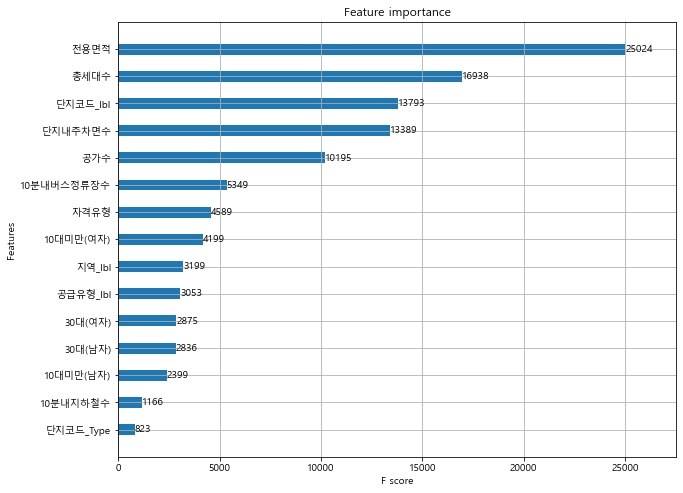

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_reg, ax=ax , max_num_features=20,height=0.4)


# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245 
* 실제 점수 : 94.04934


# 임대건물 구분 넣으니깐...
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03567008604962118
* XGBM 모델의 MAE: 0.014330334463868983
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

# log_단지내주차면수 로 변경
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0319842263933502
* XGBM 모델의 MAE: 0.014659369120077419
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245

# 임대건물구분_lbl, log_단지내주차면수 로 변경후
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.035655662244789756
* XGBM 모델의 MAE: 0.014303995685397359
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

* 점수 :96.1138824151	 ...더 안좋아짐..뭐가문제지?

# log_등록차량수 > 등록차량수 : 결과 좋지 않음! log 씌우는걸로!

# sel = [ 'qcut_총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'


* 최종 혼합 모델의 MAE: 0.03747598080959757
* XGBM 모델의 MAE: 0.013667399958141143
* LGBM 모델의 MAE: 0.07181323101083253
* CATM 모델의 MAE: 0.03769290603493843

>100.2699413689 점수가 왜 오를까..?

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245
* 실제 점수 : 94.04934

* lgbm이 줄어드는 방향으로 해보자!!!!


# 현재 상태 -----------------------------------------------------
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'
# 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245


# learning_rate = 0.1로 변경
최종 혼합 모델의 MAE: 0.02481445731303656
XGBM 모델의 MAE: 0.014530671472410795
LGBM 모델의 MAE: 0.03474698733146343
CATM 모델의 MAE: 0.03078569357421404

# learning_rate = 0.1로 변경, estimator = 20000
최종 혼합 모델의 MAE: 0.01640719305118939
XGBM 모델의 MAE: 0.014489622514227026
LGBM 모델의 MAE: 0.014862862361406586
CATM 모델의 MAE: 0.023948652927971638

점수 108.294991863

# learning_rate = 0.08로 변경, estimator = 20000
* 최종 혼합 모델의 MAE: 0.016774409605429152
* XGBM 모델의 MAE: 0.014711936537051199
LGBM 모델의 MAE: 0.0167275993129547
CATM 모델의 MAE: 0.02418390913794919

# estimator = 20000
최종 혼합 모델의 MAE: 0.018982819747037142
XGBM 모델의 MAE: 0.014792148517779826
LGBM 모델의 MAE: 0.021189408378179616
CATM 모델의 MAE: 0.02476954304695063


# estimator = 20000
최종 혼합 모델의 MAE: 0.018982819747037142
XGBM 모델의 MAE: 0.014792148517779826
LGBM 모델의 MAE: 0.021189408378179616
CATM 모델의 MAE: 0.02476954304695063

# 최종모델 만들기

In [71]:
model_last = XGBRegressor(n_estimators=20000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.5184636, 6.4831862, 6.511602 , 6.511602 , 6.5027065, 6.509003 ,
       6.4775105, 6.4775105, 7.099584 , 7.099584 ], dtype=float32)

In [72]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,676.536621,663.524536
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1210.463135,1241.201416
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,1054.255615,1058.766113
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1790.673340,1805.425171
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,637.459229,639.115295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,109.472939,106.651802
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,563.732605,575.665222
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,940.545532,926.737610
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,639.055847,627.413330


In [73]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [74]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,663.525
1,C1128,1241.2
2,C1332,1058.77
3,C1563,1805.43
4,C1721,639.115
...,...,...
145,C2551,627.413
146,C1229,212.361
147,C2675,0
148,C2335,0


In [75]:
sub_df.to_csv('33th_xgboost_0730.csv', index=False)
sub_df.head()

,code,num
0,C1072,663.525
1,C1128,1241.2
2,C1332,1058.77
3,C1563,1805.43
4,C1721,639.115


# 점수 :  94.0385838723